Esse notebook foi utilizado para realizar o tratamento inicial nos dados de Quimioterapia dos anos de 2016 a 2020

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta


import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import seaborn as sns
%matplotlib inline

# Leitura dos arquivos de dados

As bases de dados são bem grandes, por isso iremos fazer uma parte do tratamento delas por código. O objetivo dessa parte é realizar o agrupamento por mês dos dados e fazer o filtro por sexo.
Para executar esse colab você deve subir os arquivos com os dados para o ambiente de execução do colab.

In [ ]:
from google.colab import files
uploaded = files.upload()
# QUI_FEM_TODOS.csv

Esse dataset ja foi aplicado o filtro de sexo, selecionando apenas o sexo femininio e foi criado a coluna METASTATICO, que é referente aos procedimentos que são aplicados ao nosso problema.


In [ ]:
df_Original = pd.read_csv('QUI_FEM_TODOS.csv')
df_Original.shape
#(10904298, 18)

(10904298, 18)

Listando os 5 primeiros registros do dataset

In [ ]:
df_Original.head()

AP_GESTAO     AP_AUTORIZ  AP_CMP  ...  MAIOR_60   DTSOLIC_2  METASTATICO
0     120000  1216200210555  201701  ...         1  30/11/2016          NaN
1     120000  1216200223469  201701  ...         1  31/12/2016          0.0
2     120000  1216200210478  201701  ...         1  30/11/2016          1.0
3     120000  1217200027582  201701  ...         1  31/01/2017          0.0
4     120000  1216200222908  201701  ...         0  31/12/2016          NaN

[5 rows x 18 columns]

A função abaixo é uma função que facilita a visualização dos dados. A função ira receber o dataframe como parametro e listar o nome da coluna, o tipo dos seus dados, o nº de dados unicos, a quantidade de registros, e a quantidade de dados missing, e o % de missing.

In [ ]:
def infoDf(df):
    info_df = pd.DataFrame({ 'Columns': df.columns,
                        'Type': df.dtypes,
                        'Unique': df.nunique(),                        
                        'Size': df.shape[0],
                        'Missing': df.isna().sum()    
    })
    info_df['% Unique'] = round(info_df['Unique']/info_df['Size'] ,3)
    info_df['% Missing'] = round(info_df['Missing']/info_df['Size'] ,3)
    return info_df

In [ ]:
#missing data
def missingData(df, num=20):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(num)

In [ ]:
# Execução da função passando o dataframe com parametro
infoDf(df_Original)

Columns     Type   Unique  ...  Missing  % Unique  % Missing
AP_GESTAO      AP_GESTAO    int64      141  ...        0     0.000      0.000
AP_AUTORIZ    AP_AUTORIZ    int64  3978166  ...        0     0.365      0.000
AP_CMP            AP_CMP    int64       63  ...        0     0.000      0.000
AP_PRIPAL      AP_PRIPAL  float64      137  ...      131     0.000      0.000
AP_UFMUN        AP_UFMUN    int64      183  ...        0     0.000      0.000
AP_NUIDADE    AP_NUIDADE    int64      100  ...        0     0.000      0.000
AP_SEXO          AP_SEXO   object        1  ...        0     0.000      0.000
AP_TPATEN      AP_TPATEN    int64        1  ...        0     0.000      0.000
AP_TPAPAC      AP_TPAPAC    int64        3  ...        0     0.000      0.000
AP_DTSOLIC    AP_DTSOLIC  float64     3006  ...   358438     0.000      0.033
AP_CIDPRI      AP_CIDPRI   object      386  ...        0     0.000      0.000
AQ_ESTADI      AQ_ESTADI  float64        5  ...  1029412     0.000      0.094
AQ_ESQU_P2    AQ_ESQU_P2   object    55767  ...  2976406     0.005      0.273
DTSOLIC          DTSOLIC   object     3000  ...   358447     0.000      0.033
ESTADO_UF      ESTADO_UF   object       27  ...        0     0.000      0.000
MAIOR_60        MAIOR_60    int64        2  ...        0     0.000      0.000
DTSOLIC_2      DTSOLIC_2   object      286  ...   358447     0.000      0.033
METASTATICO  METASTATICO  float64        2  ...  2627705     0.000      0.241

[18 rows x 7 columns]

In [ ]:
missingData(df_Original, num=8)

Total   Percent
AQ_ESQU_P2   2976406  0.272957
METASTATICO  2627705  0.240979
AQ_ESTADI    1029412  0.094404
DTSOLIC       358447  0.032872
DTSOLIC_2     358447  0.032872
AP_DTSOLIC    358438  0.032871
AP_PRIPAL        131  0.000012
AP_NUIDADE         0  0.000000

Temos alguns dados missing, mas no momento não iremos trata-los. Vamos deixa no dataset. 
Os dados missing da variavel 'METASTATICO' é referente aos procedimentos que não se aplicando no nosso problema. Futuramente, esses registros serão removidos.

In [ ]:
df_Original.describe()

AP_GESTAO    AP_AUTORIZ  ...      MAIOR_60   METASTATICO
count  1.090430e+07  1.090430e+07  ...  1.090430e+07  8.276593e+06
mean   3.407602e+05  3.415834e+12  ...  4.676860e-01  2.239881e-01
std    7.964828e+04  7.963707e+11  ...  4.989547e-01  4.169142e-01
min    1.100000e+05  1.115201e+12  ...  0.000000e+00  0.000000e+00
25%    2.927400e+05  2.920207e+12  ...  0.000000e+00  0.000000e+00
50%    3.500000e+05  3.516236e+12  ...  0.000000e+00  0.000000e+00
75%    4.100000e+05  4.117214e+12  ...  1.000000e+00  0.000000e+00
max    5.300000e+05  5.320203e+12  ...  1.000000e+00  1.000000e+00

[8 rows x 12 columns]

A código acima mostrar algumas informaçõese estatisticas do dataset, conseguimos visualizar as informações de quantidade de registros (count), média (mean), devio padrão (std), valor minimo e valor maxima (min e max), valor inicial do segundo quadrante (25%), valor inicial do terceiro quadrante (50%), valor inicio do quarto quadrante (75%).
Esse valores de quadrante são melhor visualizados e entendidos utilizando o boxplot.

# Analise da base de dados
Antes de iniciarmos a remoção dos registros com idade abaixo de 60 anos, iremos realizar uma pequena analise de todos os dados. O objetivo é ver a distribuição dos dados.

# Visualização da quantidade de registro maior e menor que 60 anos.

In [ ]:
maior_60 = df_Original[df_Original.AP_NUIDADE >=60 ]
menor_60 = df_Original[df_Original.AP_NUIDADE < 60]

num_maior_60 = maior_60.shape[0]
num_menor_60 = menor_60.shape[0]


print( num_maior_60 / (num_maior_60 + num_menor_60) * 100 , "% maior de 60.")
print( num_menor_60 / (num_maior_60 + num_menor_60) * 100,"% menor de 60.")

46.768595282337294 % maior de 60.
53.2314047176627 % menor de 60.


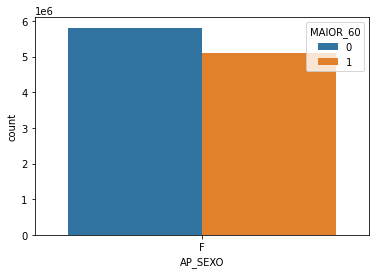

In [ ]:
df_2 = df_Original.copy()
sns.countplot(x='AP_SEXO', hue='MAIOR_60',data = df_2)

# Construindo a tabela de frequencia

In [ ]:
# inicialmente vamos testar criando 5 classes de dados e vamos ver se nos atende.
k = 5
idade_inferior = df_2.AP_NUIDADE.min()
idade_superior = df_2.AP_NUIDADE.max()
amplitude = idade_superior - idade_inferior
largura = round(amplitude / k)
print(idade_inferior, idade_superior , largura)

0 99 20


In [ ]:
idades_freq = pd.DataFrame([
  ["0 - 19", ((df_2.AP_NUIDADE >= 0) & (df_2.AP_NUIDADE <= 19)).sum()],
  ["20 - 39", ((df_2.AP_NUIDADE >= 20) & (df_2.AP_NUIDADE <= 39)).sum()],
  ["40 - 59", ((df_2.AP_NUIDADE >= 40) & (df_2.AP_NUIDADE <= 59)).sum()],
  ["60 - 79", ((df_2.AP_NUIDADE >= 60) & (df_2.AP_NUIDADE <= 79)).sum()],
  ["80 - 100", ((df_2.AP_NUIDADE >= 80) & (df_2.AP_NUIDADE <= 100)).sum()]
  
], columns=['Idade','Qtd'])

idades_freq['%freq'] = (idades_freq['Qtd'] / idades_freq['Qtd'].sum())*100
idades_freq

Idade      Qtd      %freq
0    0 - 19   145618   1.335418
1   20 - 39   761234   6.981045
2   40 - 59  4897659  44.914941
3   60 - 79  4457667  40.879908
4  80 - 100   642120   5.888687

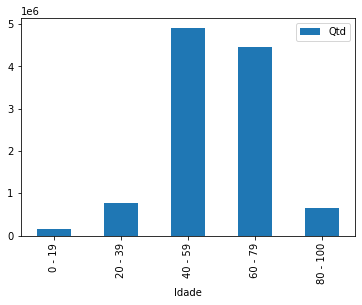

In [ ]:
idades_freq.plot(x='Idade', y='Qtd',kind='bar')

# Quantidade de Registro por Estado

In [ ]:
df_2.groupby('ESTADO_UF')['AP_NUIDADE'].count().sort_values(ascending=False)

ESTADO_UF
SP    2816298
MG    1337760
RS    1132832
PR     830487
RJ     731250
BA     549984
PE     499473
SC     490432
CE     461735
ES     246839
GO     209455
RN     200543
PB     198237
MA     159563
PI     153020
AL     132964
DF     125086
PA     122140
MT     117065
MS     111798
AM      82472
RO      68988
SE      57260
TO      43411
AC      15306
AP       5747
RR       4153
Name: AP_NUIDADE, dtype: int64

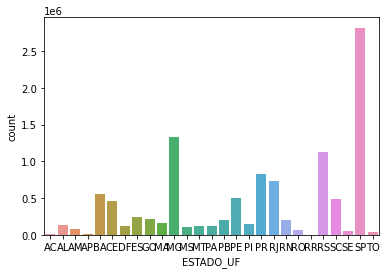

In [ ]:
# Gráfico de Barra com o numero de registro por estado.
sns.countplot(x='ESTADO_UF',data = df_2)

# Numero de registros maiores e menores de 60 anos por estado

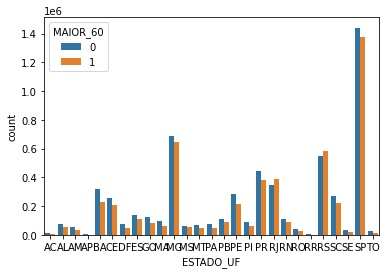

In [ ]:
sns.countplot(x='ESTADO_UF', hue='MAIOR_60',data = df_2)

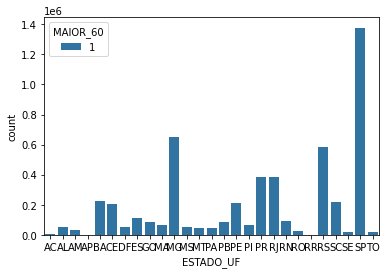

In [ ]:
sns.countplot(x='ESTADO_UF', hue='MAIOR_60',data = df_2[(df_2["MAIOR_60"] == 1)])

# Datas

Precisamos olhar como esta distribuido nossos dados em relação aos meses e anos, mas antes disso precisamos ver como os dados de datas estão. Vamos analisar esses dados agora

In [ ]:
# Esse código vai contar quantos registros cada data tem
df_2.groupby('DTSOLIC_2')['DTSOLIC_2'].count().sort_values(ascending=False)

DTSOLIC_2
31/07/2020    220369
31/01/2020    218335
30/04/2020    212153
31/10/2020    209885
31/10/2019    208426
               ...  
30/09/2810         1
30/11/1954         1
30/11/1996         1
31/07/2047         1
31/08/2005         1
Name: DTSOLIC_2, Length: 286, dtype: int64

In [ ]:
# Listando todas as datas existente no dataset
df_2['DTSOLIC_2'].unique()

array(['30/11/2016', '31/12/2016', '31/01/2017', '31/12/1916',
       '30/06/2016', '31/12/2017', '28/02/2017', '31/03/2017',
       '30/04/2017', '31/05/2017', '30/06/2017', '31/07/2017',
       '31/08/2017', '30/09/2017', '31/10/2017', '30/11/2017',
       '31/12/2001', '31/01/2016', '31/01/2014', '31/10/2015',
       '31/08/2014', '31/10/2016', '31/12/2015', '31/10/1962',
       '31/03/2007', '30/06/2011', '30/09/1977', '31/08/2016',
       '31/05/1962', '30/04/1973', '31/01/1964', '28/02/2071',
       '28/02/2014', '31/05/2015', '31/05/2014', nan, '30/09/2016',
       '30/04/2007', '31/07/2016', '30/09/2014', '30/11/2018',
       '30/11/2014', '31/12/2014', '29/02/2016', '31/03/2015',
       '31/12/2006', '31/03/2016', '30/11/2015', '30/06/2014',
       '31/05/2016', '30/11/2001', '28/02/2013', '30/09/2015',
       '31/01/2018', '31/01/2001', '31/12/2013', '30/04/2016',
       '31/03/2018', '31/03/2014', '30/04/2014', '30/04/2047',
       '31/05/2013', '31/08/2015', '30/06/2015', '

In [ ]:
# Aqui estou criando a coluna ANO e preenchendo ele com o campo de ano de cada data. 
# Tive que fazer um tratamento nos campos onde as data estão como NaN ou as datas estão com valores acima no limite do pandas
df_2['ANO'] = df_2['DTSOLIC_2']
filtroData = (df_2['ANO'].isna() == False)
df_2.ANO[filtroData] = [ str(x)[6:10] if len(x) >= 10 else x for x in df_2.ANO[filtroData] ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Apenas para visualização, aqui temos todos os anos existentes.
df_2['ANO'].unique()

array(['2016', '2017', '1916', '2001', '2014', '2015', '1962', '2007',
       '2011', '1977', '1973', '1964', '2071', nan, '2018', '2006',
       '2013', '2047', '2012', '2009', '2010', '1991', '2008', '2003',
       '2005', '1972', '2201', '5017', '6930', '2301', '2080', '2000',
       '2019', '2117', '9201', '1961', '1982', '2218', '6180', '2108',
       '2048', '7018', '5778', '2180', '2810', '1900', '3018', '2021',
       '1974', '1943', '2190', '2020', '2004', '1918', '1911', '1919',
       '2091', '2099', '2041', '5520', '1990', '8614', '2090', '6049',
       '1235', '3019', '2109', '2049', '2002', '2029', '3020', '2202',
       '2022', '1915', '1996', '1998', '3016', '5016', '1201', '1954',
       '2169', '2045', '2106', '2061', '2115', '2068', '2501', '2079',
       '1690'], dtype=object)

In [ ]:
df_2.groupby(['ANO'])['ANO'].count().sort_values(ascending=False)

ANO
2019    2264736
2020    2203189
2018    2167148
2016    1911847
2017    1844832
         ...   
2048          1
2045          1
8614          1
1996          1
1201          1
Name: ANO, Length: 88, dtype: int64

Temos muitos registros fora do nosso intervalo de interesse que é entre os anos de 2016 e 2020. Desta forma, iremos aplicar um filtro nos dados pra selecionarmos apenas os dados que estão neste intervalo, mas antes vamos olhar quantos registros estão fora desse intervalo.

In [ ]:
# Quantidade de registros com datas fora do intervalo de 2016 e 2020
filtroForaDoPeriodo = (df_2['ANO'] != '2016') & (df_2['ANO'] != '2017') & (df_2['ANO'] != '2018') & (df_2['ANO'] != '2019') & (df_2['ANO'] != '2020')
df_2[filtroForaDoPeriodo].shape
#(512546, 19)

Temos 512 mil registros fora do intervalo que vamos analisar. Iremos remover esses dados.

In [ ]:
# Código com a remoção de registros com datas fora do nosso intervalo
filtroDoPeriodo = (df_2['ANO'] == '2016') | (df_2['ANO'] == '2017') | (df_2['ANO'] == '2018') | (df_2['ANO'] == '2019') | (df_2['ANO'] == '2020')
df_2 = df_2[filtroDoPeriodo]
df_2.shape
# (10391752, 19)

(10391752, 19)

In [ ]:
# Apenas para visualização, aqui temos todos os anos existentes após a remoção dos outros dados
df_2['ANO'].unique()

array(['2016', '2017', '2018', '2019', '2020'], dtype=object)

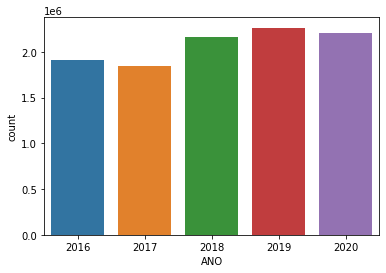

In [ ]:
# Gráfico de Barra com o numero de registro por ANO.
#sns.countplot(x='ANO',data = df_2, order = df_2['ANO'] )
sns.countplot(x='ANO',data = df_2)

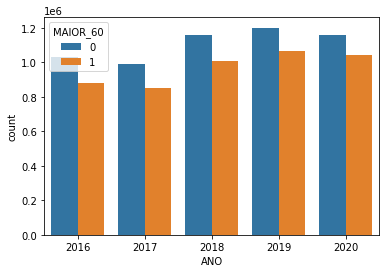

In [ ]:
# Gráfico de Barra com o numero de registro por ANO e por maior e menor de 60.
# Não esta ordenado por ano pq o colab travava qndo mandava ordenar
sns.countplot(x='ANO',hue='MAIOR_60', data = df_2)

In [ ]:
# Esse codigo é para facilitar a forma de verificar a variação dos dados em relação ao ano anterior.
df_variacao = pd.DataFrame([
  ["2016", ((df_2.ANO == '2016') & (df_2.MAIOR_60 == 0)).sum(), 0, 0.0 ],
  ["2016", ((df_2.ANO == '2016') & (df_2.MAIOR_60 == 1)).sum(), 1, 0.0 ],

  ["2017", ((df_2.ANO == '2017') & (df_2.MAIOR_60 == 0)).sum(), 0, (((df_2.ANO == '2017') & (df_2.MAIOR_60 == 0)).sum()/((df_2.ANO == '2016') & (df_2.MAIOR_60 == 0)).sum())*100-100],
  ["2017", ((df_2.ANO == '2017') & (df_2.MAIOR_60 == 1)).sum(), 1, (((df_2.ANO == '2017') & (df_2.MAIOR_60 == 1)).sum()/((df_2.ANO == '2016') & (df_2.MAIOR_60 == 1)).sum())*100-100],
  ["2018", ((df_2.ANO == '2018') & (df_2.MAIOR_60 == 0)).sum(), 0, (((df_2.ANO == '2018') & (df_2.MAIOR_60 == 0)).sum()/((df_2.ANO == '2017') & (df_2.MAIOR_60 == 0)).sum())*100-100],
  ["2018", ((df_2.ANO == '2018') & (df_2.MAIOR_60 == 1)).sum(), 1, (((df_2.ANO == '2018') & (df_2.MAIOR_60 == 1)).sum()/((df_2.ANO == '2017') & (df_2.MAIOR_60 == 1)).sum())*100-100],
  ["2019", ((df_2.ANO == '2019') & (df_2.MAIOR_60 == 0)).sum(), 0, (((df_2.ANO == '2019') & (df_2.MAIOR_60 == 0)).sum()/((df_2.ANO == '2018') & (df_2.MAIOR_60 == 0)).sum())*100-100],
  ["2019", ((df_2.ANO == '2019') & (df_2.MAIOR_60 == 1)).sum(), 1, (((df_2.ANO == '2019') & (df_2.MAIOR_60 == 1)).sum()/((df_2.ANO == '2018') & (df_2.MAIOR_60 == 1)).sum())*100-100],
  ["2020", ((df_2.ANO == '2020') & (df_2.MAIOR_60 == 0)).sum(), 0, (((df_2.ANO == '2020') & (df_2.MAIOR_60 == 0)).sum()/((df_2.ANO == '2019') & (df_2.MAIOR_60 == 0)).sum())*100-100],
  ["2020", ((df_2.ANO == '2020') & (df_2.MAIOR_60 == 1)).sum(), 1, (((df_2.ANO == '2020') & (df_2.MAIOR_60 == 1)).sum()/((df_2.ANO == '2019') & (df_2.MAIOR_60 == 1)).sum())*100-100],
  
], columns=['Ano','Qtd','MAIOR_60', 'Variacao'])


    Ano      Qtd  MAIOR_60   Variacao
0  2016  1032377         0   0.000000
2  2017   991102         0  -3.998055
4  2018  1157104         0  16.749235
6  2019  1201040         0   3.797066
8  2020  1160522         0  -3.373576


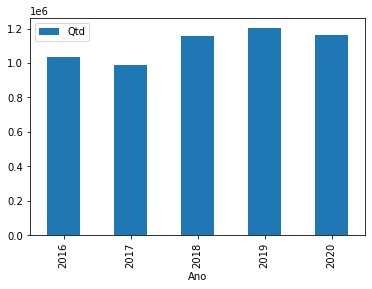

In [ ]:
# Aqui estou listando a variação dos dados das pessoas com menos de 60 anos, 
# apresentando os número e uma visualização desses numeros em grafico
print(df_variacao[df_variacao['MAIOR_60']==0])
df_variacao[df_variacao['MAIOR_60']==0].plot(x='Ano', y='Qtd', kind='bar')

    Ano      Qtd  MAIOR_60   Variacao
1  2016   879470         1   0.000000
3  2017   853730         1  -2.926763
5  2018  1010044         1  18.309536
7  2019  1063696         1   5.311848
9  2020  1042667         1  -1.976975


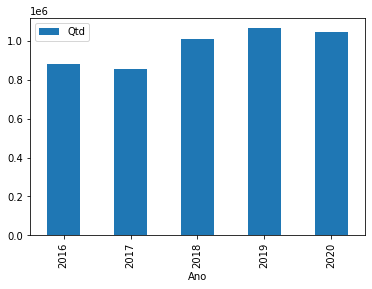

In [ ]:
# Aqui estou listando a variação dos dados das pessoas com 60 anos ou mais, 
# apresentando os número e uma visualização desses numeros em grafico
print(df_variacao[df_variacao['MAIOR_60']==1])
df_variacao[df_variacao['MAIOR_60']==1].plot(x='Ano', y='Qtd', kind='bar')


Com essas informações consigo perceber que a variação dos dados de pessoas com idade menor que 60 e de pessoas com idade maior que 60 é muito parecido. A variação entre os anos entre esses dois grupos são muito semelhante, é praticamente igual. A variação entre esses dois grupos não tem 2% diferença. 

Por ser um dado que acredito ser por demanda esse padrão me causa muita curiosidade. Será que existe um controle sobre o numero de atendimento? Isso explicaria essa variação ser semelhante, mas não sei como podemos descobrir isso.

Vou listar as variações aqui em baixo pra ficar melhor o entendimento sobre o que estou pontuando.

In [ ]:
for ano in df_variacao.Ano.unique():
  print(ano + ' | Var. < 60: ' + str(df_variacao.Variacao[(df_variacao['MAIOR_60']==0) & (df_variacao['Ano']==ano) ].values[0]),  ' | Var. >= 60: ',df_variacao.Variacao[(df_variacao['MAIOR_60']==1) & (df_variacao['Ano']==ano) ].values[0] )
#for 
#print(df_variacao.Ano[df_variacao['MAIOR_60']==0)

2016 | Var. < 60: 0.0  | Var. >= 60:  0.0
2017 | Var. < 60: -3.9980549741034537  | Var. >= 60:  -2.926762709359039
2018 | Var. < 60: 16.74923469027405  | Var. >= 60:  18.309535801717175
2019 | Var. < 60: 3.7970657780113157  | Var. >= 60:  5.3118478006898755
2020 | Var. < 60: -3.373576233930592  | Var. >= 60:  -1.9769746243287472


a variação de 2017, 2018, 2020 entre os maiores e menores de 60 anos não dá 1% de diferença.
a variação de 2019 entre os maiores e menores de 60 anos tem aproximadamente  3% de diferença.
Claro que estamos olhando percentual e não valores absoluto, mas isso me deixa curioso pra saber o porque eles seguem valores tão proximos. Do meu ponto de vista são eventos indenpendentes então a variação não deveria ser tão uniforme assim.



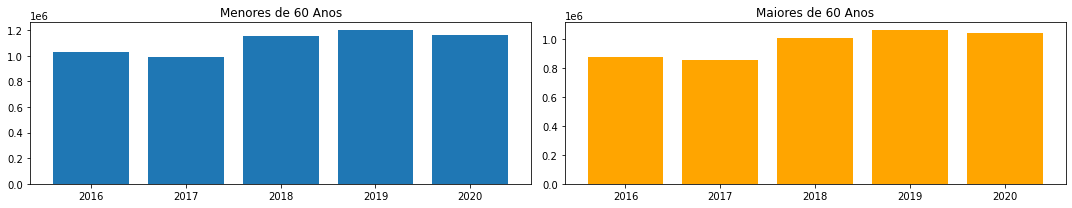

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

x1 = df_variacao.Ano[df_variacao['MAIOR_60']==0]
y1 = df_variacao.Qtd[df_variacao['MAIOR_60']==0]
axes[0].bar(x1, y1)
axes[0].set_title('Menores de 60 Anos')

x2 = df_variacao.Ano[df_variacao['MAIOR_60']==1]
y2 = df_variacao.Qtd[df_variacao['MAIOR_60']==1]
axes[1].bar(x2, y2, color='orange')
axes[1].set_title('Maiores de 60 Anos')

fig.tight_layout()

# AP_TPAPAC - Indica se a APAC é 1 – inicial, 2 – continuidade, 3 – única

Vamos dar uma olhada nessa variavel em relação aos maiores e menores que 60

In [ ]:
df_2.AP_TPAPAC.unique()

array([2, 1, 4])

In [ ]:
df_2.groupby('AP_TPAPAC')['AP_TPAPAC'].count()

AP_TPAPAC
1    3697510
2    6694111
4        131
Name: AP_TPAPAC, dtype: int64

In [ ]:
df_2.head()

AP_GESTAO     AP_AUTORIZ  AP_CMP  ...   DTSOLIC_2  METASTATICO   ANO
0     120000  1216200210555  201701  ...  30/11/2016          NaN  2016
1     120000  1216200223469  201701  ...  31/12/2016          0.0  2016
2     120000  1216200210478  201701  ...  30/11/2016          1.0  2016
3     120000  1217200027582  201701  ...  31/01/2017          0.0  2017
4     120000  1216200222908  201701  ...  31/12/2016          NaN  2016

[5 rows x 19 columns]

In [ ]:
# Como nosso foco é a idade, vamos ver a proporção de registro que temos em cada faixa.
df_2.groupby(by=['AP_TPAPAC','MAIOR_60'])['AP_TPAPAC'].count()

AP_TPAPAC  MAIOR_60
1          0           1974830
           1           1722680
2          0           3567247
           1           3126864
4          0                68
           1                63
Name: AP_TPAPAC, dtype: int64

Achei até que bem distribuido, não vi muita diferença entre os grupos.

In [ ]:
anos = df_2.ANO.sort_values().unique()
faixa60 = df_2.MAIOR_60.unique()
ap_tpapac = df_2.AP_TPAPAC.unique()
v_dados = []
for ano in anos:
  for f in faixa60:
    for tpapac in ap_tpapac:
      qtd_atual = ((df_2.ANO == ano ) & (df_2.MAIOR_60 == f) & (df_2.AP_TPAPAC == tpapac)).sum()
      qtd_ant = ((df_2.ANO == str(int(ano)-1) ) & (df_2.MAIOR_60 == f) & (df_2.AP_TPAPAC == tpapac)).sum()
      linha = [ano, tpapac, f, qtd_atual, 0 if ano=='2016' else ((qtd_atual / qtd_ant)*100)-100  ]
      v_dados.append(linha)

# Esse codigo é para facilitar a forma de verificar a variação dos dados em relação ao ano anterior.
dfTPAPAC = pd.DataFrame(v_dados, columns=['ANO','AP_TPAPAC','MAIOR_60','QTD', 'VARIACAO'])
dfTPAPAC.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

divide by zero encountered in long_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

divide by zero encountered in long_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

divide by zero encountered in long_scalars



ANO  AP_TPAPAC  MAIOR_60     QTD  VARIACAO
0  2016          2         1  571444       0.0
1  2016          1         1  308026       0.0
2  2016          4         1       0       0.0
3  2016          2         0  669860       0.0
4  2016          1         0  362516       0.0

AP_TPAPAC = 1

TPAPAC= 1
2016 | Var. < 60: 0.0  | Var. >= 60:  0.0
2017 | Var. < 60: -4.045062838605745  | Var. >= 60:  -3.1185679130982464
2018 | Var. < 60: 17.050354748571237  | Var. >= 60:  18.544668587896254
2019 | Var. < 60: 3.4178042155210875  | Var. >= 60:  5.183160382292002
2020 | Var. < 60: 3.596483311880448  | Var. >= 60:  4.912428748417753


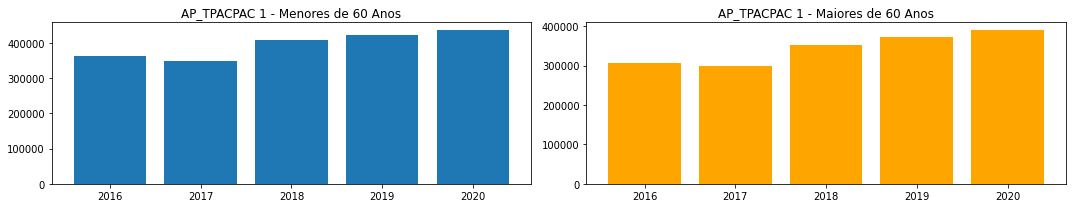

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
TPAPAC = 1
print('TPAPAC=',TPAPAC)
for ano in dfTPAPAC.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfTPAPAC.VARIACAO[(dfTPAPAC['MAIOR_60']==0) & (dfTPAPAC['ANO']==ano) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)].values[0]),  ' | Var. >= 60: ',dfTPAPAC.VARIACAO[(dfTPAPAC['MAIOR_60']==1) & (dfTPAPAC['ANO']==ano) & (dfTPAPAC['AP_TPAPAC']==TPAPAC) ].values[0] )

x1 = dfTPAPAC.ANO[(dfTPAPAC['MAIOR_60']==0) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
y1 = dfTPAPAC.QTD[(dfTPAPAC['MAIOR_60']==0) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
axes[0].bar(x1, y1)
axes[0].set_title('AP_TPACPAC '+str(TPAPAC)+' - Menores de 60 Anos')

x2 = dfTPAPAC.ANO[(dfTPAPAC['MAIOR_60']==1) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
y2 = dfTPAPAC.QTD[(dfTPAPAC['MAIOR_60']==1) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
axes[1].bar(x2, y2, color='orange')
axes[1].set_title('AP_TPACPAC '+str(TPAPAC)+' - Maiores de 60 Anos')

fig.tight_layout()

In [ ]:
df_2[(df_2['ANO']=='2020') & (df_2['AP_TPAPAC']==1)]

AP_GESTAO     AP_AUTORIZ  AP_CMP  ...   DTSOLIC_2  METASTATICO   ANO
4565431     210000  2119201471630  201912  ...  31/12/2020          1.0  2020
4821947     310620  3119230729197  201911  ...  30/11/2020          0.0  2020
4823894     315180  3119237390225  201912  ...  31/01/2020          0.0  2020
4824014     315180  3119237388575  201912  ...  31/01/2020          NaN  2020
4824517     315180  3119237391974  201912  ...  31/01/2020          0.0  2020
...            ...            ...     ...  ...         ...          ...   ...
8943678     170000  1720200380679  202012  ...  31/12/2020          0.0  2020
8943684     170000  1720200382263  202012  ...  31/12/2020          0.0  2020
8943692     170000  1720200380514  202012  ...  31/12/2020          1.0  2020
8943698     170000  1720200382384  202012  ...  31/12/2020          0.0  2020
8943706     170000  1720200382802  202012  ...  31/12/2020          NaN  2020

[826598 rows x 19 columns]

AP_TPAPAC = 2

TPAPAC= 2
2016 | Var. < 60: 0.0  | Var. >= 60:  0.0
2017 | Var. < 60: -3.9818768100797257  | Var. >= 60:  -2.833873485415893
2018 | Var. < 60: 16.597816809108394  | Var. >= 60:  18.195947771274206
2019 | Var. < 60: 4.002442855580824  | Var. >= 60:  5.381062742749691
2020 | Var. < 60: -7.136025273155738  | Var. >= 60:  -5.683793186215112


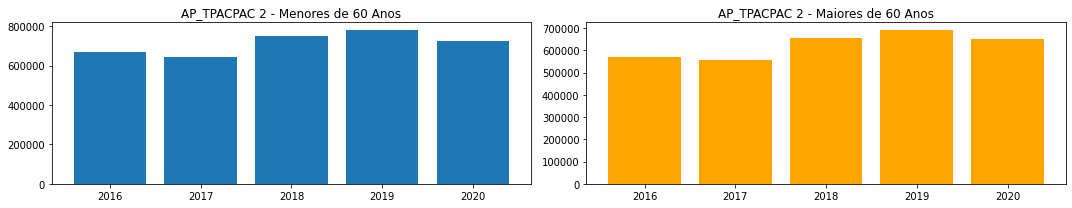

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
TPAPAC = 2
print('TPAPAC=',TPAPAC)
for ano in dfTPAPAC.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfTPAPAC.VARIACAO[(dfTPAPAC['MAIOR_60']==0) & (dfTPAPAC['ANO']==ano) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)].values[0]),  ' | Var. >= 60: ',dfTPAPAC.VARIACAO[(dfTPAPAC['MAIOR_60']==1) & (dfTPAPAC['ANO']==ano) & (dfTPAPAC['AP_TPAPAC']==TPAPAC) ].values[0] )

x1 = dfTPAPAC.ANO[(dfTPAPAC['MAIOR_60']==0) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
y1 = dfTPAPAC.QTD[(dfTPAPAC['MAIOR_60']==0) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
axes[0].bar(x1, y1)
axes[0].set_title('AP_TPACPAC '+str(TPAPAC)+' - Menores de 60 Anos')

x2 = dfTPAPAC.ANO[(dfTPAPAC['MAIOR_60']==1) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
y2 = dfTPAPAC.QTD[(dfTPAPAC['MAIOR_60']==1) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
axes[1].bar(x2, y2, color='orange')
axes[1].set_title('AP_TPACPAC '+str(TPAPAC)+' - Maiores de 60 Anos')

fig.tight_layout()

AP_TPAPAC = 4

TPAPAC= 4
2016 | Var. < 60: 0.0  | Var. >= 60:  0.0
2017 | Var. < 60: 6200.0  | Var. >= 60:  inf
2018 | Var. < 60: -100.0  | Var. >= 60:  -100.0
2019 | Var. < 60: inf  | Var. >= 60:  inf
2020 | Var. < 60: -100.0  | Var. >= 60:  100.0


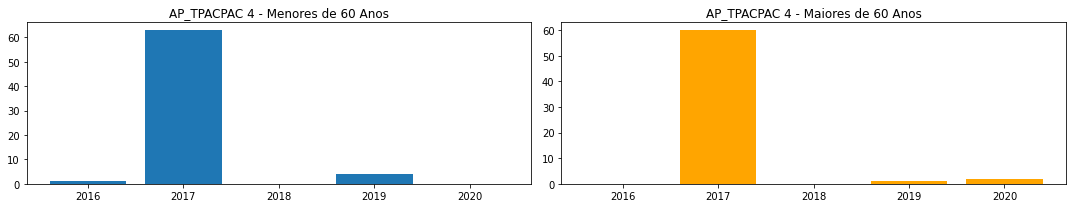

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
TPAPAC = 4
print('TPAPAC=',TPAPAC)
for ano in dfTPAPAC.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfTPAPAC.VARIACAO[(dfTPAPAC['MAIOR_60']==0) & (dfTPAPAC['ANO']==ano) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)].values[0]),  ' | Var. >= 60: ',dfTPAPAC.VARIACAO[(dfTPAPAC['MAIOR_60']==1) & (dfTPAPAC['ANO']==ano) & (dfTPAPAC['AP_TPAPAC']==TPAPAC) ].values[0] )

x1 = dfTPAPAC.ANO[(dfTPAPAC['MAIOR_60']==0) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
y1 = dfTPAPAC.QTD[(dfTPAPAC['MAIOR_60']==0) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
axes[0].bar(x1, y1)
axes[0].set_title('AP_TPACPAC '+str(TPAPAC)+' - Menores de 60 Anos')

x2 = dfTPAPAC.ANO[(dfTPAPAC['MAIOR_60']==1) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
y2 = dfTPAPAC.QTD[(dfTPAPAC['MAIOR_60']==1) & (dfTPAPAC['AP_TPAPAC']==TPAPAC)]
axes[1].bar(x2, y2, color='orange')
axes[1].set_title('AP_TPACPAC '+str(TPAPAC)+' - Maiores de 60 Anos')

fig.tight_layout()

# AQ_ESTADI -> Estádio – UICC (0;1;2;3;4)

In [ ]:
# Não iremos aplicar nenhuma regra de negócio e nem excluir nenhum registro, vamos tratar os valores missing para podemos analisar se eles possuem algum padrão.
df_2.AQ_ESTADI.unique()
# array([nan,  2.,  4.,  1.,  3.,  0.])

array([nan,  2.,  4.,  1.,  3.,  0.])

In [ ]:
# Tem algumas linhas com esse campo em branco (nan). 
# Como não sabemos o que esses missing significa irei preencher esse campo com o valor 10. 
# Assim podemos identificar ele no nosso dataset, caso seja necessario no futuro
print(df_2.AQ_ESTADI.isna().sum())
# 48514
df_2.AQ_ESTADI[df_2.AQ_ESTADI.isna()] = 10

980514


In [ ]:
df_2.groupby('AQ_ESTADI')['AQ_ESTADI'].count()

AQ_ESTADI
0.0      248896
1.0     1830128
2.0     2901696
3.0     2794571
4.0     1635947
10.0     980514
Name: AQ_ESTADI, dtype: int64

In [ ]:
# Como nosso foco é a idade, vamos ver a proporção de registro que temos em cada faixa.
df_2.groupby(by=['AQ_ESTADI','MAIOR_60'])['AQ_ESTADI'].count()

AQ_ESTADI  MAIOR_60
0.0        0            134514
           1            114382
1.0        0            871073
           1            959055
2.0        0           1563705
           1           1337991
3.0        0           1650775
           1           1143796
4.0        0            836462
           1            799485
10.0       0            485616
           1            494898
Name: AQ_ESTADI, dtype: int64

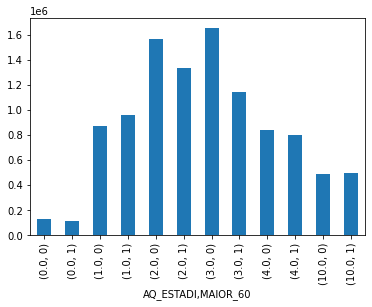

In [ ]:
df_2.groupby(by=['AQ_ESTADI','MAIOR_60'])['AQ_ESTADI'].count().plot.bar()

Explicando esse gráfico, no eixo x temos os valores assim (0.0,0), (0.0,1). Esse primeiro valor (0.0,1.0,2.0,...10.0) é referente aos valores do campo AQ_ESTADI. O valores 0 e 1 que aparecem depois da virgula é referente ao campo MAIOR_60 ( 0 é menor, 1 é maior que 60). O tamanho da barra é referente ao número de registro de cada grupo.

In [ ]:
anos = df_2.ANO.sort_values().unique()
faixa60 = df_2.MAIOR_60.unique()
AQ_ESTADI = df_2.AQ_ESTADI.sort_values().unique()
v_dados = []
for ano in anos:
  for f in faixa60:
    for estadi in AQ_ESTADI:
      qtd_atual = ((df_2.ANO == ano ) & (df_2.MAIOR_60 == f) & (df_2.AQ_ESTADI == estadi)).sum()
      qtd_ant = ((df_2.ANO == str(int(ano)-1) ) & (df_2.MAIOR_60 == f) & (df_2.AQ_ESTADI == estadi)).sum()
      linha = [ano, estadi, f, qtd_atual, 0 if ano=='2016' else ((qtd_atual / qtd_ant)*100)-100  ]
      v_dados.append(linha)

# Esse codigo é para facilitar a forma de verificar a variação dos dados em relação ao ano anterior.
dfAQ_ESTADI = pd.DataFrame(v_dados, columns=['ANO','AQ_ESTADI','MAIOR_60','QTD', 'VARIACAO'])
dfAQ_ESTADI.head()

ANO  AQ_ESTADI  MAIOR_60     QTD  VARIACAO
0  2016        0.0         1   19056       0.0
1  2016        1.0         1  178977       0.0
2  2016        2.0         1  247266       0.0
3  2016        3.0         1  207109       0.0
4  2016        4.0         1  137485       0.0

AQ_ESTADI = 0.0

ESTADI= 0
2016 | Var. < 60: 0.0  | Var. >= 60:  0.0
2017 | Var. < 60: 11.478491178606504  | Var. >= 60:  18.099286314021825
2018 | Var. < 60: 11.794911097486207  | Var. >= 60:  6.247500555432126
2019 | Var. < 60: -2.5365051072873115  | Var. >= 60:  2.2249174020325455
2020 | Var. < 60: -3.6329746078638294  | Var. >= 60:  0.09818762017755489


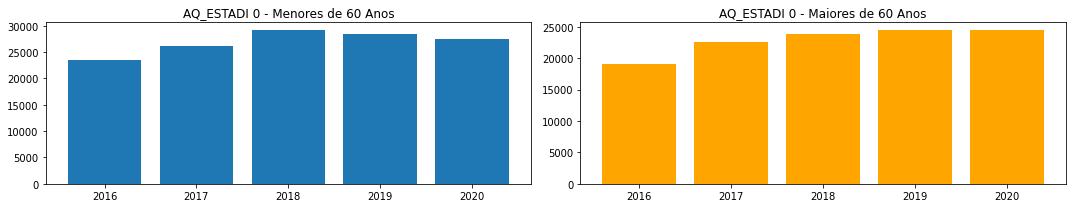

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
ESTADI = 0
print('ESTADI=',ESTADI)
for ano in dfAQ_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)].values[0]),  ' | Var. >= 60: ',dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0] )

x1 = dfAQ_ESTADI.ANO[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y1 = dfAQ_ESTADI.QTD[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes[0].bar(x1, y1)
axes[0].set_title('AQ_ESTADI '+str(ESTADI)+' - Menores de 60 Anos')

x2 = dfAQ_ESTADI.ANO[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y2 = dfAQ_ESTADI.QTD[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AQ_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

fig.tight_layout()

AQ_ESTADI = 1.0

ESTADI= 1
2016 | Var. < 60: 0.0  | Var. >= 60:  0.0
2017 | Var. < 60: -6.612356370469357  | Var. >= 60:  -4.039066472228271
2018 | Var. < 60: 13.552458913953629  | Var. >= 60:  17.634557607657726
2019 | Var. < 60: 1.5711156847422814  | Var. >= 60:  2.6807236369935907
2020 | Var. < 60: -6.05830755310906  | Var. >= 60:  -4.148931554921404


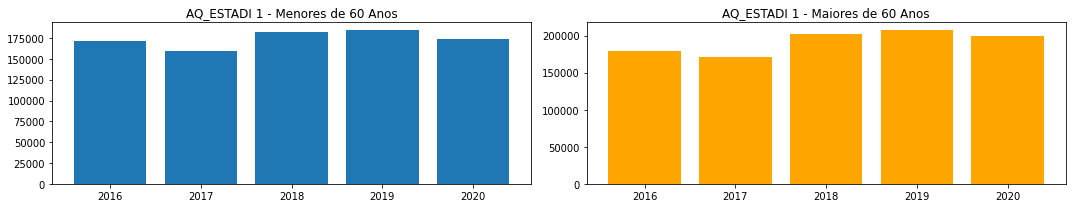

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
ESTADI = 1
print('ESTADI=',ESTADI)
for ano in dfAQ_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)].values[0]),  ' | Var. >= 60: ',dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0] )

x1 = dfAQ_ESTADI.ANO[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y1 = dfAQ_ESTADI.QTD[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes[0].bar(x1, y1)
axes[0].set_title('AQ_ESTADI '+str(ESTADI)+' - Menores de 60 Anos')

x2 = dfAQ_ESTADI.ANO[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y2 = dfAQ_ESTADI.QTD[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AQ_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

fig.tight_layout()

AQ_ESTADI = 2.0

ESTADI= 2
2016 | Var. < 60: 0.0  | Var. >= 60:  0.0
2017 | Var. < 60: -2.8828926836399233  | Var. >= 60:  -2.72864041154061
2018 | Var. < 60: 14.615866614858447  | Var. >= 60:  16.08895762912701
2019 | Var. < 60: 2.4130938055475752  | Var. >= 60:  3.026330869291158
2020 | Var. < 60: -4.229056760198375  | Var. >= 60:  -1.5093893612731364


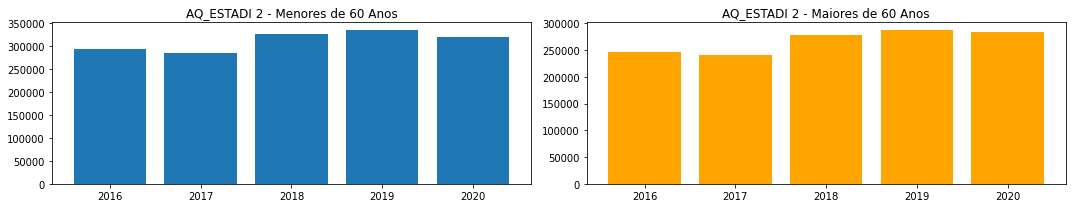

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
ESTADI = 2
print('ESTADI=',ESTADI)
for ano in dfAQ_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)].values[0]),  ' | Var. >= 60: ',dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0] )

x1 = dfAQ_ESTADI.ANO[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y1 = dfAQ_ESTADI.QTD[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes[0].bar(x1, y1)
axes[0].set_title('AQ_ESTADI '+str(ESTADI)+' - Menores de 60 Anos')

x2 = dfAQ_ESTADI.ANO[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y2 = dfAQ_ESTADI.QTD[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AQ_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

fig.tight_layout()

AQ_ESTADI = 3.0

ESTADI= 3
2016 | Var. < 60: 0.0  | Var. >= 60:  0.0
2017 | Var. < 60: -3.1447584042673213  | Var. >= 60:  -3.8950504323810264
2018 | Var. < 60: 18.469110263242627  | Var. >= 60:  19.25071090523609
2019 | Var. < 60: 4.33103304721898  | Var. >= 60:  6.4724741846738425
2020 | Var. < 60: -2.857459543338507  | Var. >= 60:  -2.0409778333504818


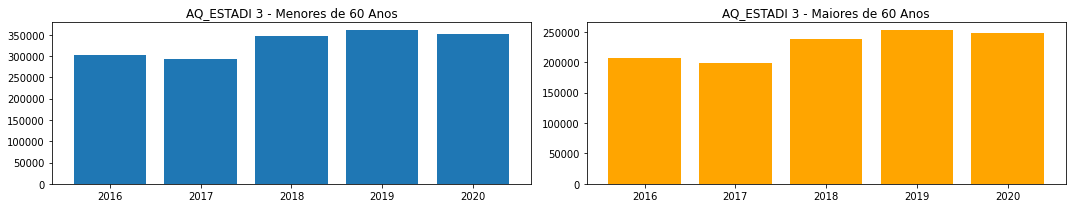

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
ESTADI = 3
print('ESTADI=',ESTADI)
for ano in dfAQ_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)].values[0]),  ' | Var. >= 60: ',dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0] )

x1 = dfAQ_ESTADI.ANO[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y1 = dfAQ_ESTADI.QTD[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes[0].bar(x1, y1)
axes[0].set_title('AQ_ESTADI '+str(ESTADI)+' - Menores de 60 Anos')

x2 = dfAQ_ESTADI.ANO[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y2 = dfAQ_ESTADI.QTD[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AQ_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

fig.tight_layout()

AQ_ESTADI = 4.0

ESTADI= 4
2016 | Var. < 60: 0.0  | Var. >= 60:  0.0
2017 | Var. < 60: -5.805918937758435  | Var. >= 60:  -3.152343892060955
2018 | Var. < 60: 23.364036096103007  | Var. >= 60:  23.18345337248688
2019 | Var. < 60: 9.601462991328049  | Var. >= 60:  10.390196317522253
2020 | Var. < 60: 0.7619999043514838  | Var. >= 60:  1.4939633937546262


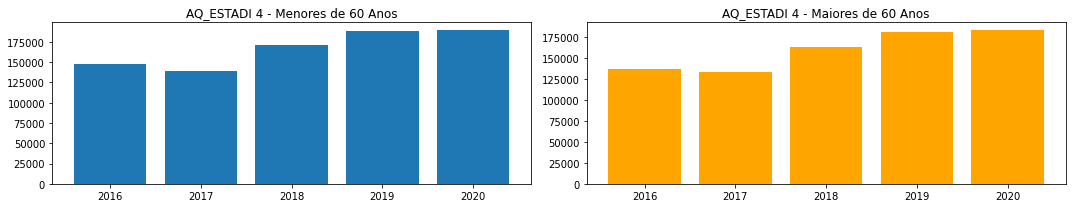

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
ESTADI = 4
print('ESTADI=',ESTADI)
for ano in dfAQ_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)].values[0]),  ' | Var. >= 60: ',dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0] )

x1 = dfAQ_ESTADI.ANO[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y1 = dfAQ_ESTADI.QTD[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes[0].bar(x1, y1)
axes[0].set_title('AQ_ESTADI '+str(ESTADI)+' - Menores de 60 Anos')

x2 = dfAQ_ESTADI.ANO[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y2 = dfAQ_ESTADI.QTD[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AQ_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

fig.tight_layout()

AQ_ESTADI = 10.0

ESTADI= 10
2016 | Var. < 60: 0.0  | Var. >= 60:  0.0
2017 | Var. < 60: -6.46427775596608  | Var. >= 60:  -3.139198678232134
2018 | Var. < 60: 14.79199990924458  | Var. >= 60:  19.291188843427648
2019 | Var. < 60: 2.424200498082783  | Var. >= 60:  6.61719950146373
2020 | Var. < 60: -5.059773641705505  | Var. >= 60:  -5.120885892416993


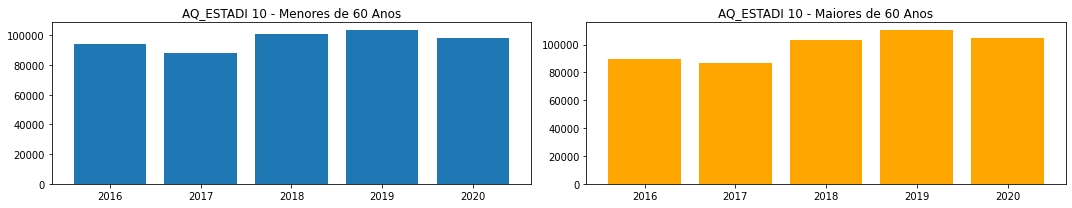

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
ESTADI = 10
print('ESTADI=',ESTADI)
for ano in dfAQ_ESTADI.ANO.sort_values(ascending=True).unique():  
    print(ano + ' | Var. < 60: ' + str(dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)].values[0]),  ' | Var. >= 60: ',dfAQ_ESTADI.VARIACAO[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['ANO']==ano) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI) ].values[0] )

x1 = dfAQ_ESTADI.ANO[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y1 = dfAQ_ESTADI.QTD[(dfAQ_ESTADI['MAIOR_60']==0) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes[0].bar(x1, y1)
axes[0].set_title('AQ_ESTADI '+str(ESTADI)+' - Menores de 60 Anos')

x2 = dfAQ_ESTADI.ANO[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
y2 = dfAQ_ESTADI.QTD[(dfAQ_ESTADI['MAIOR_60']==1) & (dfAQ_ESTADI['AQ_ESTADI']==ESTADI)]
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('AQ_ESTADI '+str(ESTADI)+' - Maiores de 60 Anos')

fig.tight_layout()

# Analise de Toda a Base de Dados por Estado

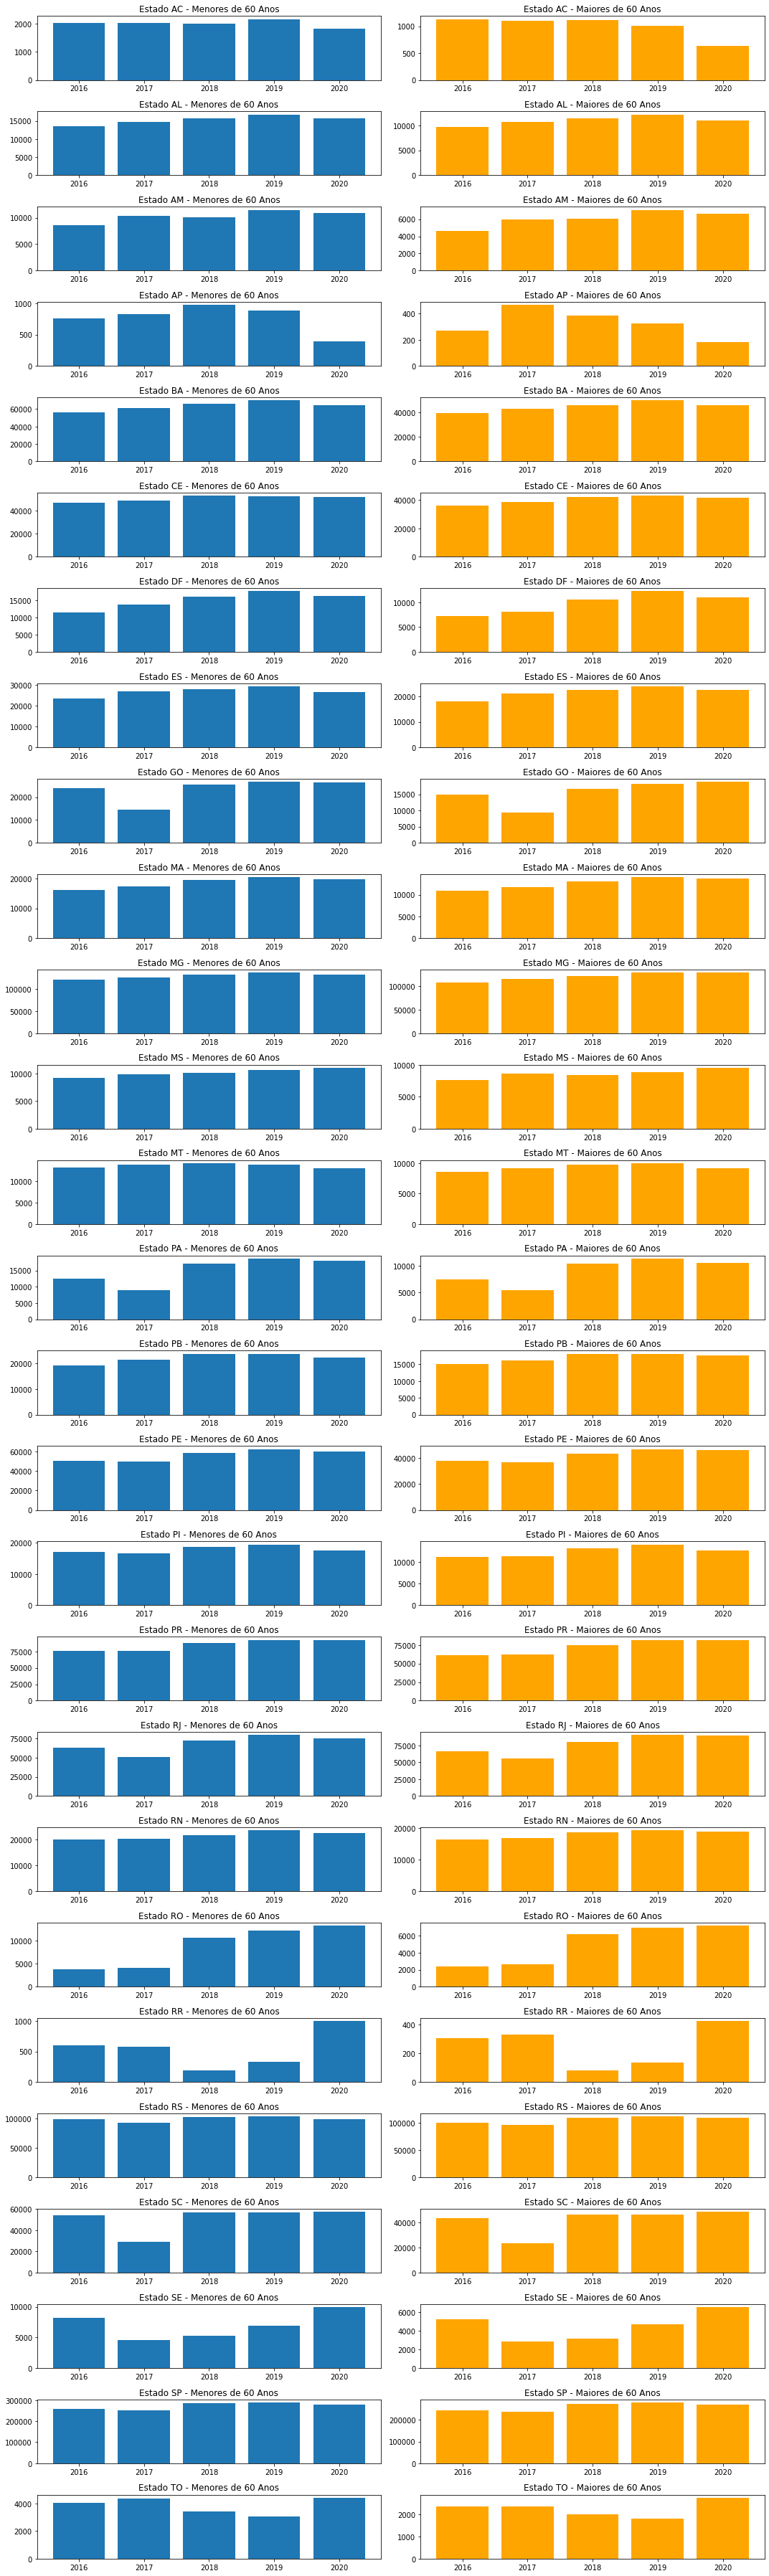

In [ ]:
# Vamos imprimir dois graficos para cada estado apresentando o numero de registros em cada ano de cada estado por faixa de idade

n_estados = df_2.ESTADO_UF.sort_values().unique()
fig, axes = plt.subplots(nrows=len(n_estados), ncols=2, figsize=(15,60))
i = 0
for uf in n_estados:
  
  filtroMenor60 = (df_2["ESTADO_UF"]==uf) & (df_2['MAIOR_60']== 0)
  x1 = df_2.ANO[filtroMenor60].sort_values(ascending=True).unique()
  y1 = df_2[filtroMenor60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
  axes[i][0].bar(x1, y1)
  axes[i][0].set_title('Estado '+str(uf)+' - Menores de 60 Anos')

  filtroMaior60 = (df_2["ESTADO_UF"]==uf) & (df_2['MAIOR_60']== 1)
  x2 = df_2.ANO[filtroMaior60].sort_values(ascending=True).unique()
  y2 = df_2[filtroMaior60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
  axes[i][1].bar(x2, y2,color = "orange")
  axes[i][1].set_title('Estado '+str(uf)+' - Maiores de 60 Anos')
  i=i+1

fig.tight_layout()

# Estado por Data

In [ ]:
# Data

# Estado por TPAPAC

In [ ]:
def graficoEstadoPorTPAPAC(df, tpapac):
  n_estados = df.ESTADO_UF.sort_values().unique()
  fig, axes = plt.subplots(nrows=len(n_estados), ncols=2, figsize=(15,40))
  i = 0
  for uf in n_estados:
    
    filtroMenor60 = (df["ESTADO_UF"]==uf) & (df['MAIOR_60']== 0)  & (df['AP_TPAPAC']== tpapac)
    x1 = df.ANO[filtroMenor60].sort_values(ascending=True).unique()
    y1 = df[filtroMenor60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
    axes[i][0].bar(x1, y1)
    axes[i][0].set_title('TPACPAC: '+str(tpapac)+' - Estado '+str(uf)+' - Menores de 60 Anos')

    filtroMaior60 = (df["ESTADO_UF"]==uf) & (df['MAIOR_60']== 1) & (df['AP_TPAPAC']== tpapac)
    x2 = df.ANO[filtroMaior60].sort_values(ascending=True).unique()
    y2 = df[filtroMaior60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
    axes[i][1].bar(x2, y2,color = "orange")
    axes[i][1].set_title('TPACPAC: '+str(tpapac)+' - Estado '+str(uf)+' - Maiores de 60 Anos')
    i=i+1

  fig.tight_layout()

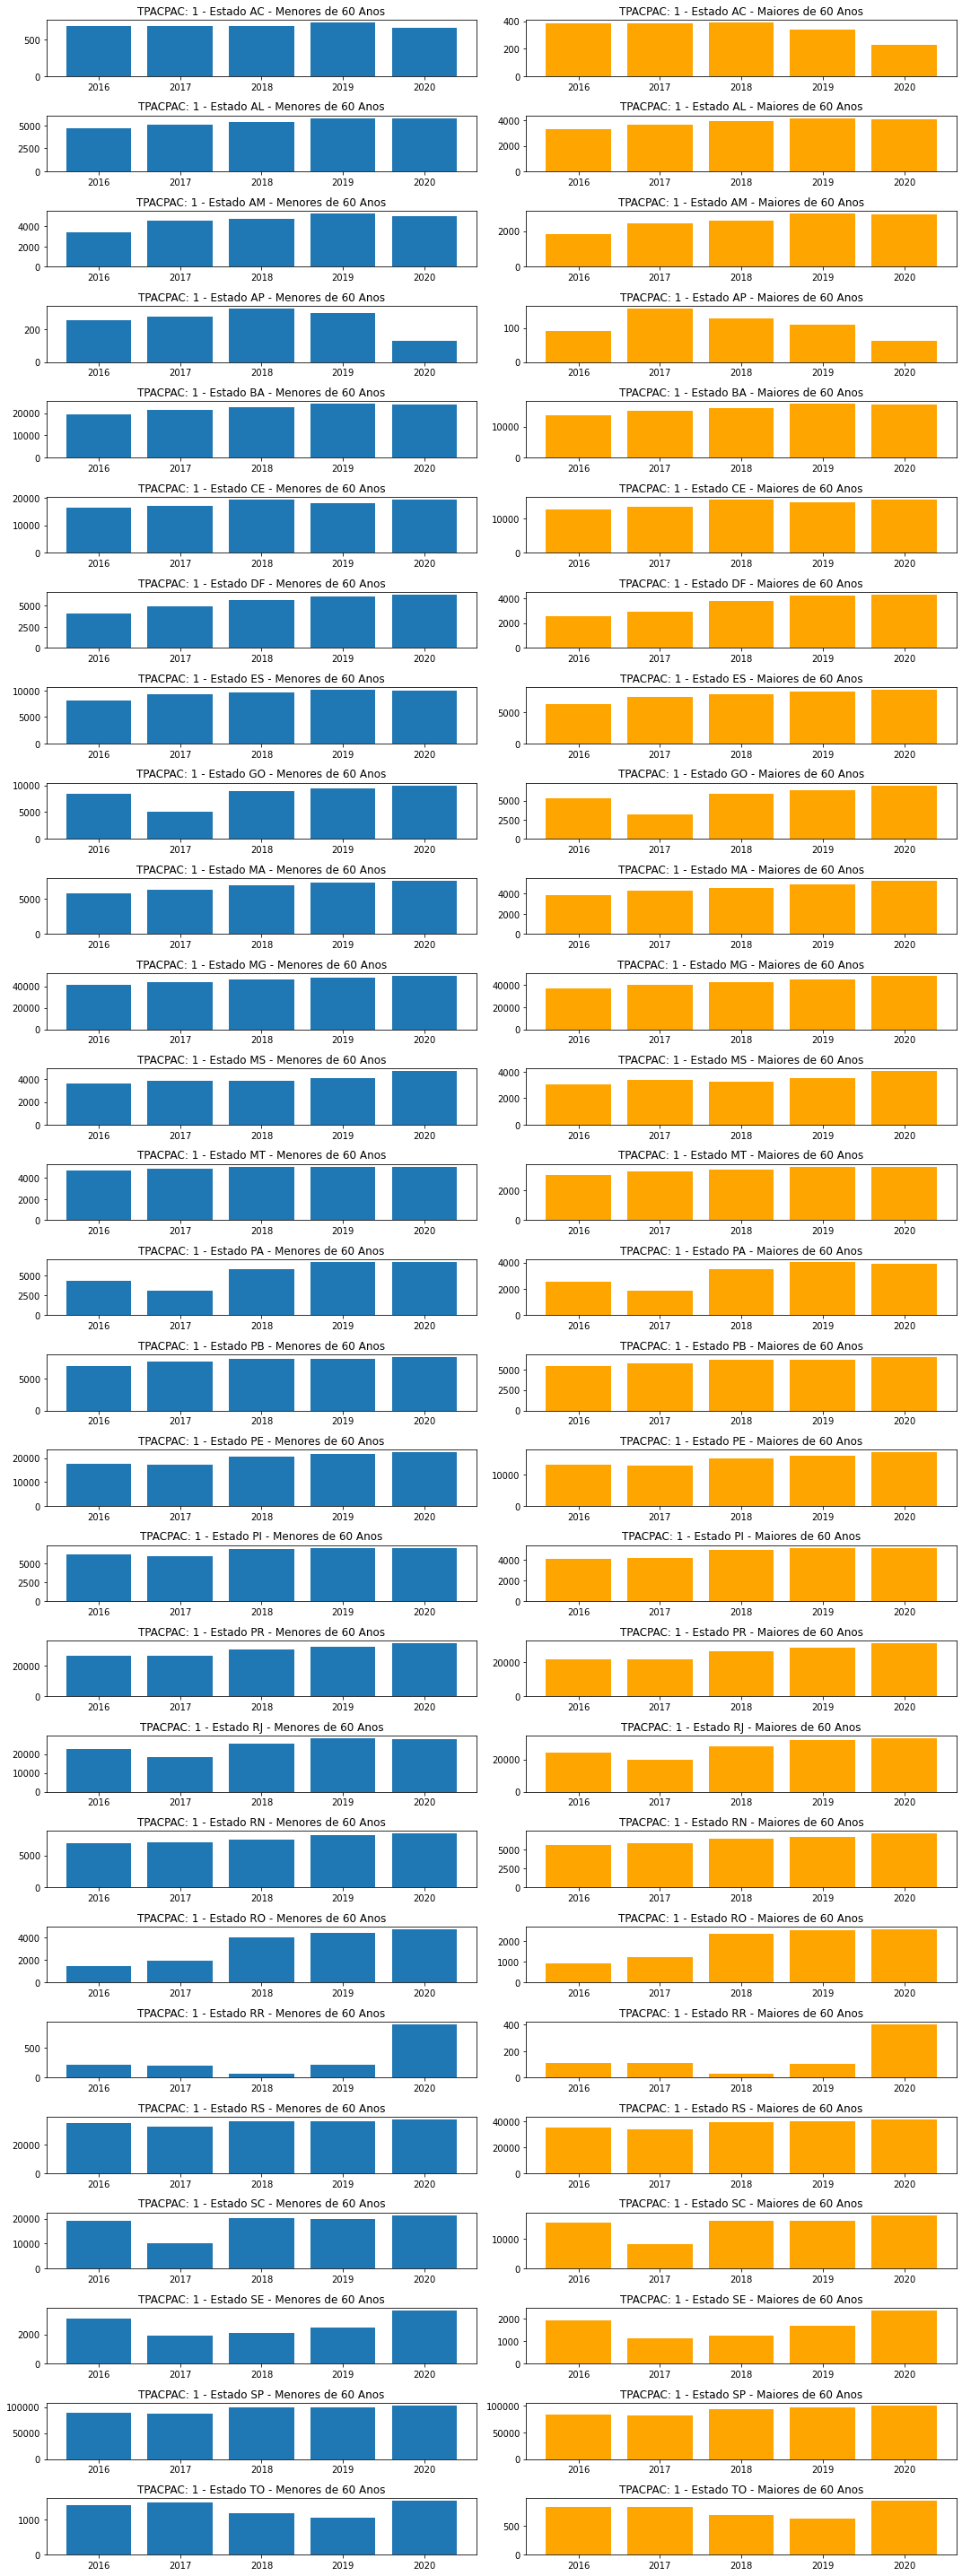

In [ ]:
#TPAPAC=1
graficoEstadoPorTPAPAC(df_2, 1)

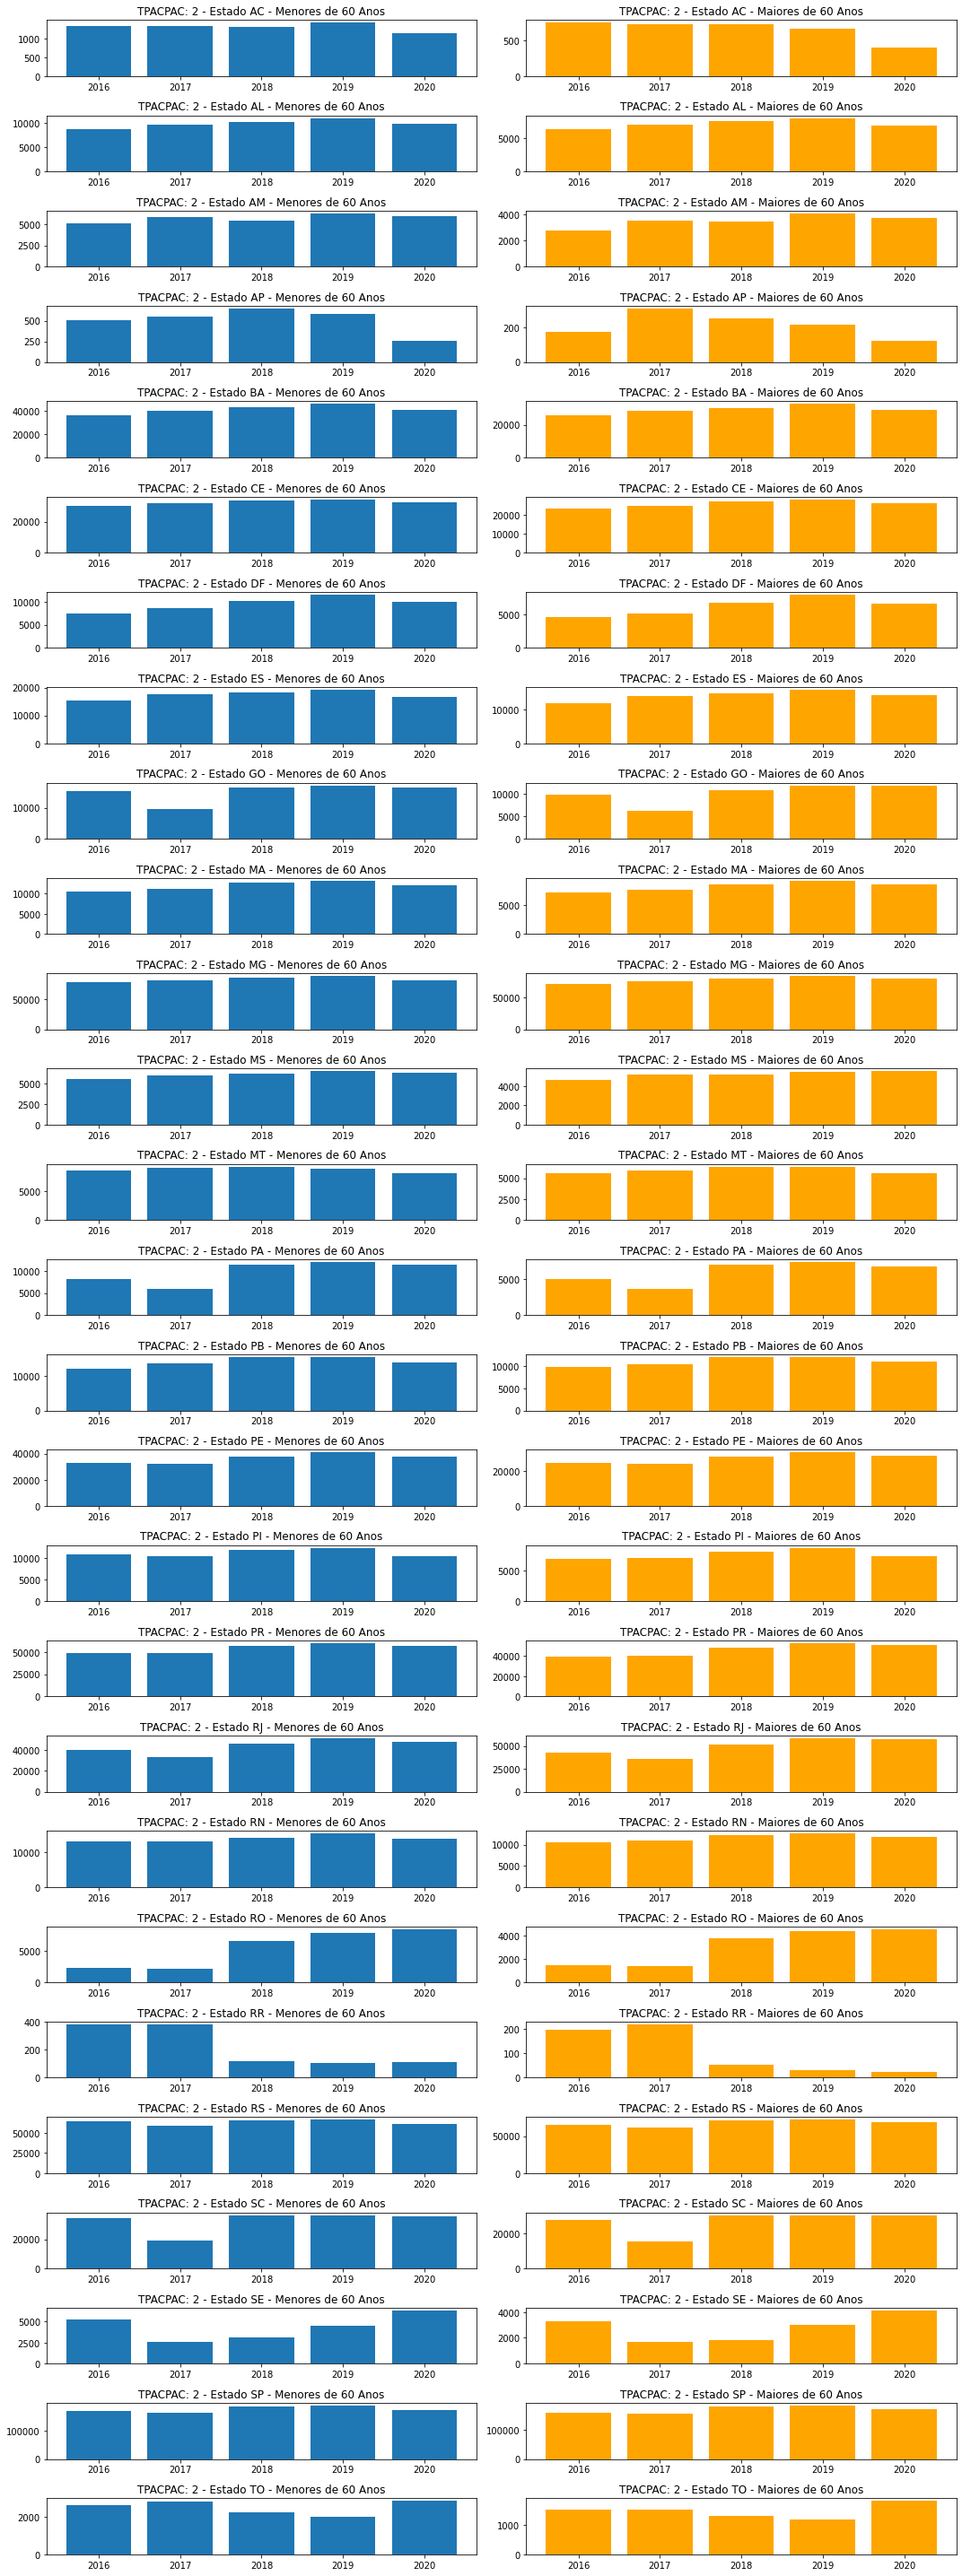

In [ ]:
#TPAPAC=2
graficoEstadoPorTPAPAC(df_2, 2)

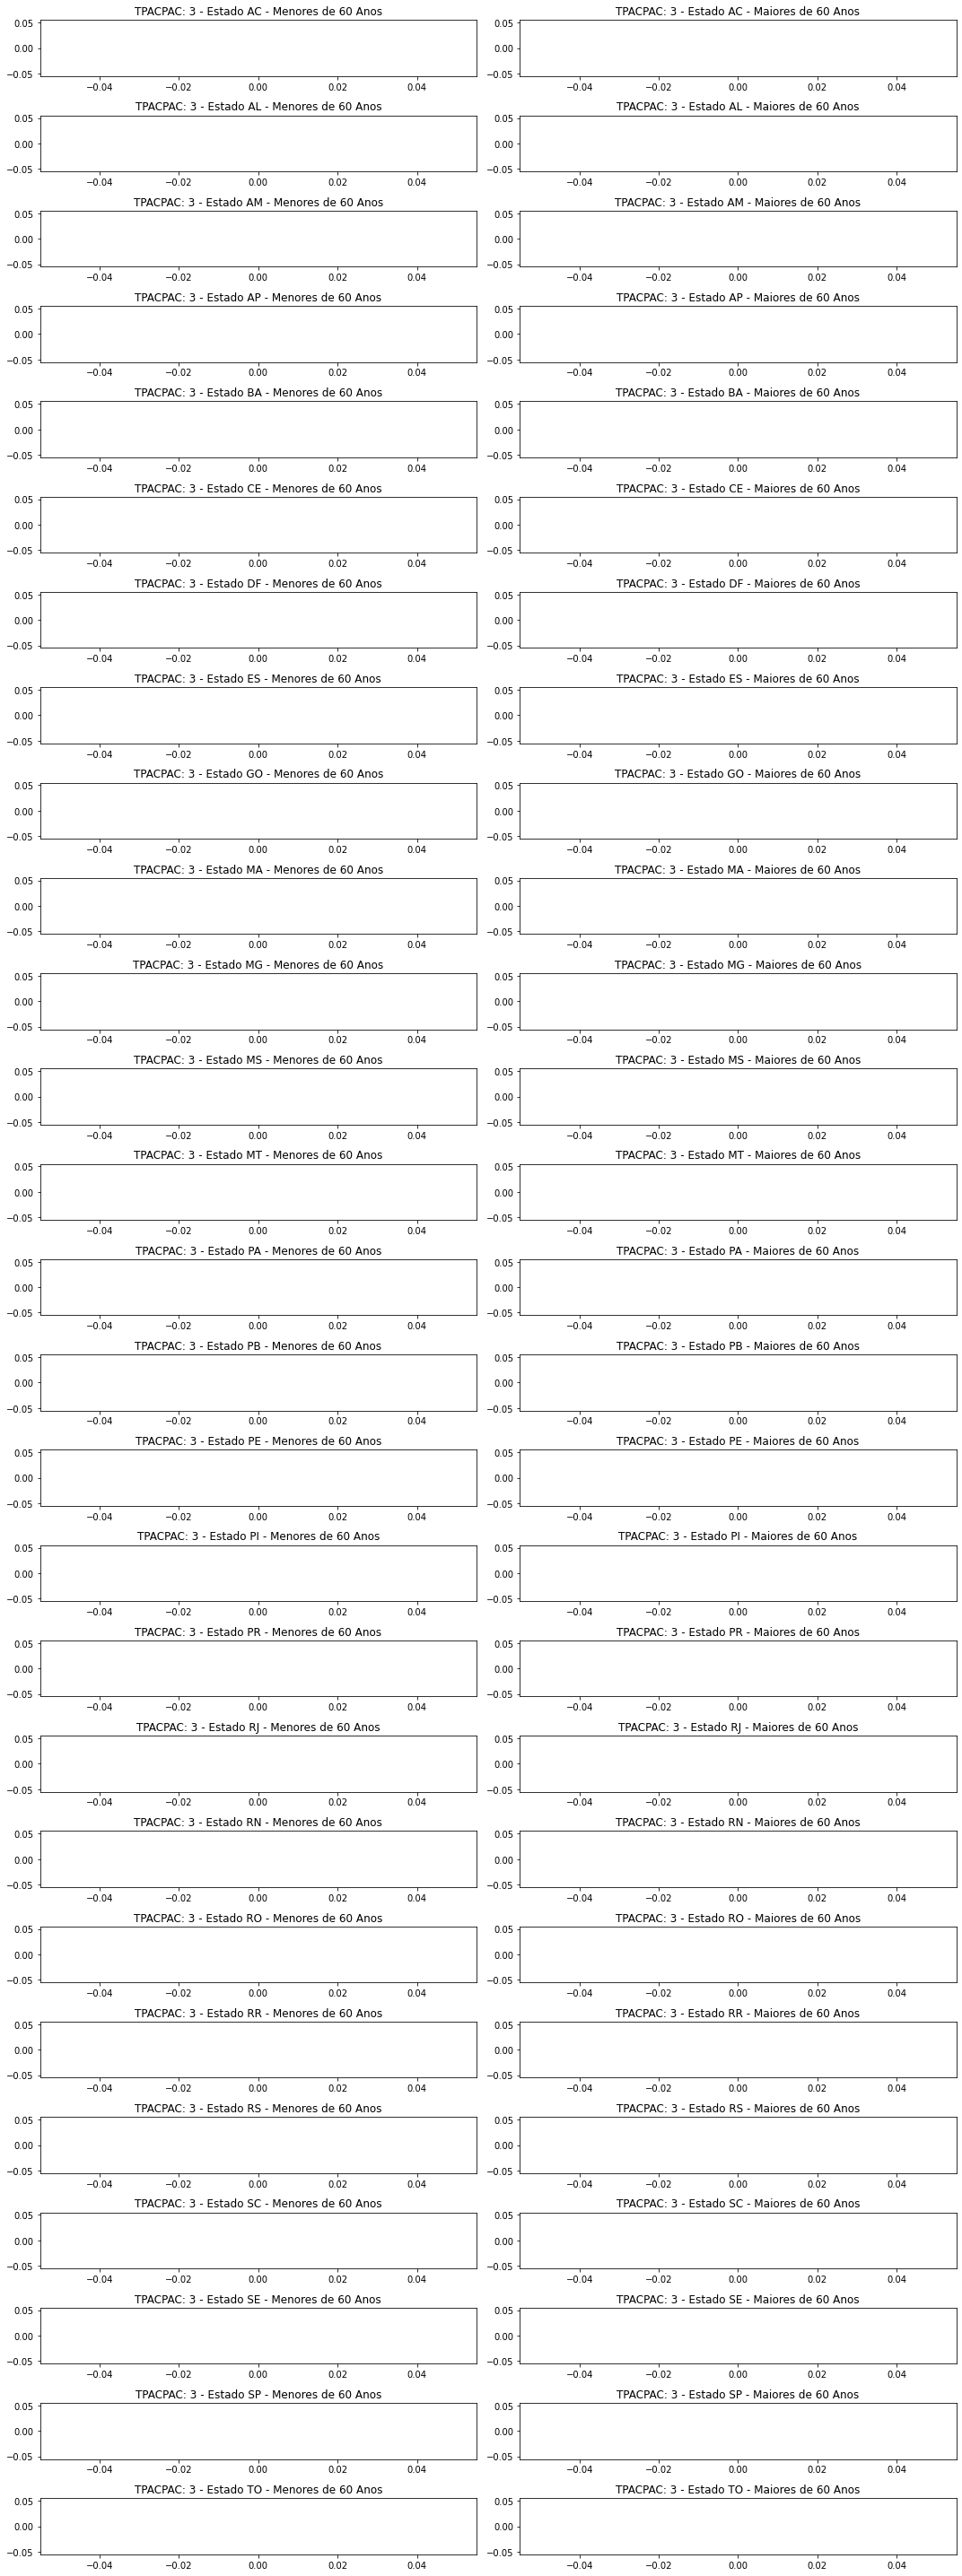

In [ ]:
#TPAPAC=3
graficoEstadoPorTPAPAC(df_2, 3)

# Estado por AQ_ESTADI

In [ ]:
# Estado por AQ_ESTADI -> Estádio – UICC (0;1;2;3;4)
def graficoEstadoPorAQ_ESTADI(df, estadi):
  n_estados = df.ESTADO_UF.sort_values().unique()
  fig, axes = plt.subplots(nrows=len(n_estados), ncols=2, figsize=(15,40))
  i = 0
  for uf in n_estados:
    
    filtroMenor60 = (df["ESTADO_UF"]==uf) & (df['MAIOR_60']== 0)  & (df['AQ_ESTADI']== estadi)
    x1 = df.ANO[filtroMenor60].sort_values(ascending=True).unique()
    y1 = df[filtroMenor60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
    axes[i][0].bar(x1, y1)
    axes[i][0].set_title('AQ_ESTADI: '+str(estadi)+' - Estado '+str(uf)+' - Menores de 60 Anos')

    filtroMaior60 = (df["ESTADO_UF"]==uf) & (df['MAIOR_60']== 1) & (df['AQ_ESTADI']== estadi)
    x2 = df.ANO[filtroMaior60].sort_values(ascending=True).unique()
    y2 = df[filtroMaior60].sort_values(by='ANO', ascending=True).groupby('ANO')['MAIOR_60'].count()
    axes[i][1].bar(x2, y2,color = "orange")
    axes[i][1].set_title('AQ_ESTADI: '+str(estadi)+' - Estado '+str(uf)+' - Maiores de 60 Anos')
    i=i+1

  fig.tight_layout()

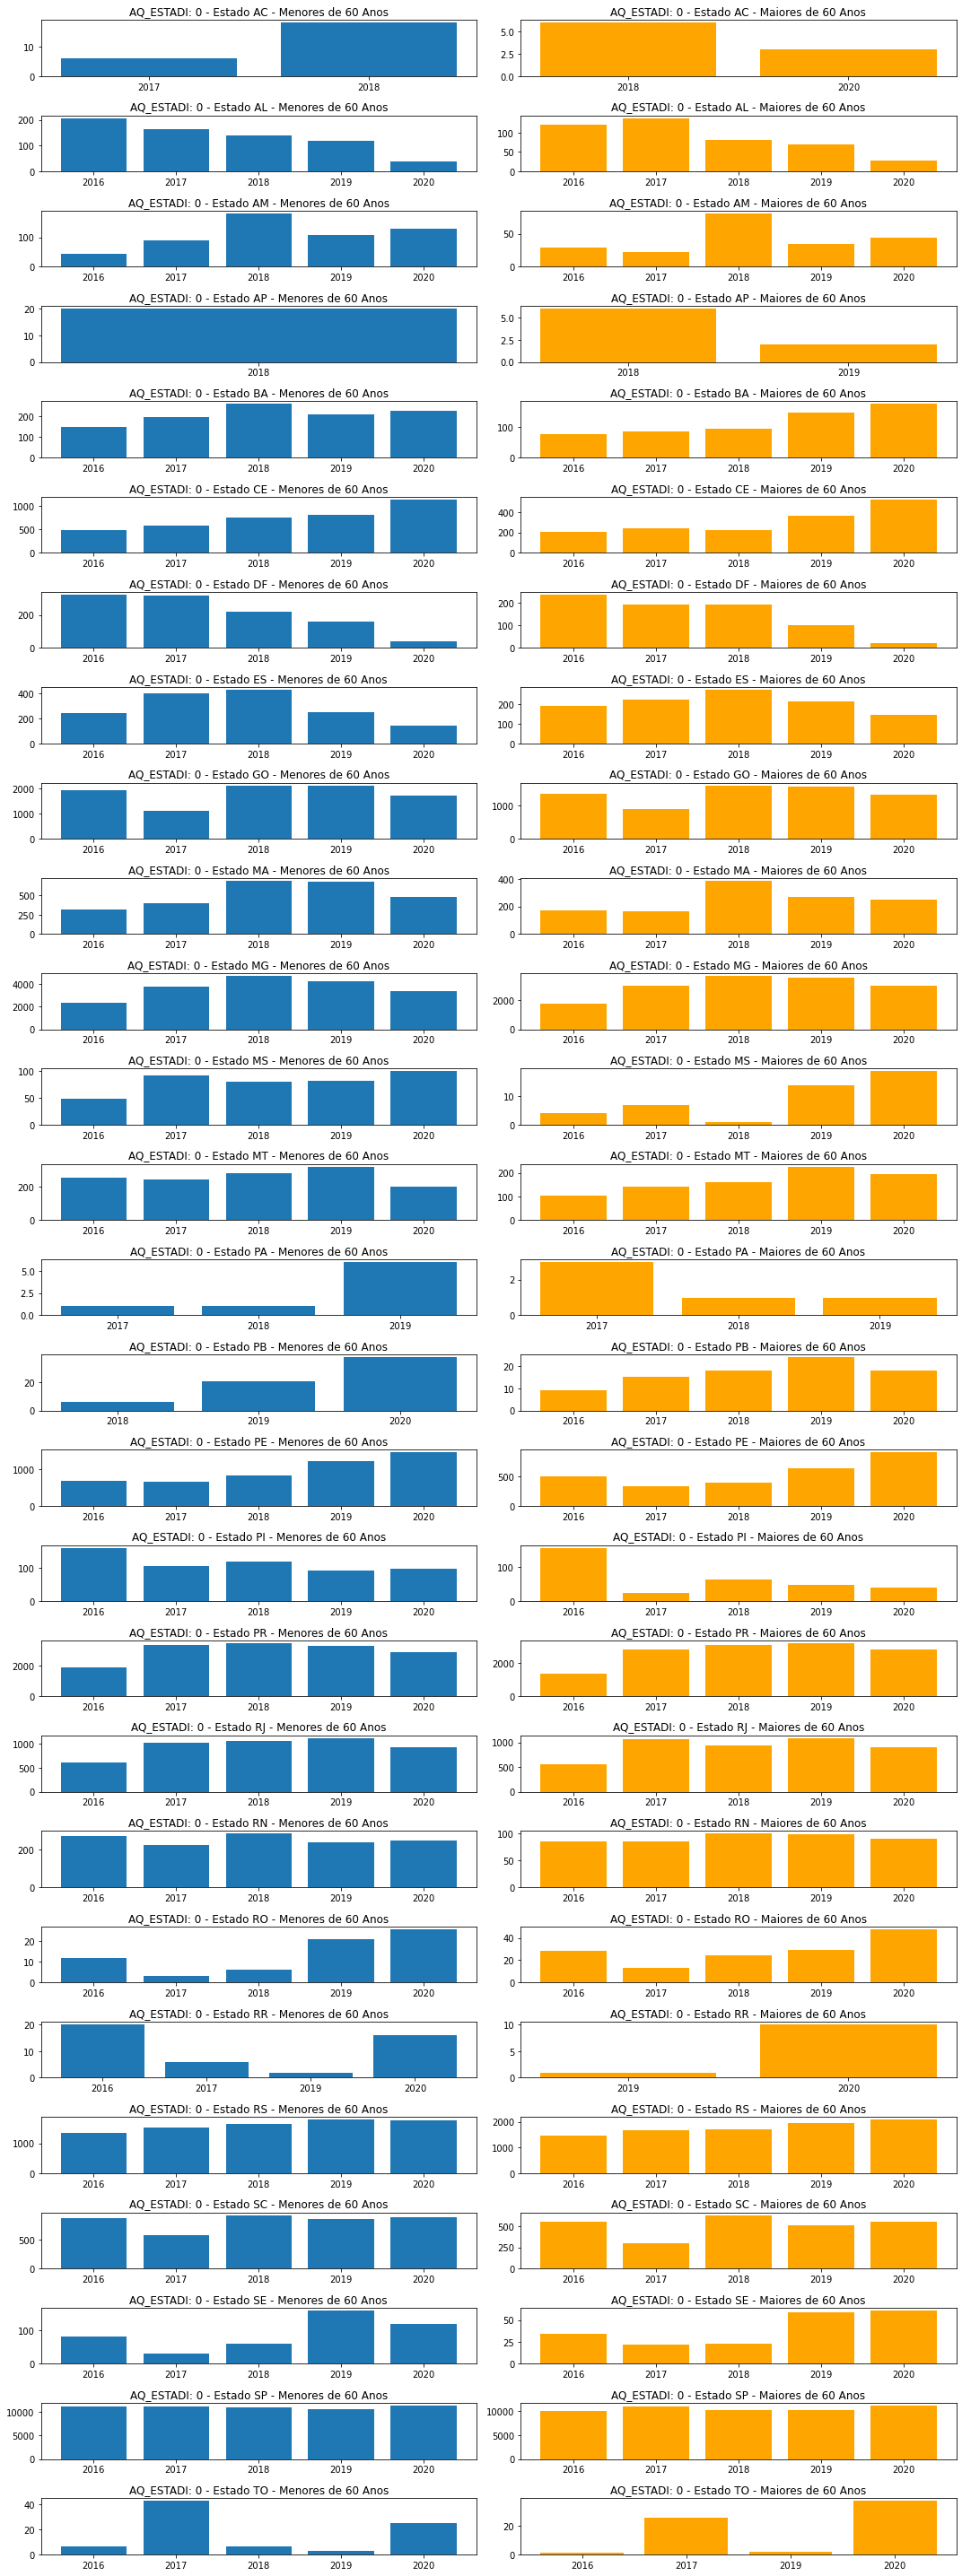

In [ ]:
#AQ_ESTADI=0
graficoEstadoPorAQ_ESTADI(df_2, 0)

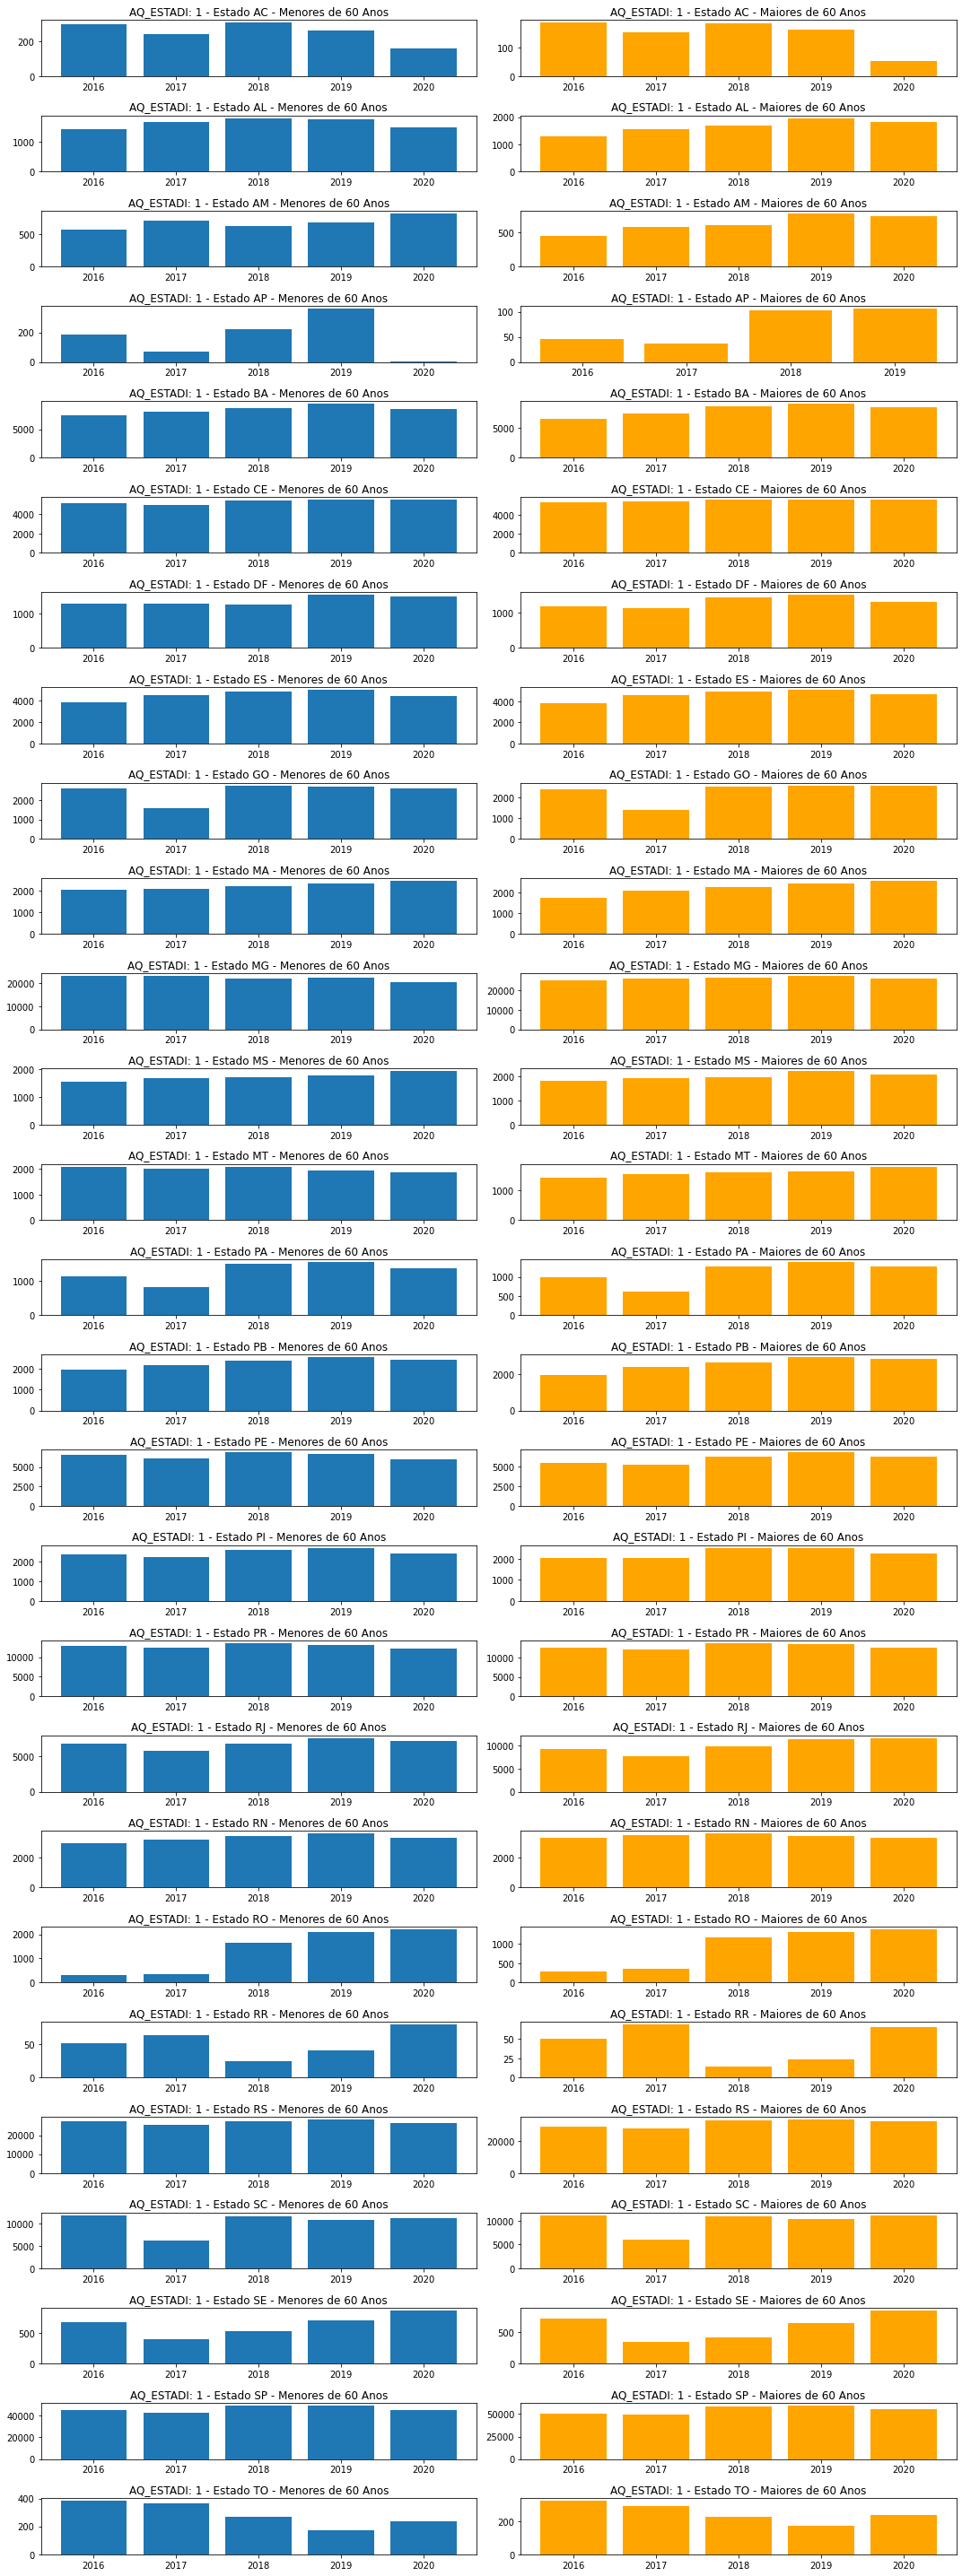

In [ ]:
#AQ_ESTADI=1
graficoEstadoPorAQ_ESTADI(df_2, 1)

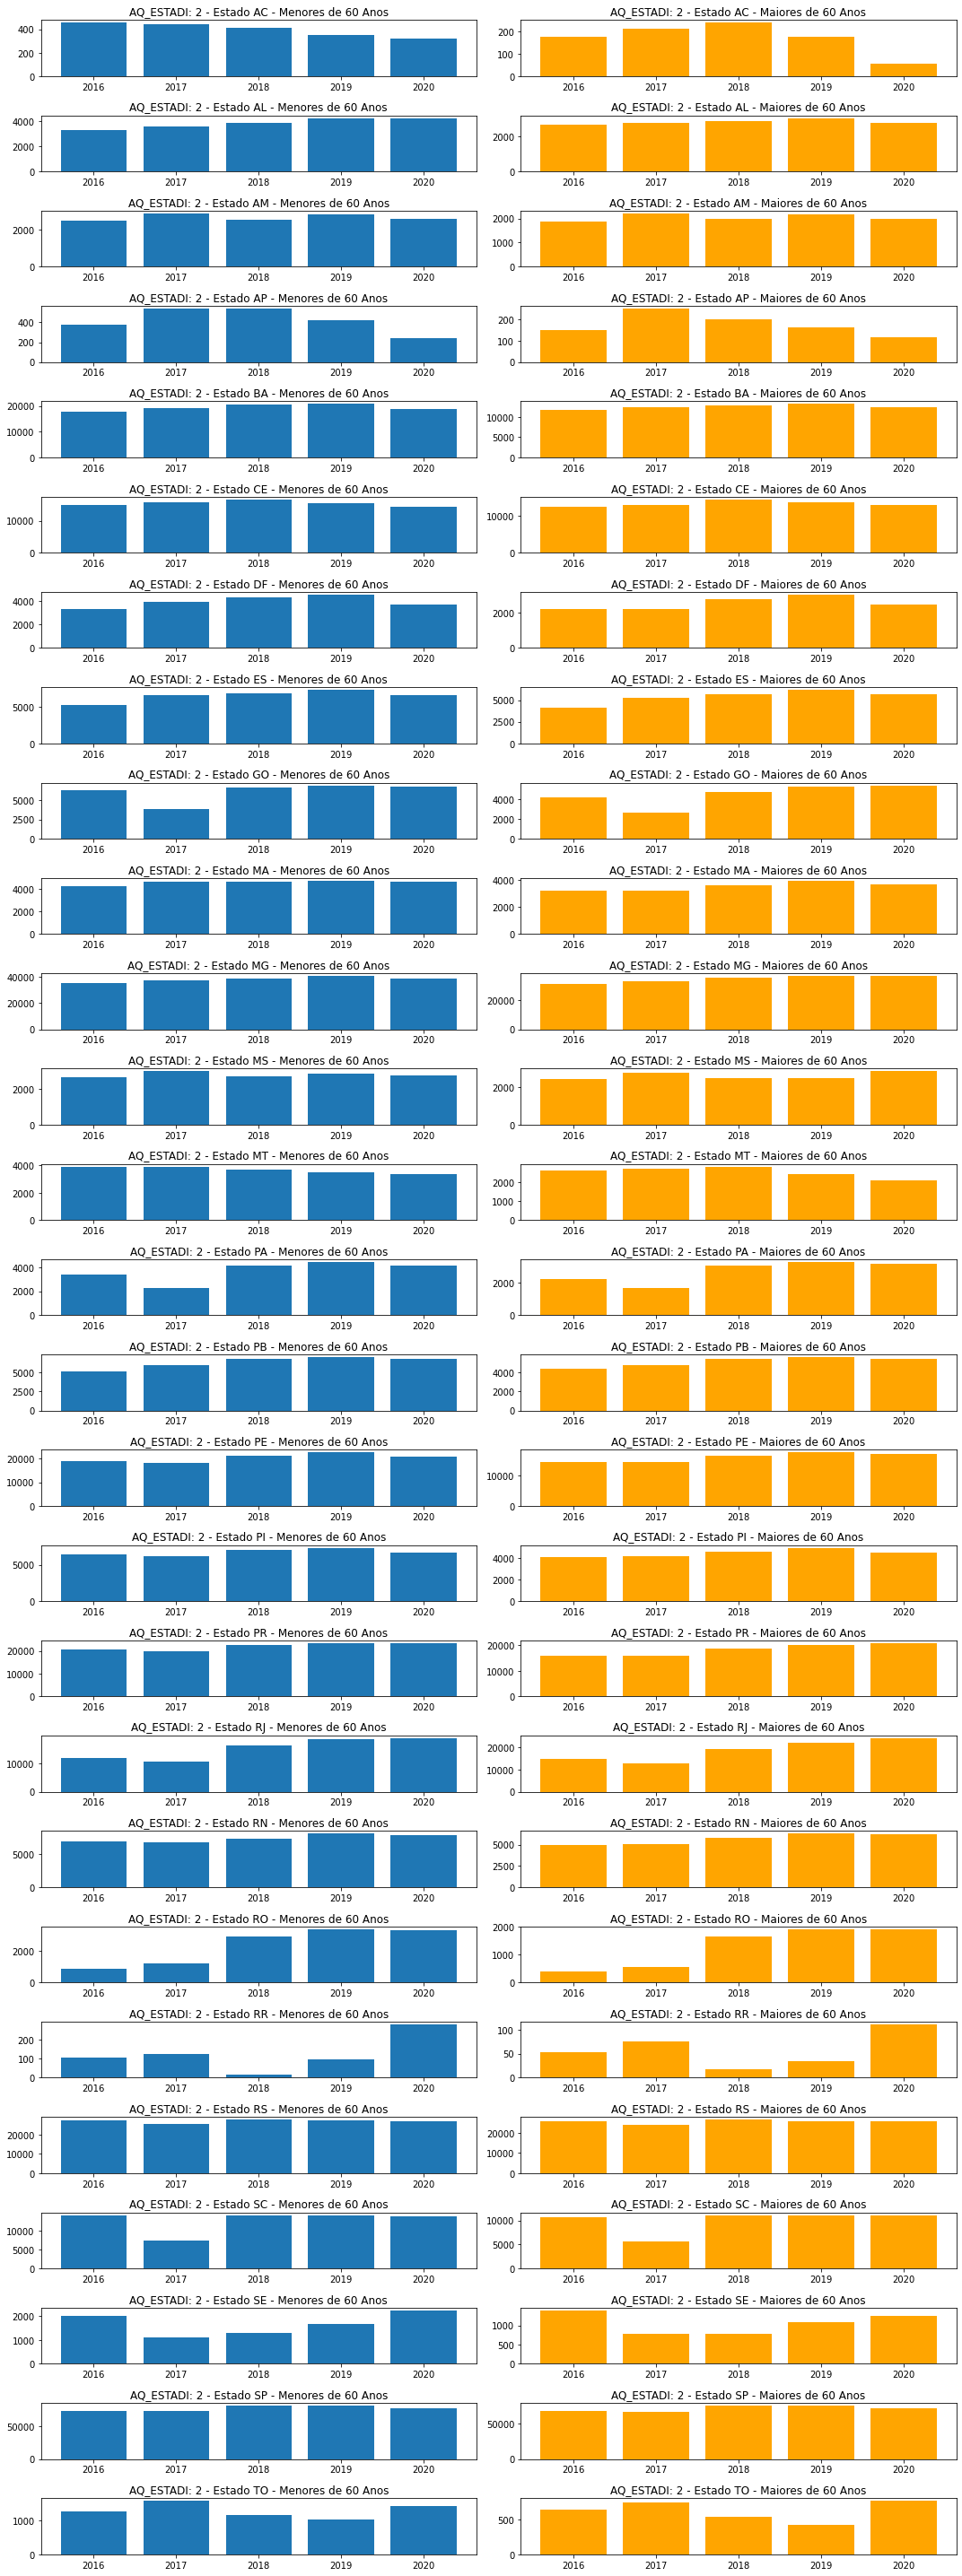

In [ ]:
#AQ_ESTADI=2
graficoEstadoPorAQ_ESTADI(df_2, 2)

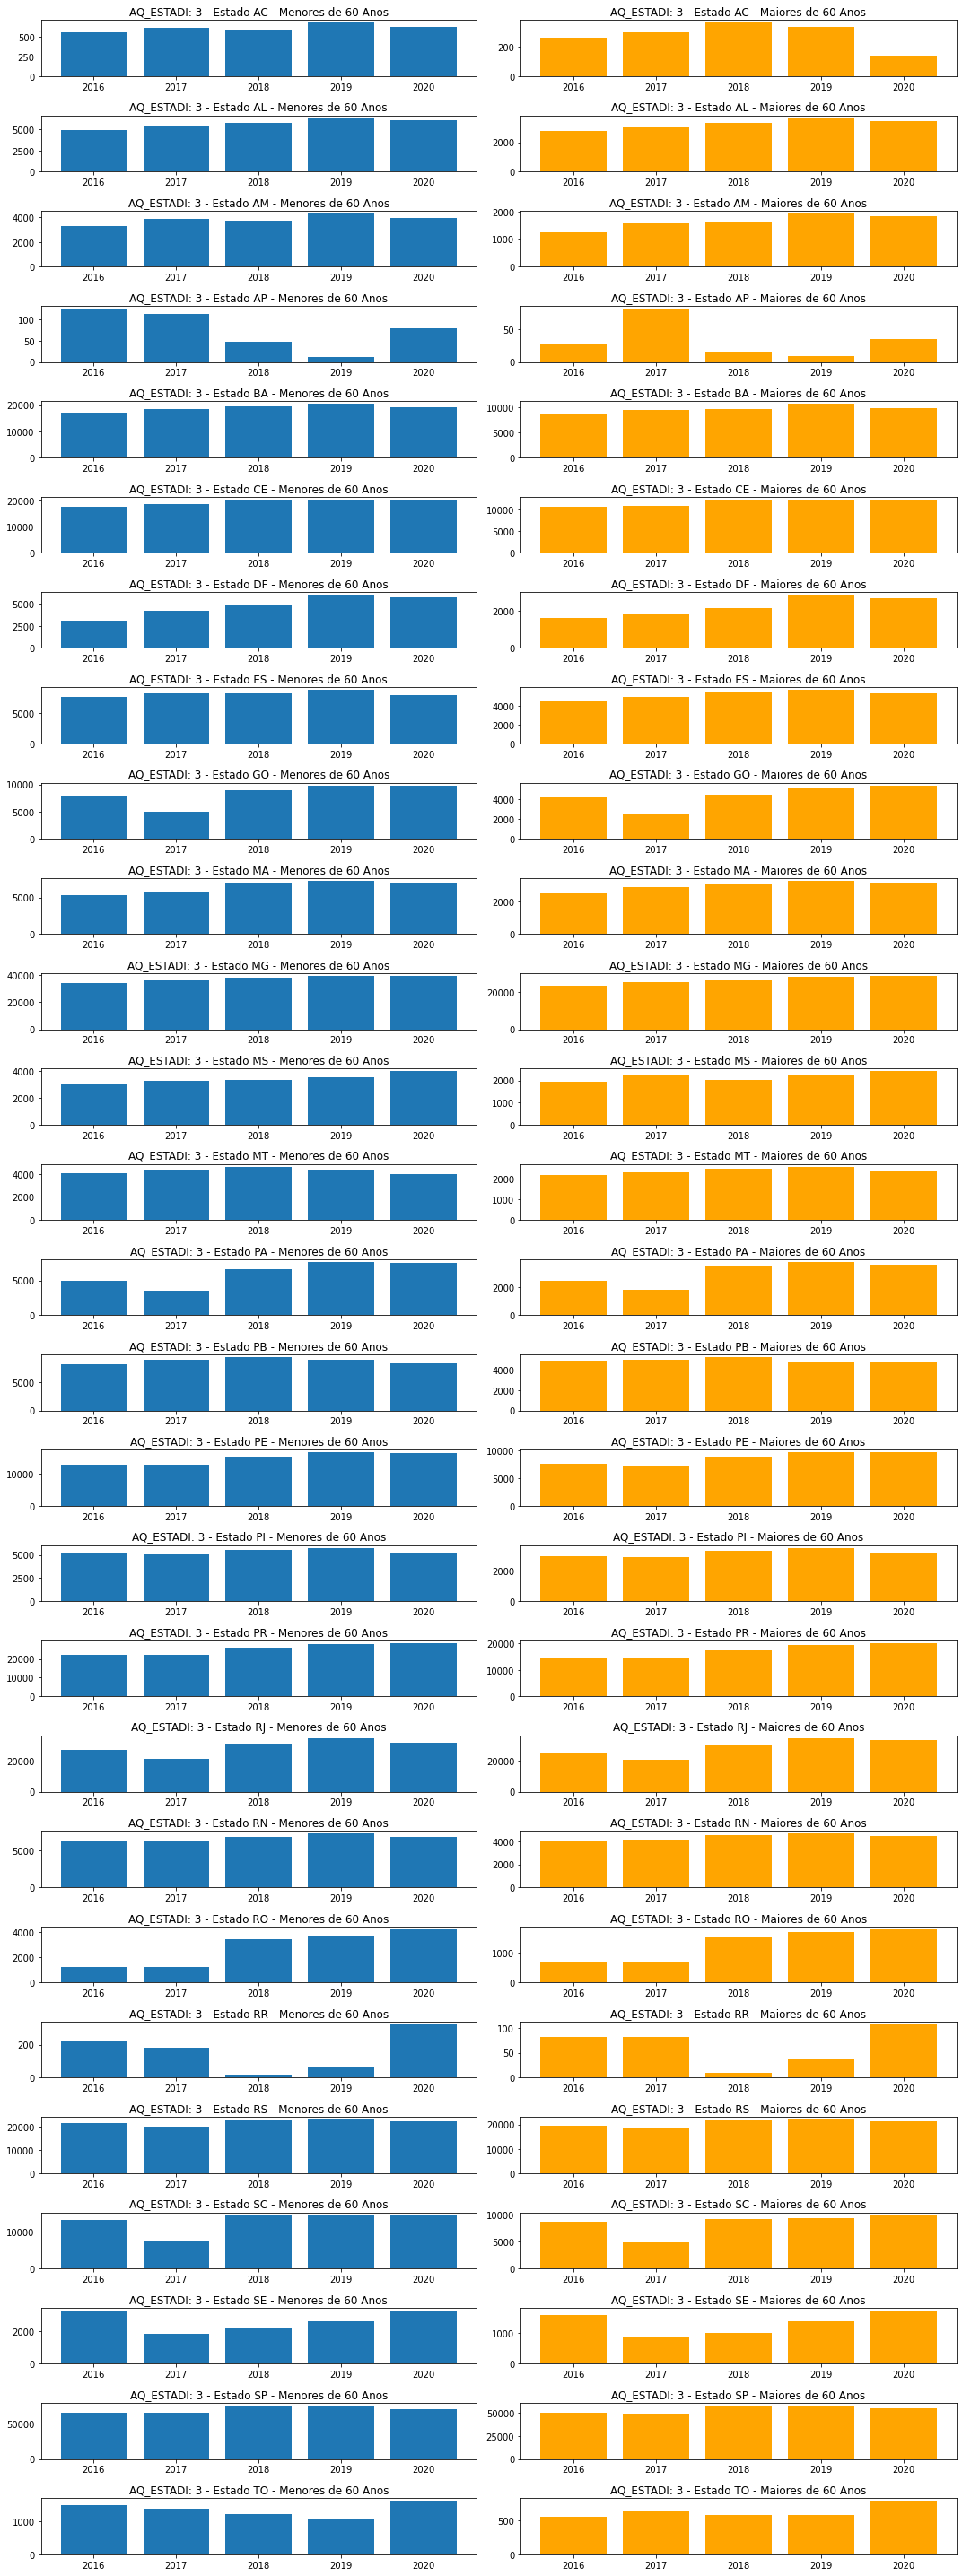

In [ ]:
#AQ_ESTADI=3
graficoEstadoPorAQ_ESTADI(df_2, 3)

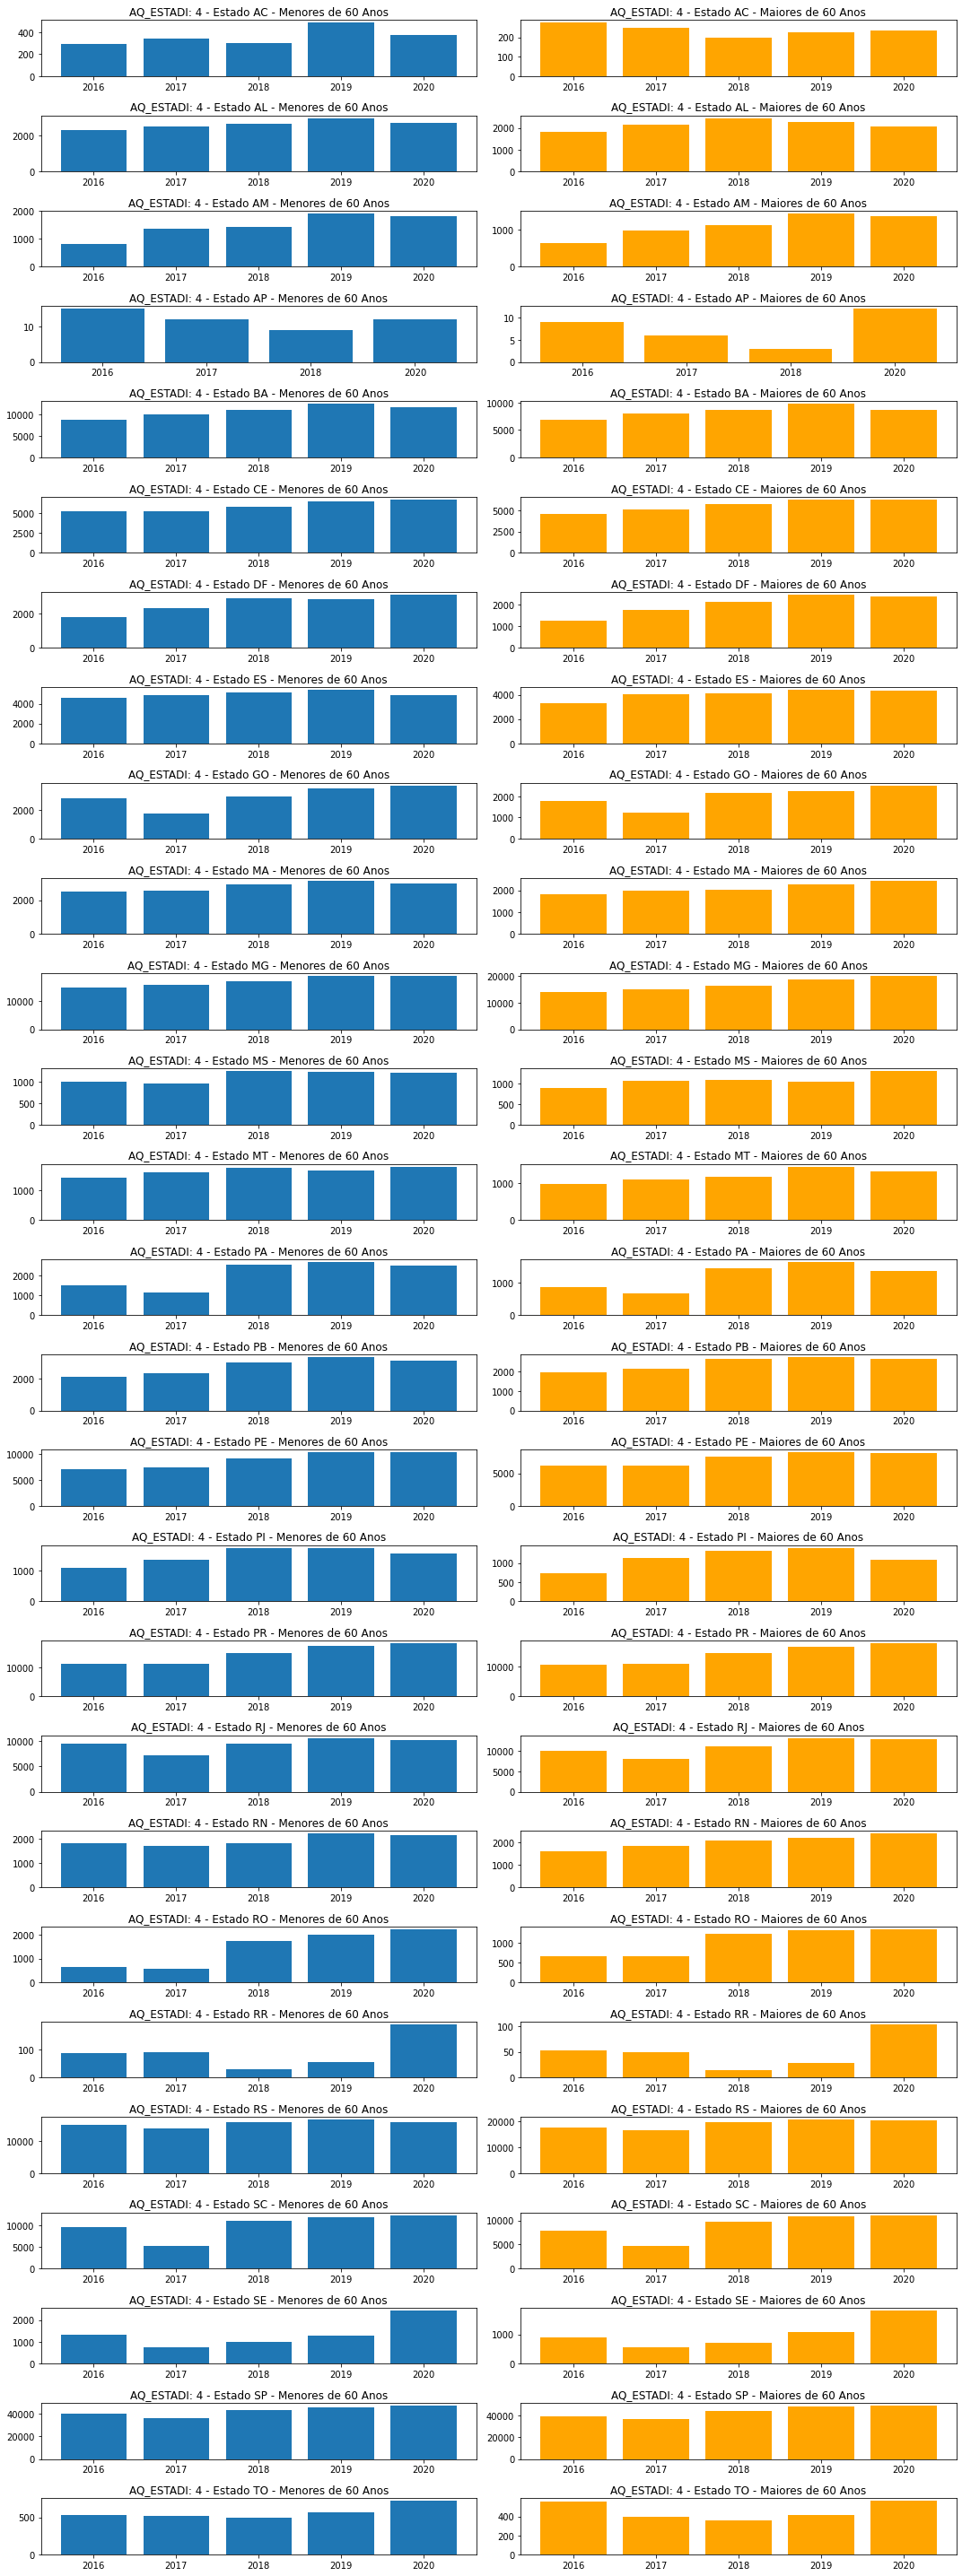

In [ ]:
#AQ_ESTADI=4
graficoEstadoPorAQ_ESTADI(df_2, 4)

# Por Datas

In [ ]:
df_2["DTSOLIC_2"] = df_2["DTSOLIC_2"].astype("datetime64")

Todos os Dados por mês

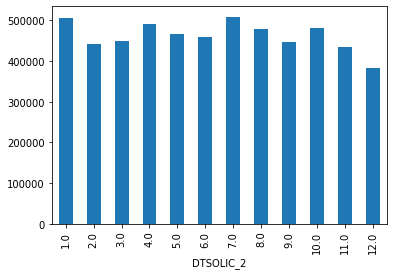

In [ ]:
# Todos os Dados por mês
df_2.groupby([df_2["DTSOLIC_2"][(df_2["MAIOR_60"]==0)].dt.month])['DTSOLIC_2'].count().plot(kind='bar')

Todos do dados por meses e por maior e menor que 60 anos

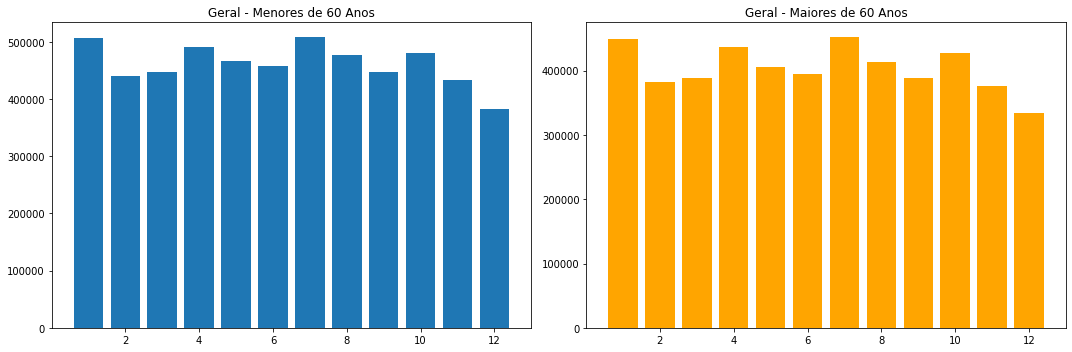

In [ ]:
# Todos do dados por meses e por maior e menor que 60 anos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

filtroMenor60 =  (df_2['MAIOR_60']== 0) 
df_datas1 = df_2['DTSOLIC_2'].groupby([df_2["DTSOLIC_2"][filtroMenor60].dt.month]).count()
x1 = df_datas1.index
y1 = df_datas1
axes[0].bar(x1, y1)
axes[0].set_title('Geral - Menores de 60 Anos')

filtroMaior60 = (df_2['MAIOR_60']== 1) 
df_datas2 = df_2['DTSOLIC_2'].groupby([df_2["DTSOLIC_2"][filtroMaior60].dt.month]).count()
x2 = df_datas2.index
y2 = df_datas2
axes[1].bar(x2, y2,color = "orange")
axes[1].set_title('Geral - Maiores de 60 Anos')
i=i+1
fig.tight_layout()

# Por anos e por idade maior e menor que 60 anos

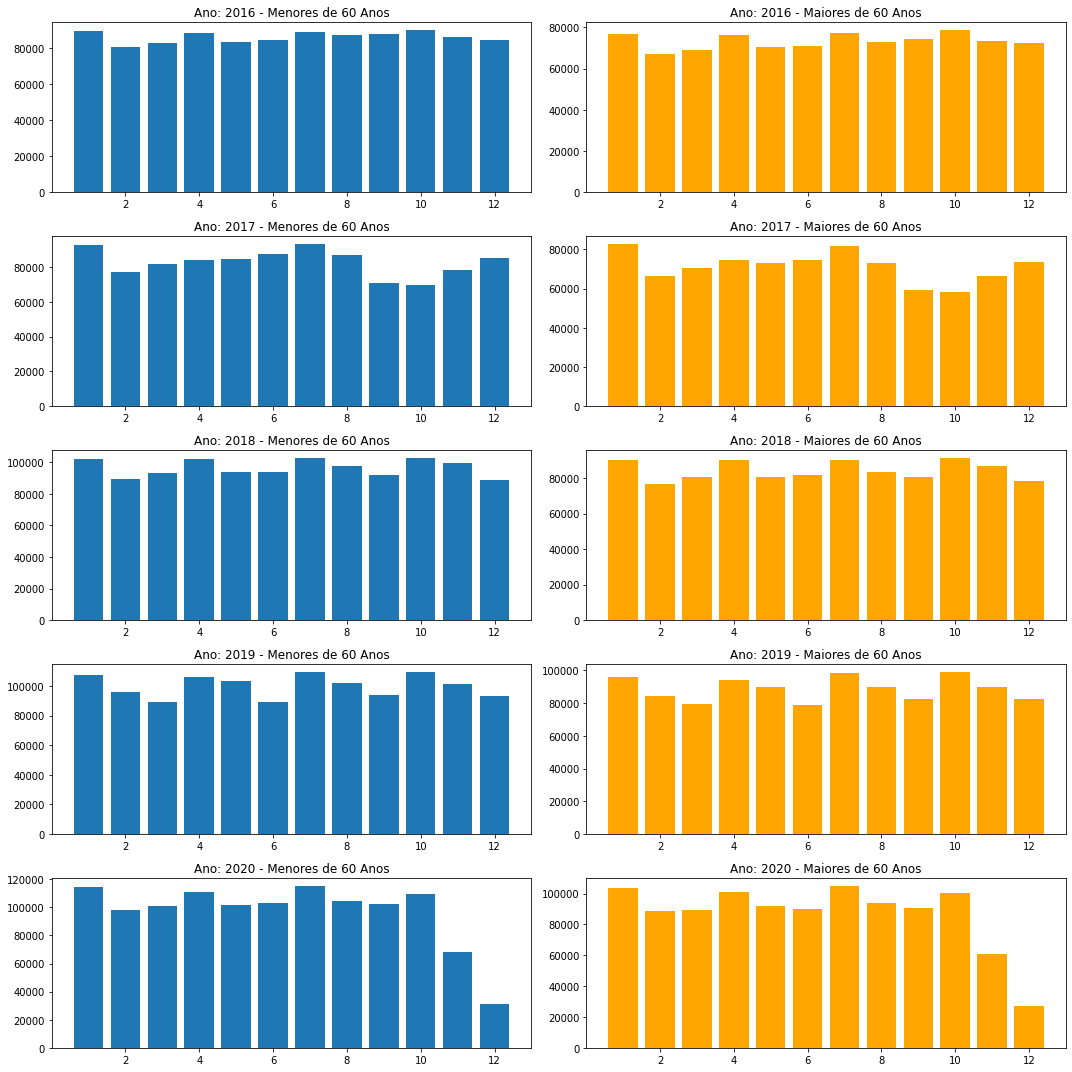

In [ ]:
# Por anos e por idade maior e menor que 60 anos
anos = df_2.ANO.sort_values().unique()
fig, axes = plt.subplots(nrows=len(anos), ncols=2, figsize=(15,15))
i = 0
for ano in anos:  
  filtroMenor60 =  (df_2['MAIOR_60']== 0) & (df_2['ANO']==ano)
  df_datas1 = df_2['DTSOLIC_2'].groupby([df_2["DTSOLIC_2"][filtroMenor60].dt.month]).count()
  x1 = df_datas1.index
  y1 = df_datas1
  axes[i][0].bar(x1, y1)
  axes[i][0].set_title('Ano: '+str(ano)+' - Menores de 60 Anos')

  filtroMaior60 = (df_2['MAIOR_60']== 1) & (df_2['ANO']==ano) 
  df_datas2 = df_2['DTSOLIC_2'].groupby([df_2["DTSOLIC_2"][filtroMaior60].dt.month]).count()
  x2 = df_datas2.index
  y2 = df_datas2
  axes[i][1].bar(x2, y2,color = "orange")
  axes[i][1].set_title('Ano: '+str(ano)+' - Maiores de 60 Anos')
  i=i+1
fig.tight_layout()

# Por Estado e por Ano

In [ ]:
def graficoEstadoPorData(df, uf):
  anos = df.ANO.sort_values().unique()
  fig, axes = plt.subplots(nrows=len(anos), ncols=2, figsize=(15,15))
  i = 0
  for ano in anos:  
    filtroMenor60 =  (df['MAIOR_60']== 0) & (df['ANO']==ano) & (df["ESTADO_UF"]==uf)
    df_datas1 = df['DTSOLIC_2'].groupby([df["DTSOLIC_2"][filtroMenor60].dt.month]).count()
    x1 = df_datas1.index
    y1 = df_datas1
    axes[i][0].bar(x1, y1)
    axes[i][0].set_title('Estado: '+str(uf)+'| Ano: '+str(ano)+' - Menores de 60 Anos')

    filtroMaior60 = (df['MAIOR_60']== 1) & (df['ANO']==ano)  & (df["ESTADO_UF"]==uf)
    df_datas2 = df['DTSOLIC_2'].groupby([df["DTSOLIC_2"][filtroMaior60].dt.month]).count()
    x2 = df_datas2.index
    y2 = df_datas2
    axes[i][1].bar(x2, y2,color = "orange")
    axes[i][1].set_title('Estado: '+str(uf)+' | Ano: '+str(ano)+' - Maiores de 60 Anos')
    i=i+1
  fig.tight_layout()

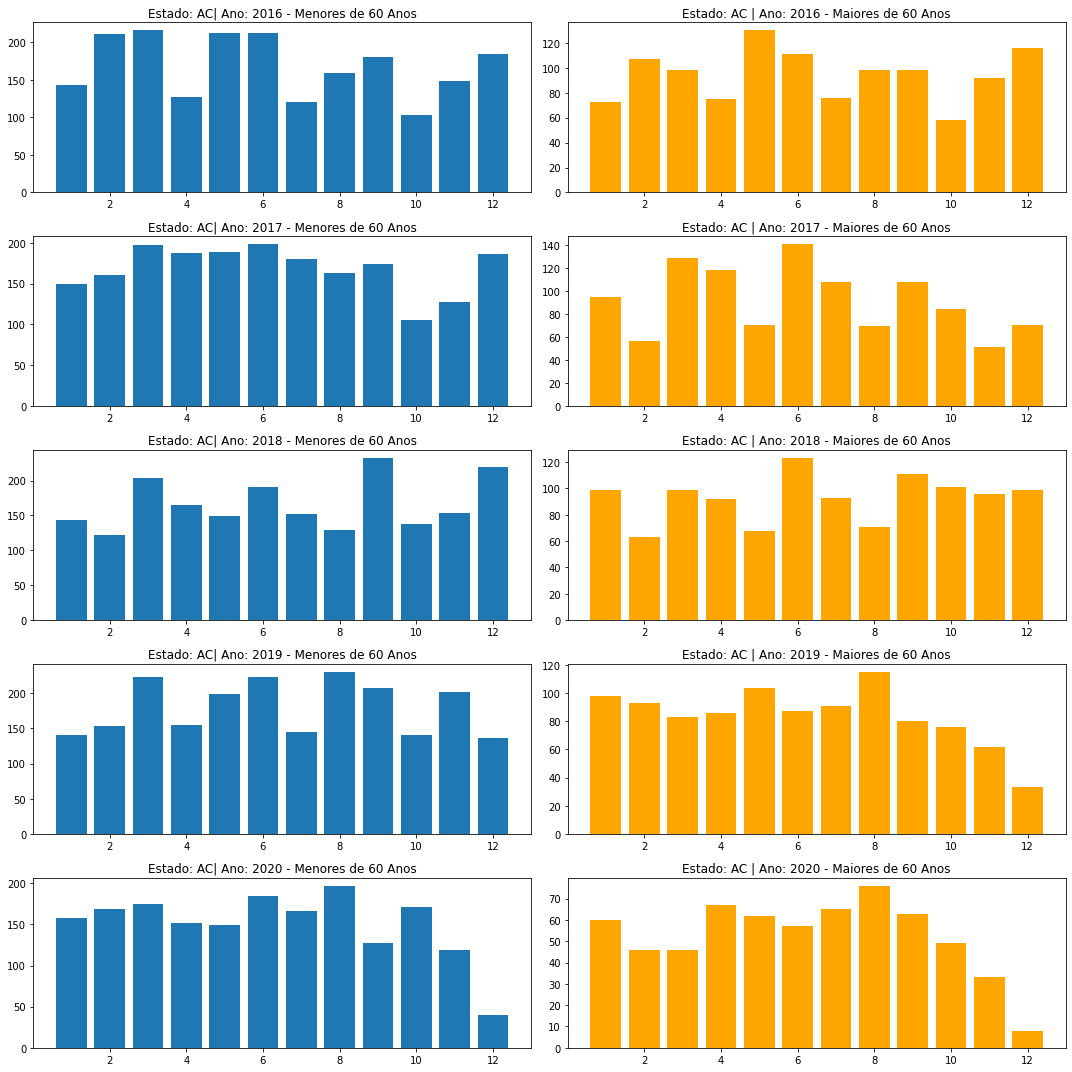

In [ ]:
graficoEstadoPorData(df_2, 'AC')

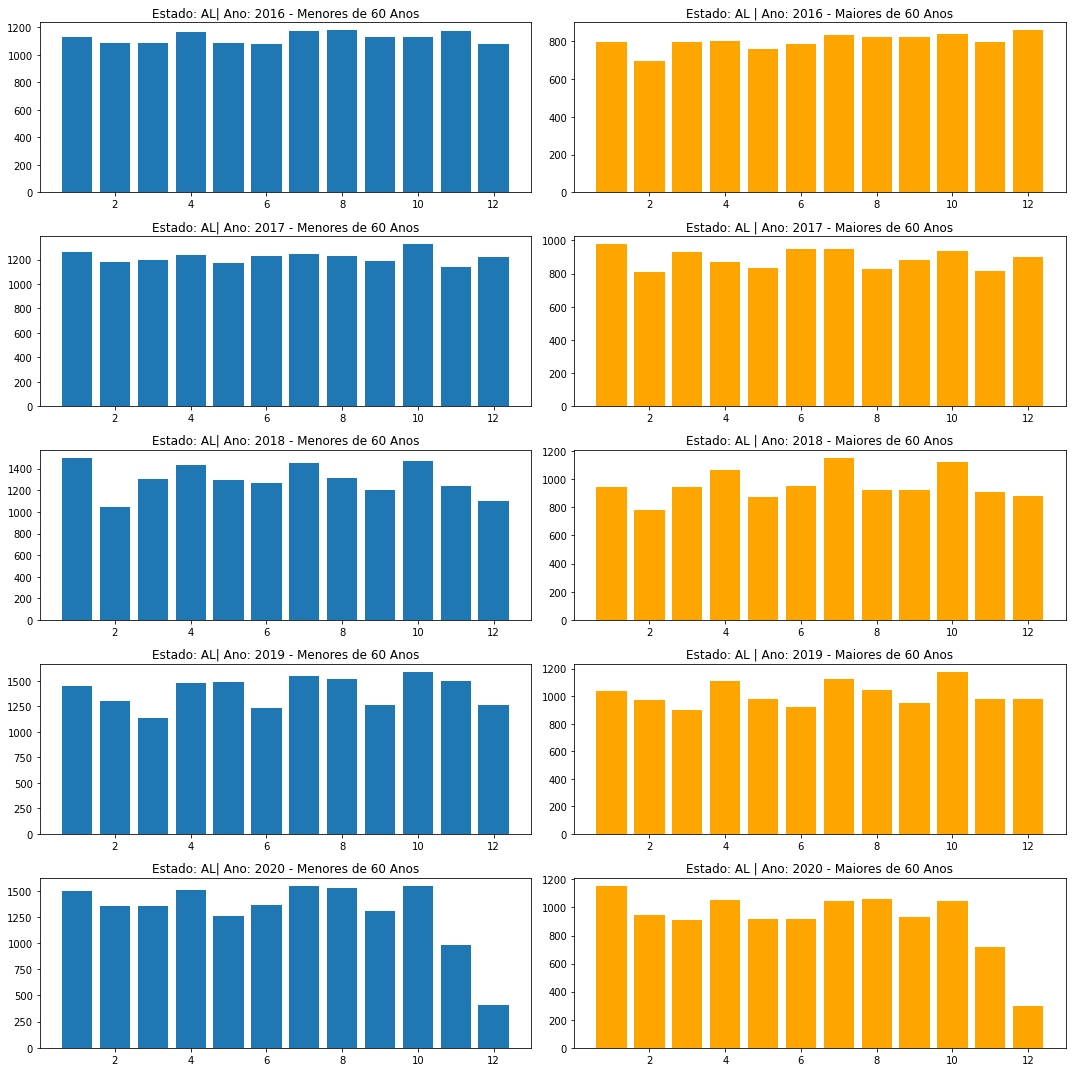

In [ ]:
graficoEstadoPorData(df_2, 'AL')

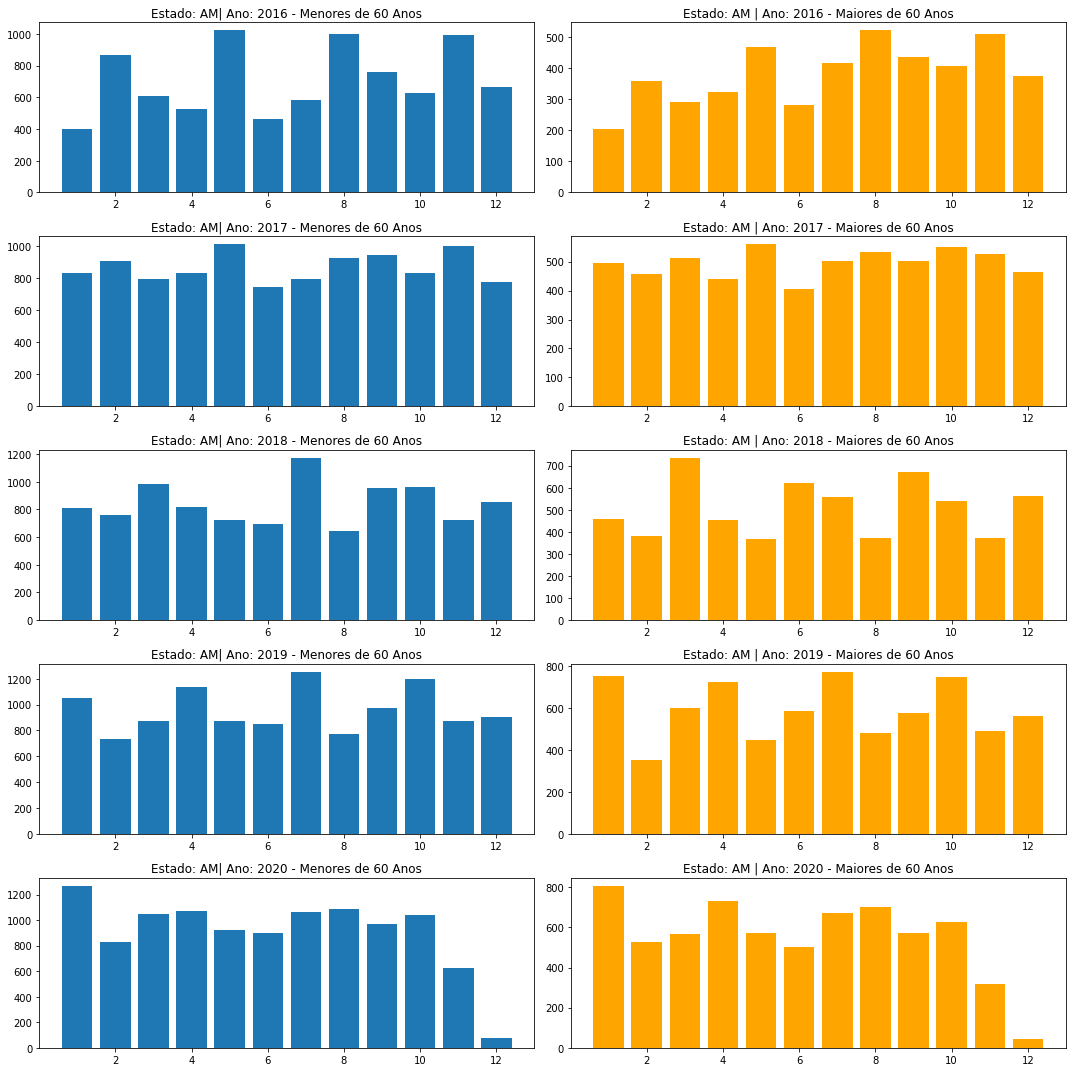

In [ ]:
graficoEstadoPorData(df_2, 'AM')

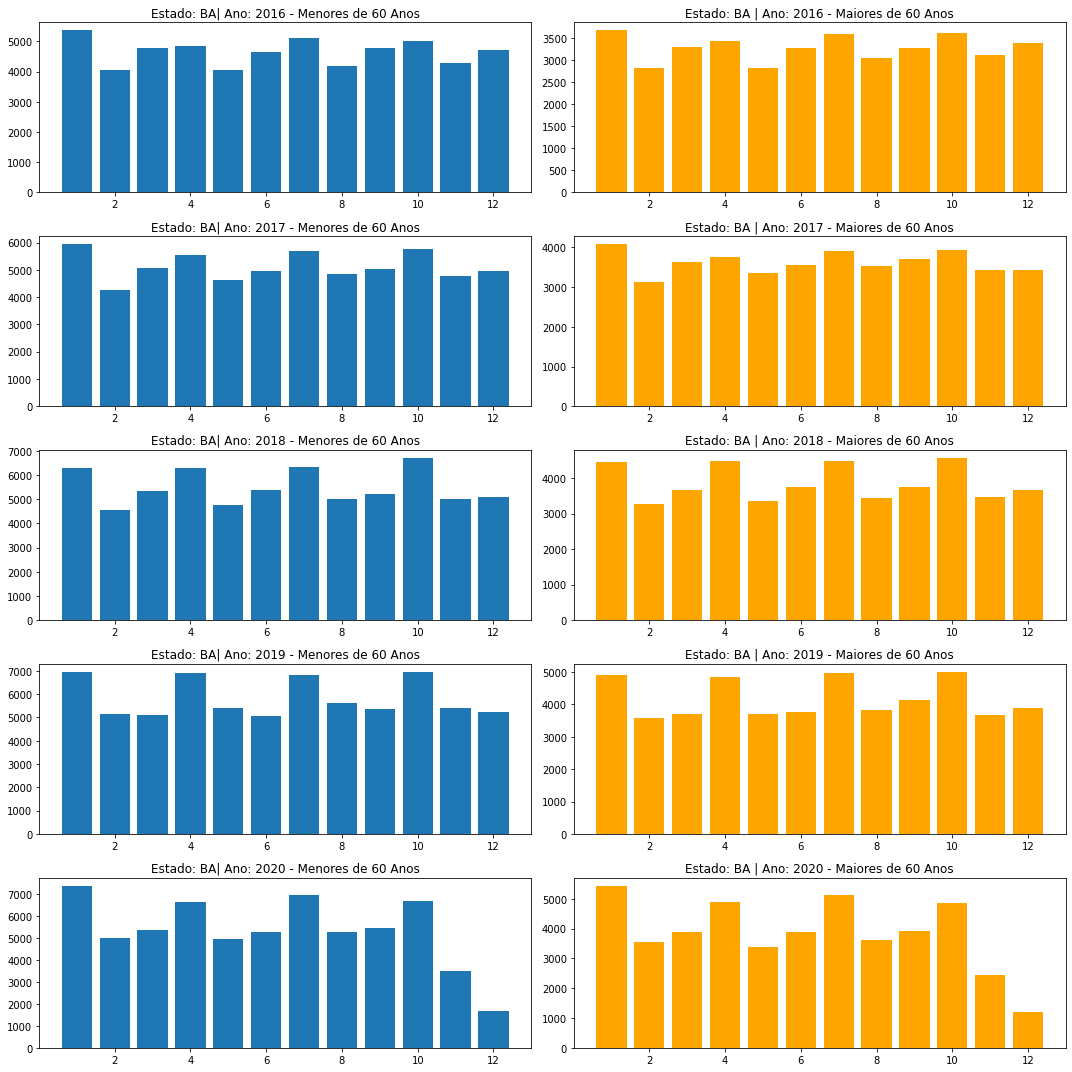

In [ ]:
graficoEstadoPorData(df_2, 'BA')

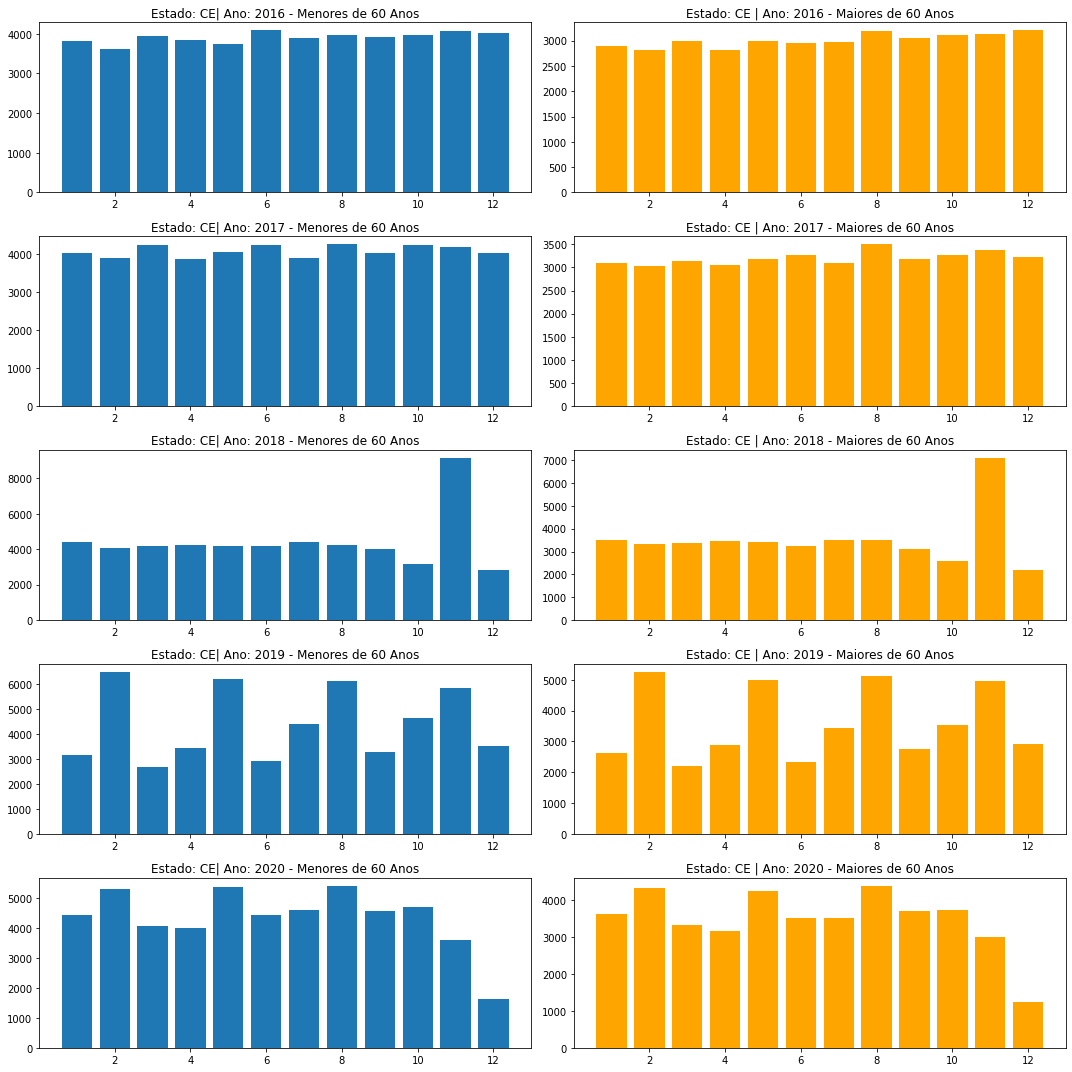

In [ ]:
graficoEstadoPorData(df_2, 'CE')

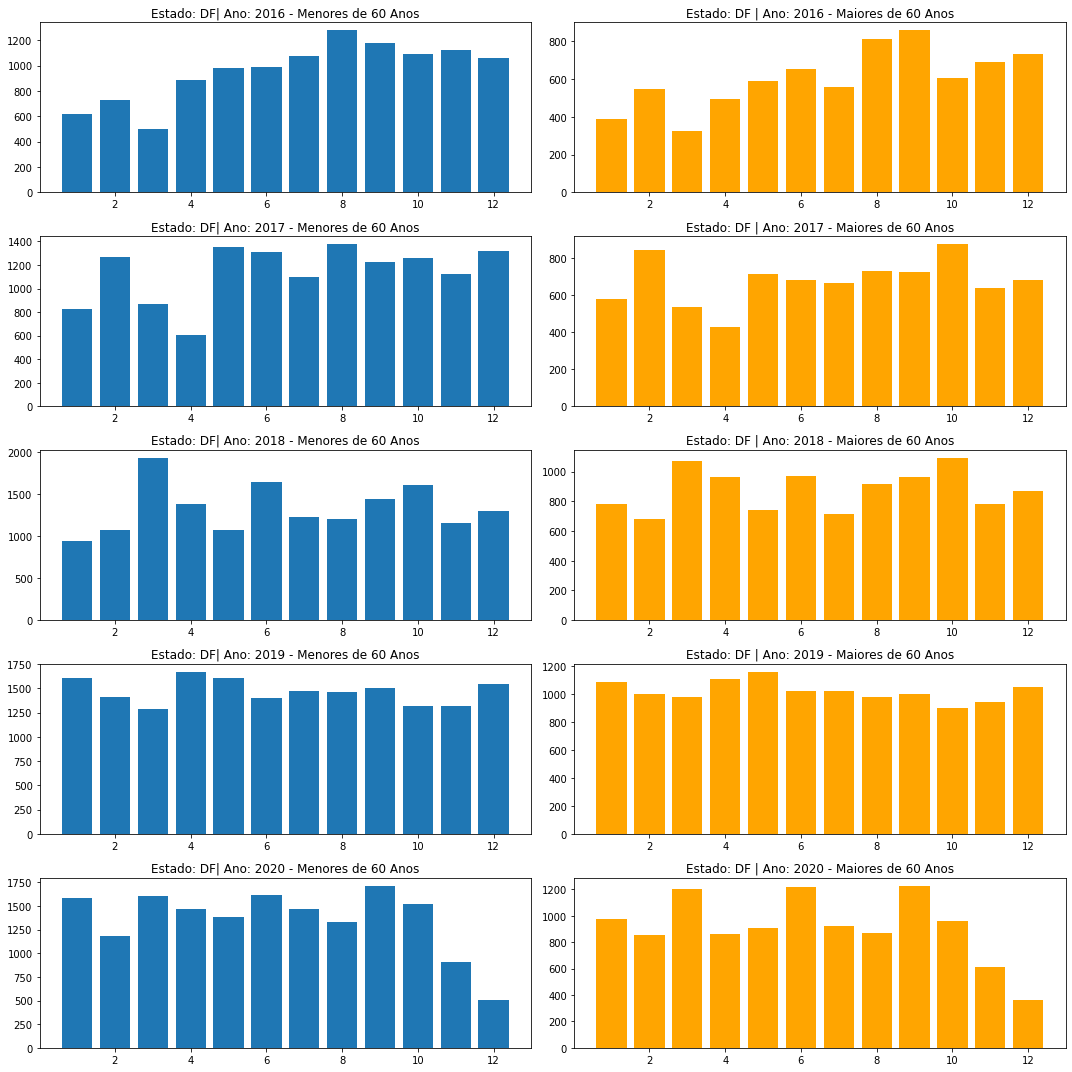

In [ ]:
graficoEstadoPorData(df_2, 'DF')

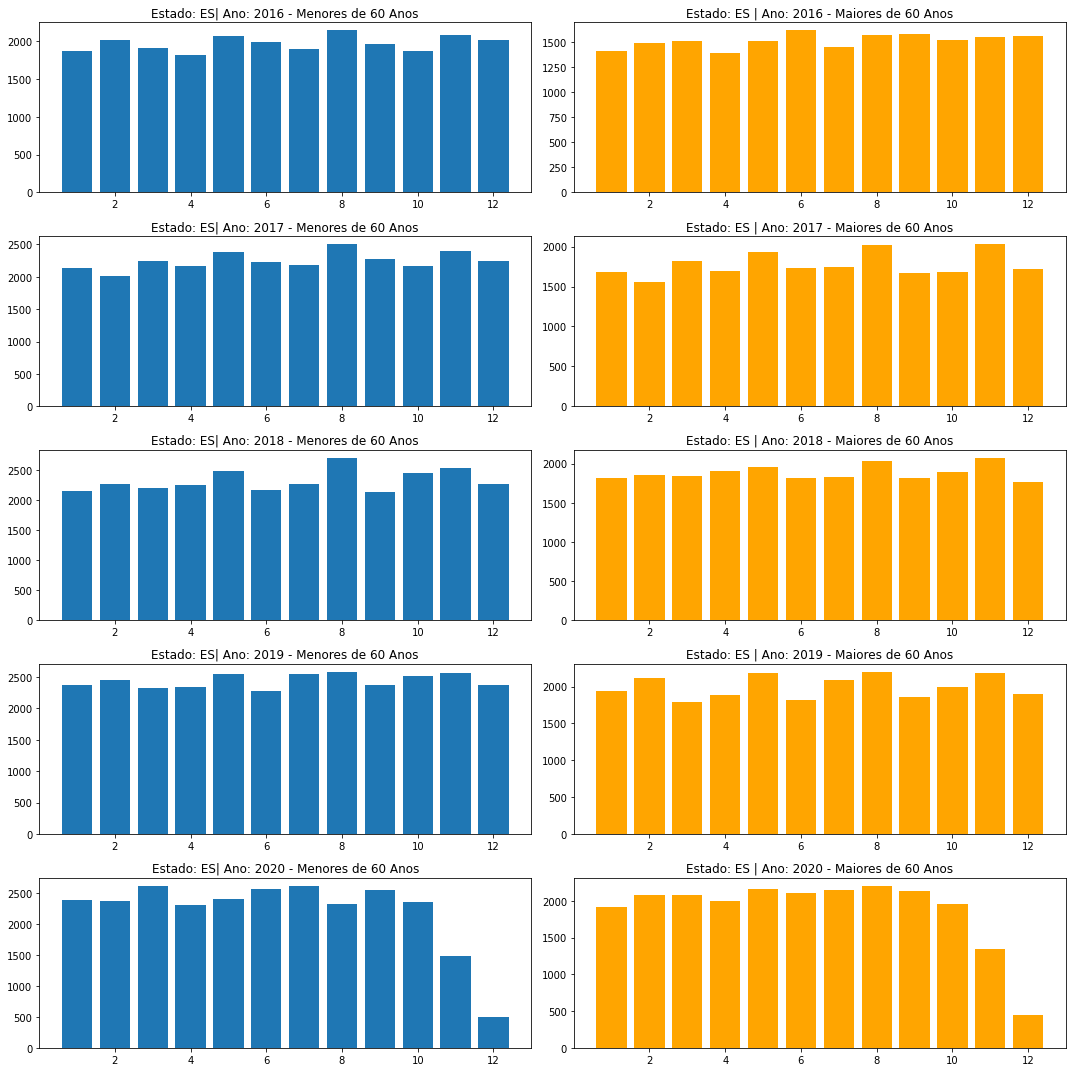

In [ ]:
graficoEstadoPorData(df_2, 'ES')

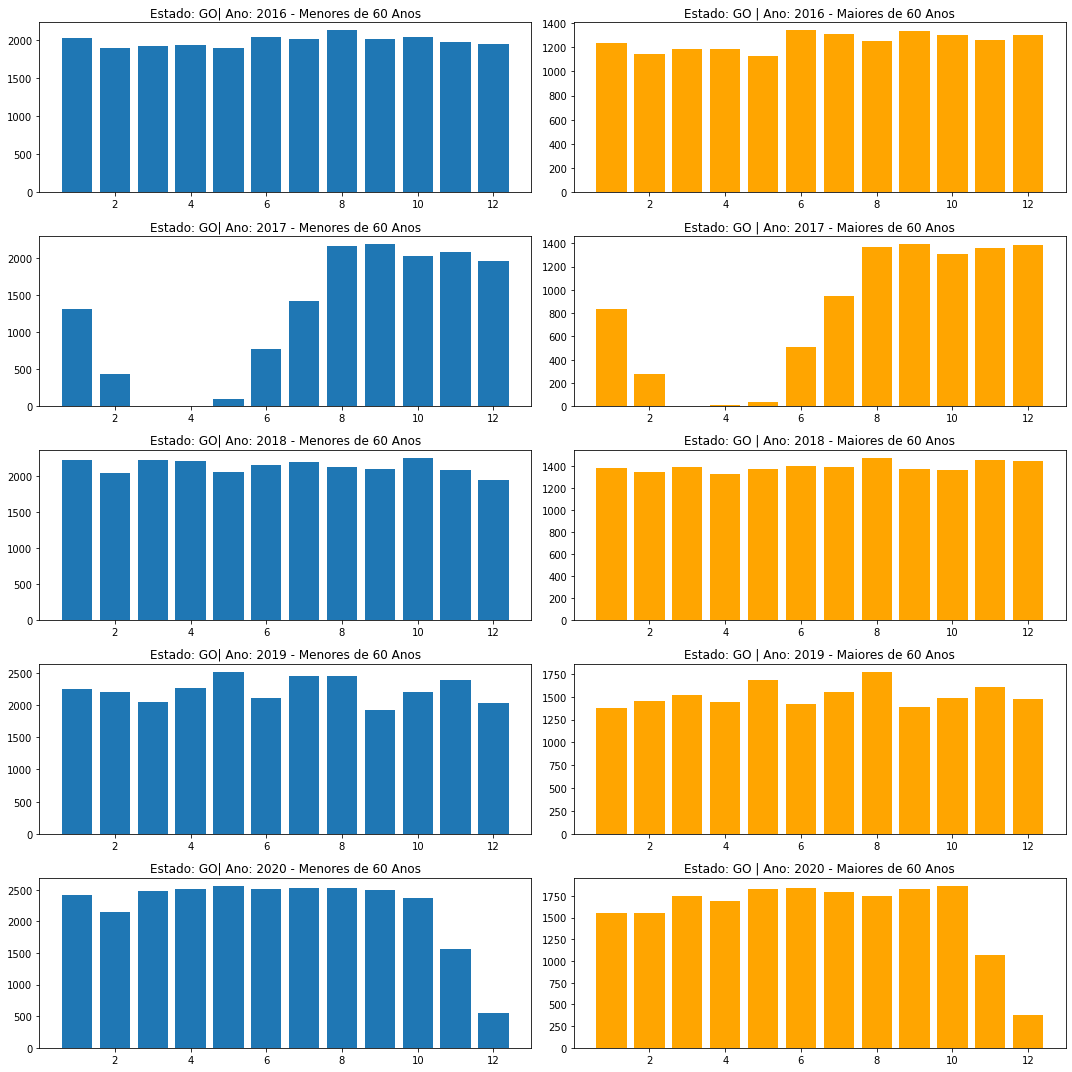

In [ ]:
graficoEstadoPorData(df_2, 'GO')

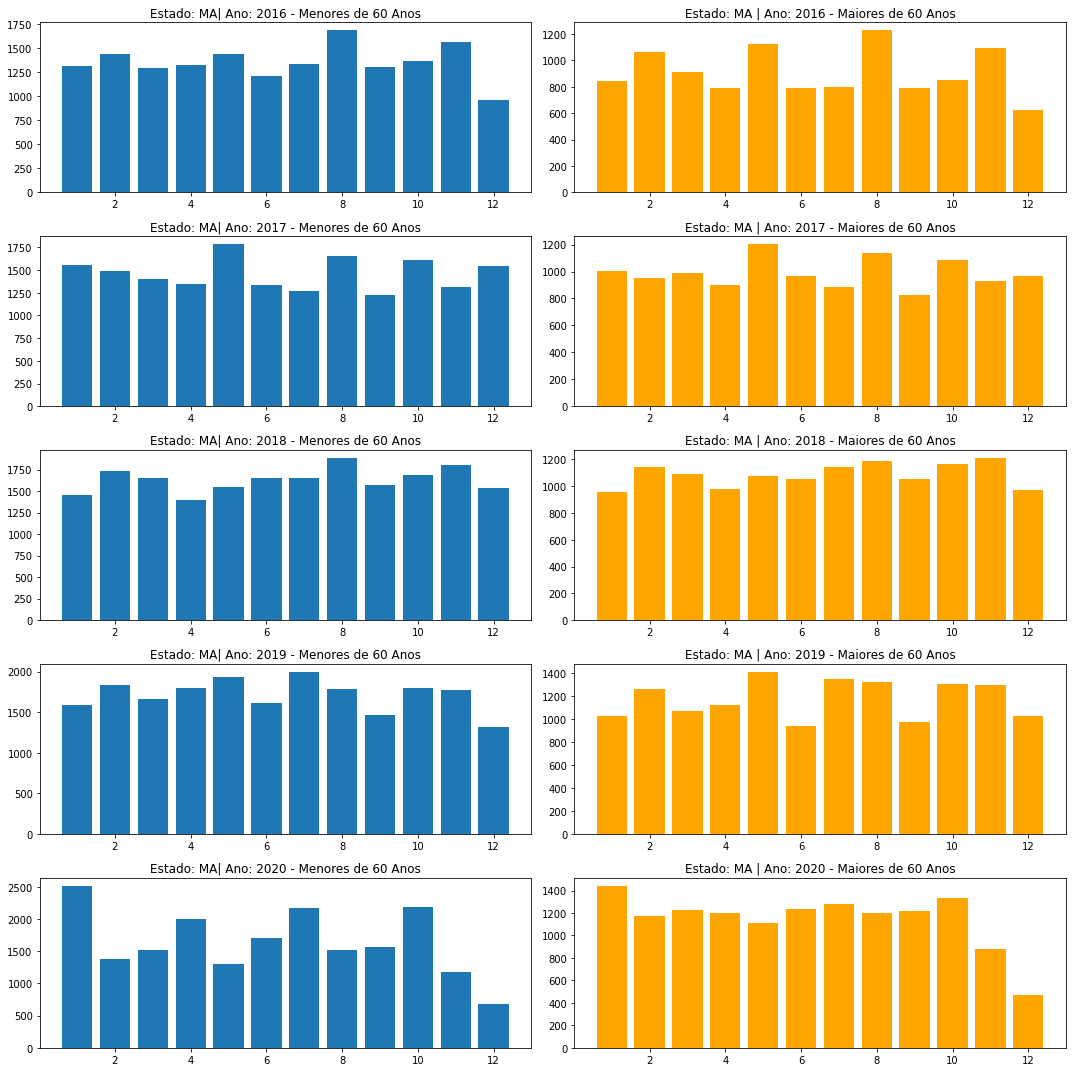

In [ ]:
graficoEstadoPorData(df_2, 'MA')

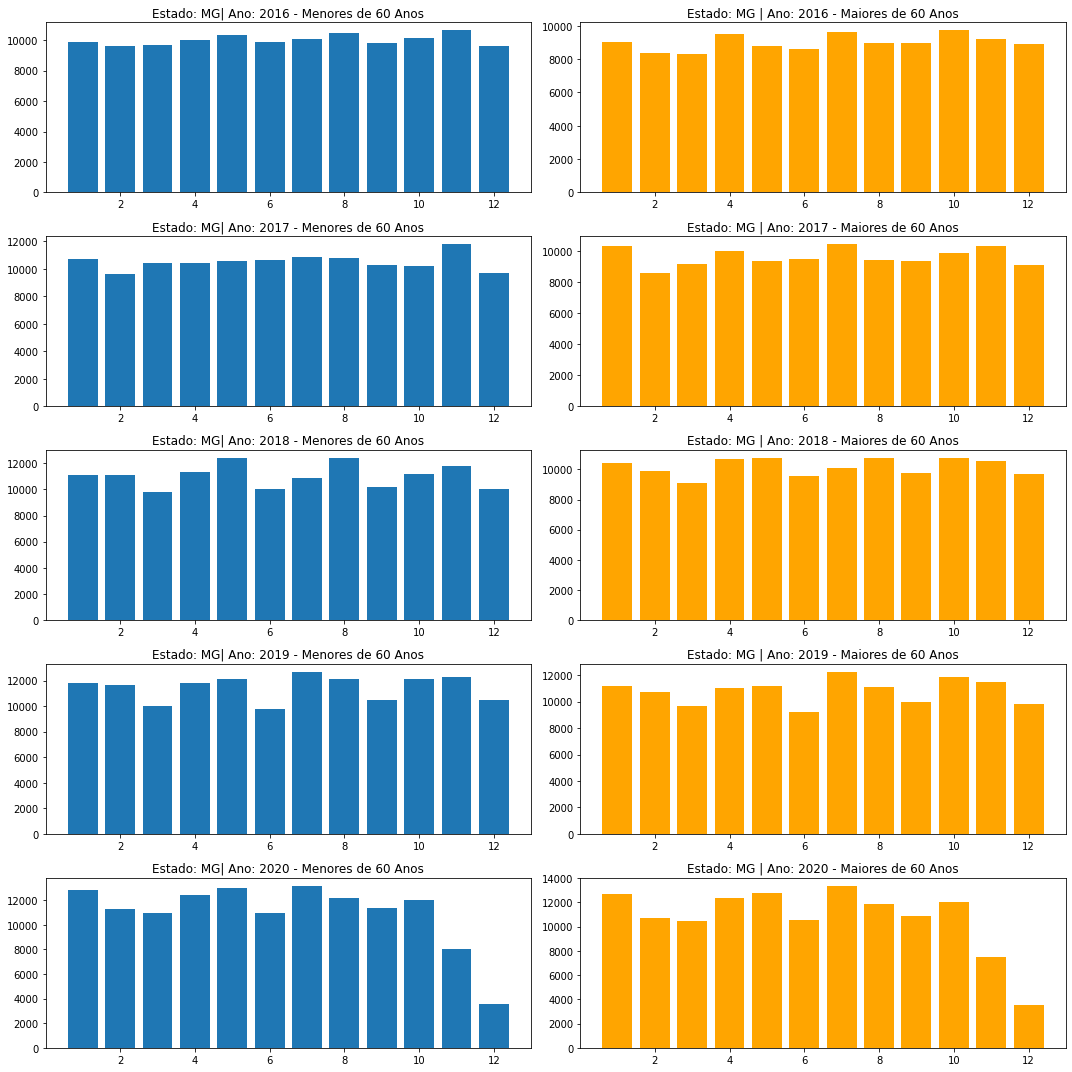

In [ ]:
graficoEstadoPorData(df_2, 'MG')

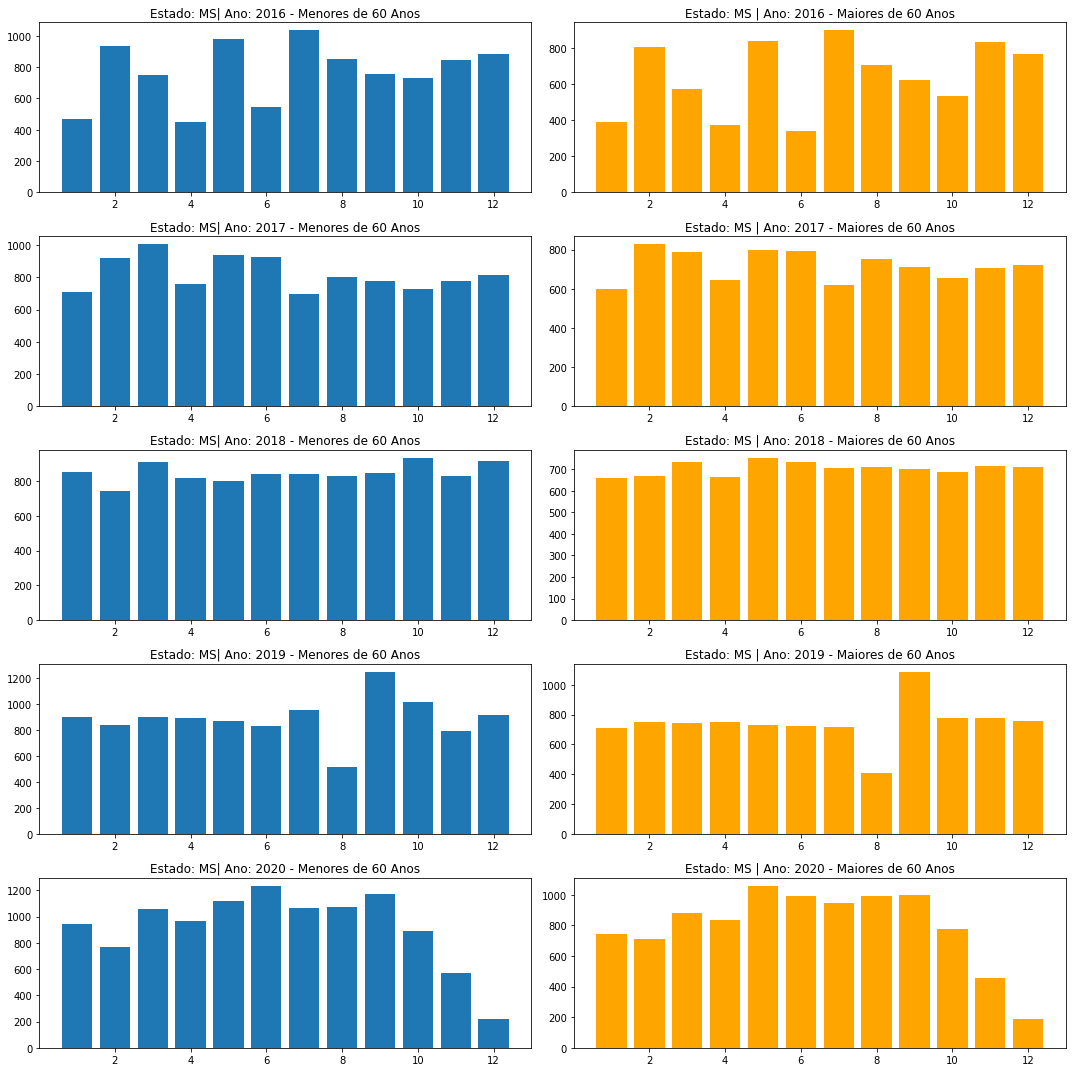

In [ ]:
graficoEstadoPorData(df_2, 'MS')

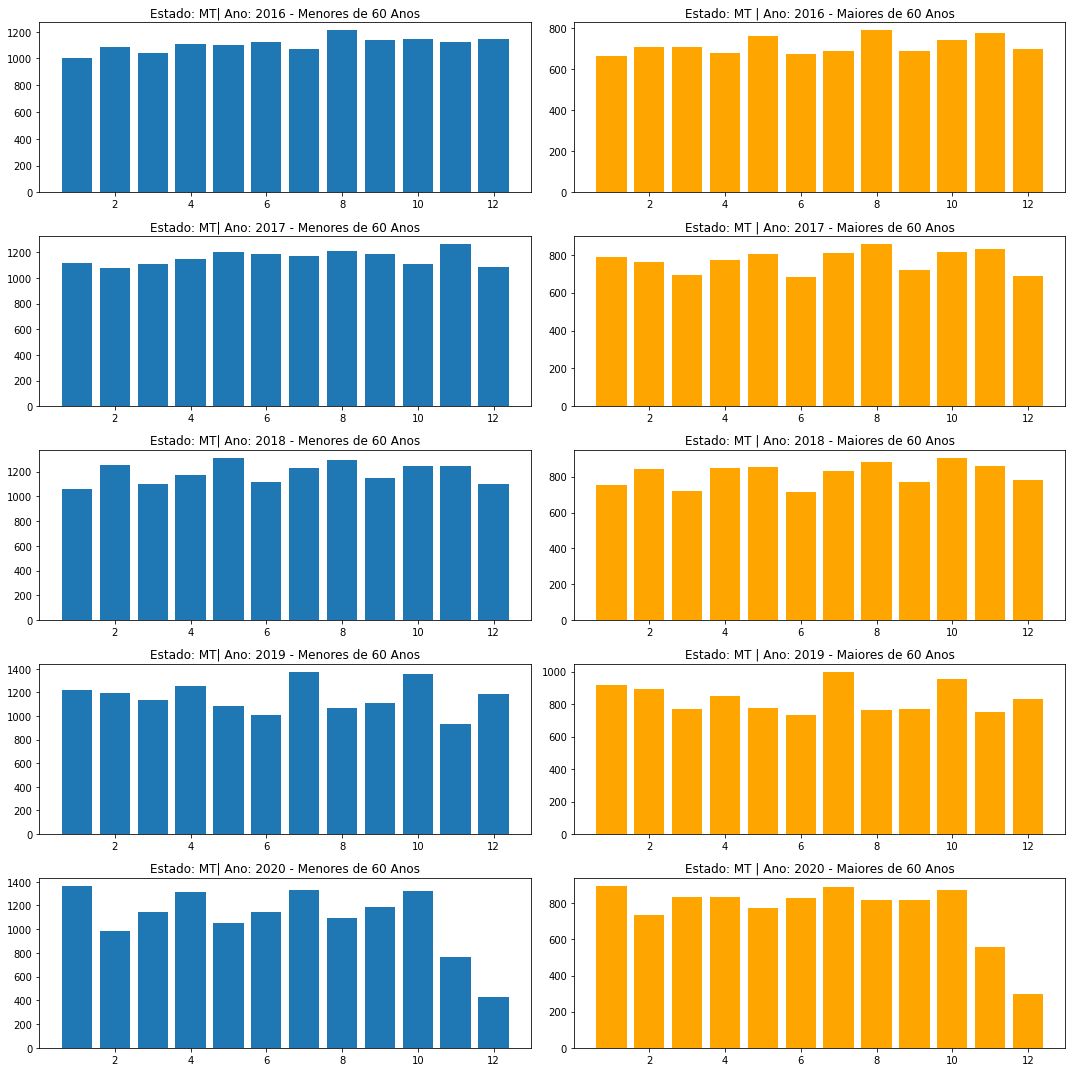

In [ ]:
graficoEstadoPorData(df_2, 'MT') 

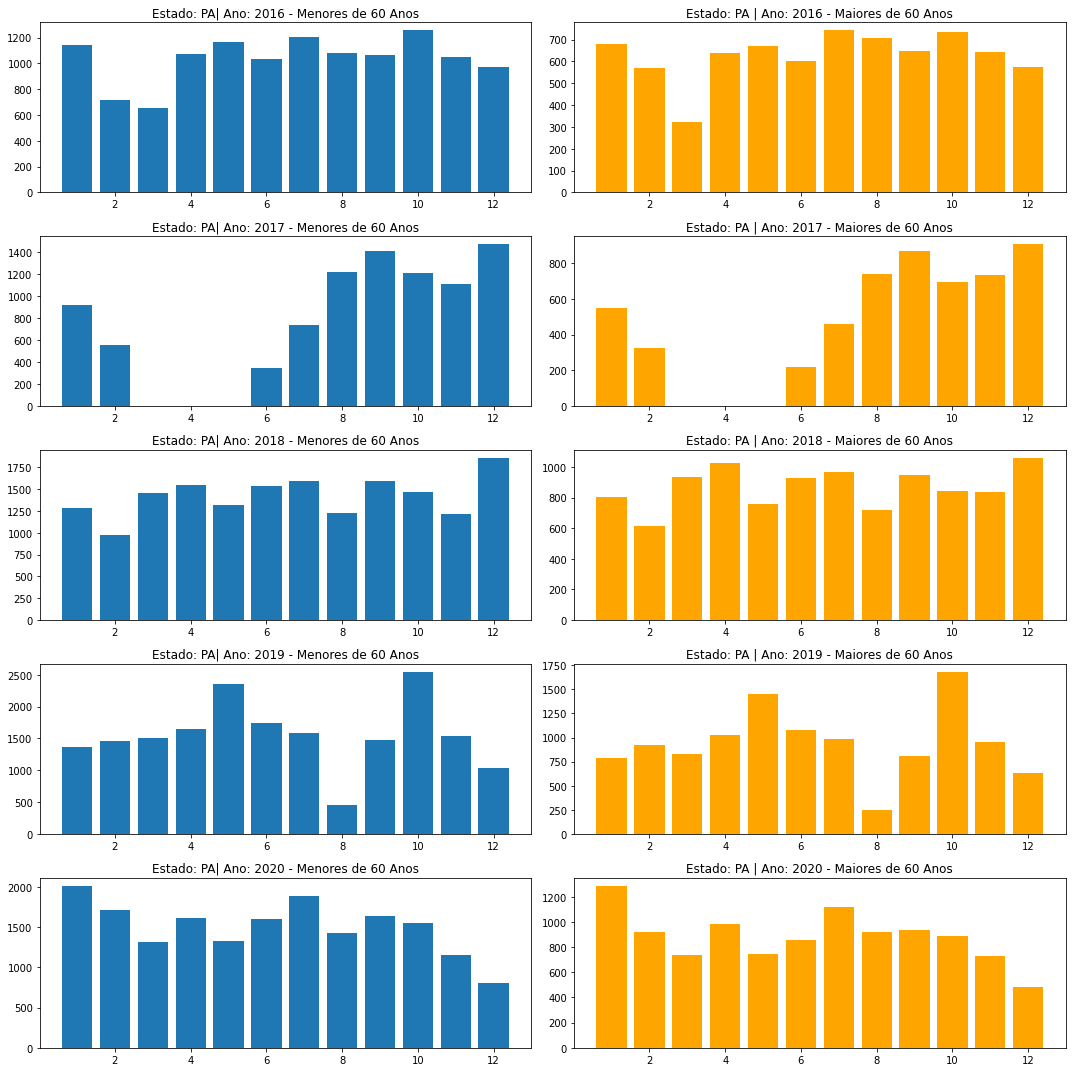

In [ ]:
graficoEstadoPorData(df_2, 'PA') 

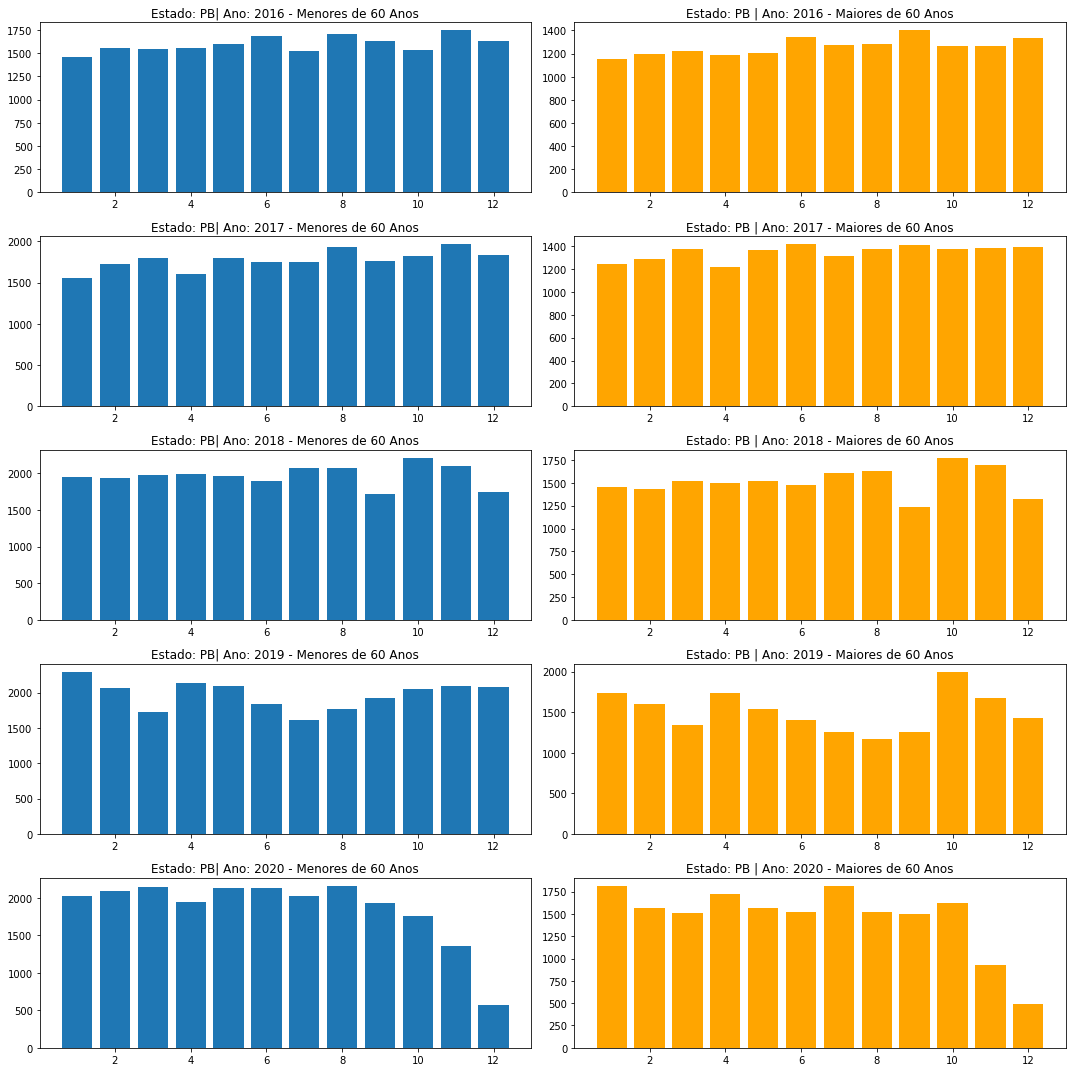

In [ ]:
graficoEstadoPorData(df_2, 'PB') 

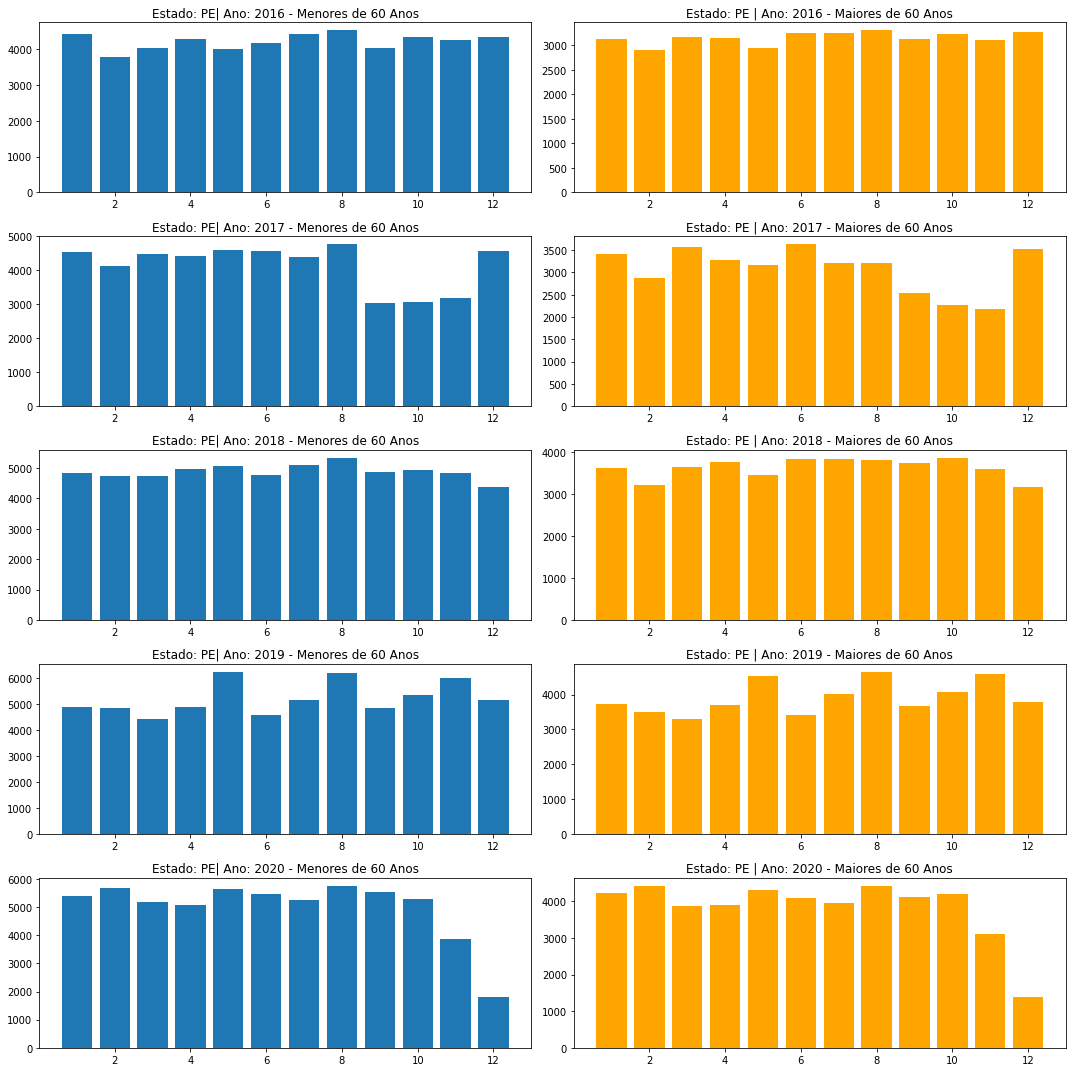

In [ ]:
graficoEstadoPorData(df_2, 'PE') 

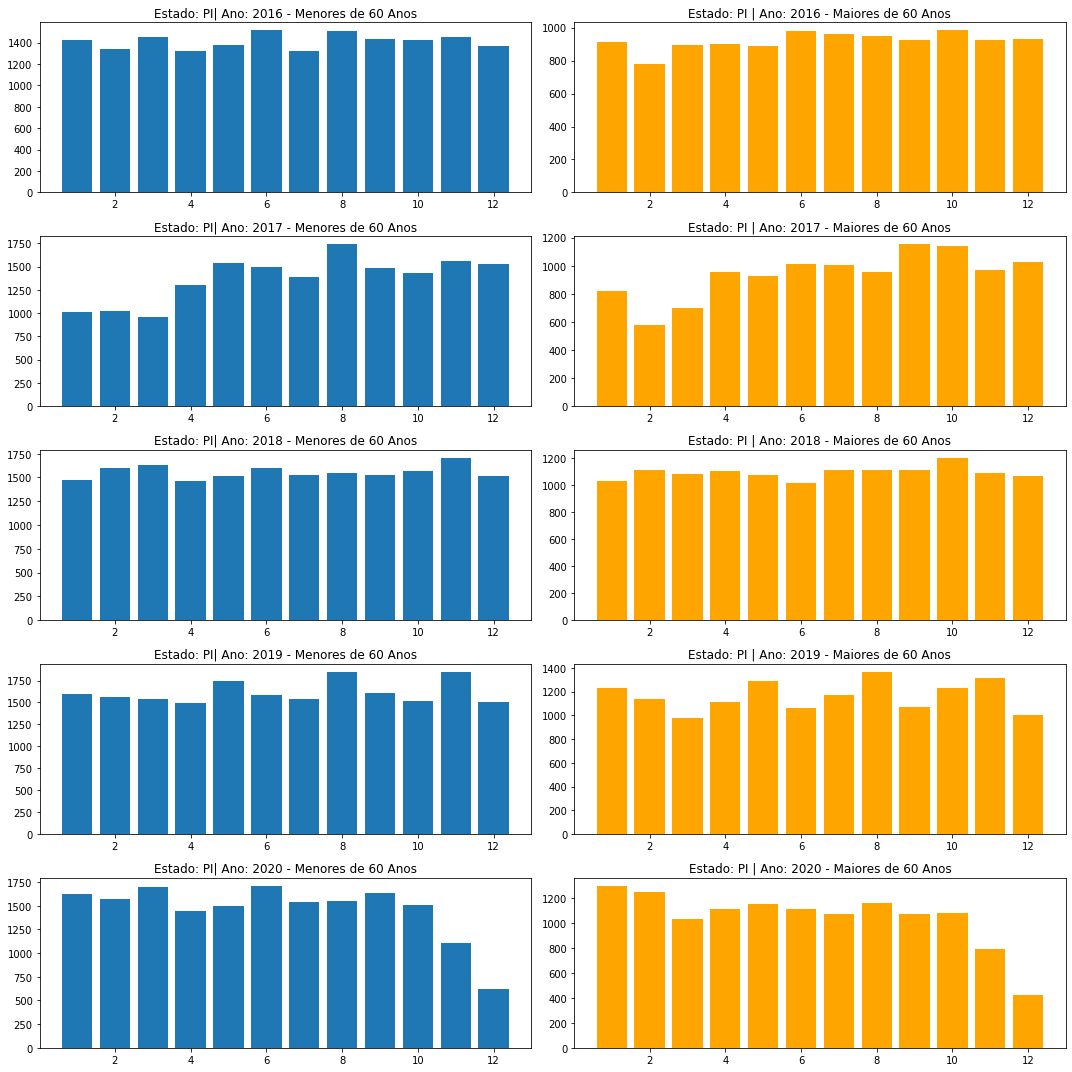

In [ ]:
graficoEstadoPorData(df_2, 'PI') 

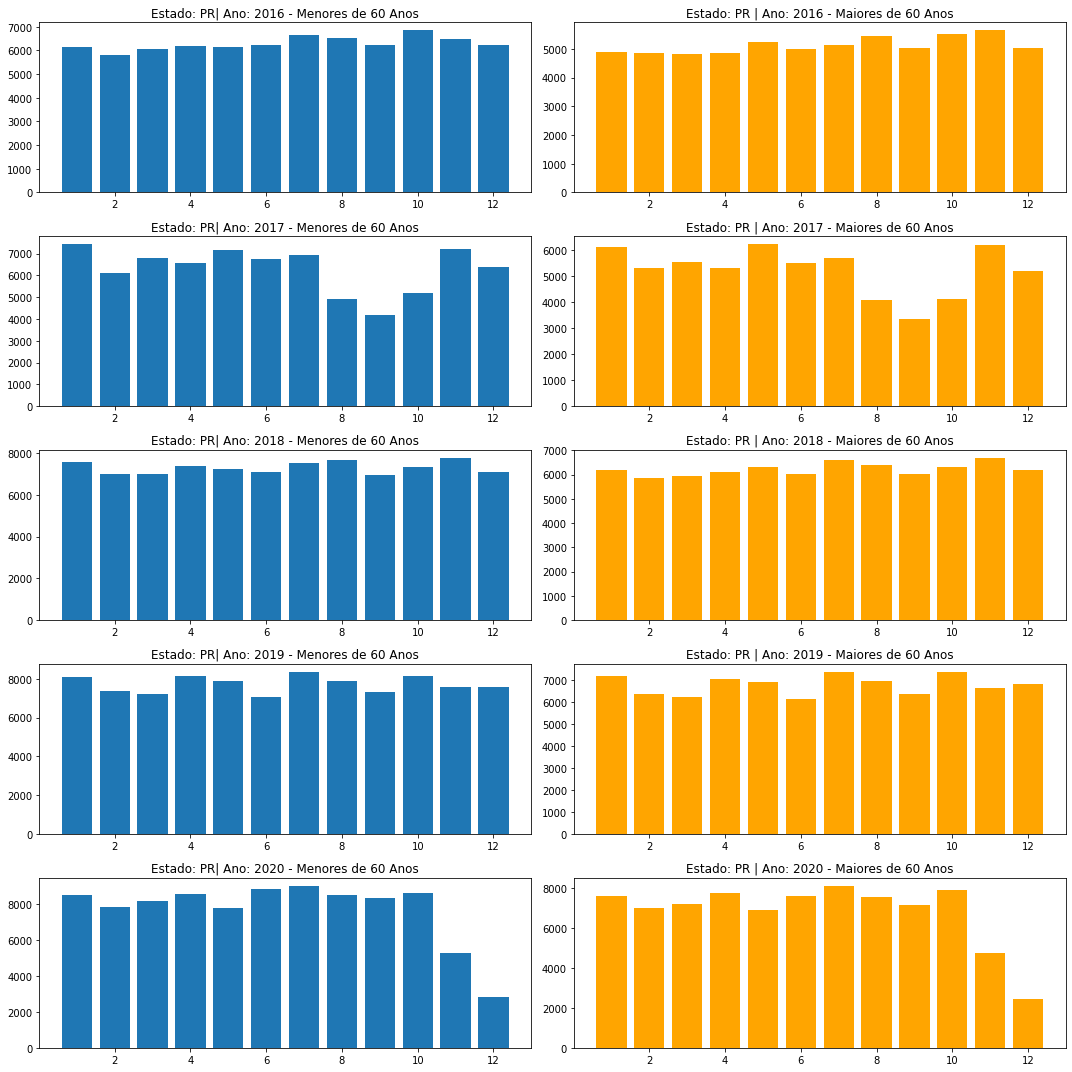

In [ ]:
graficoEstadoPorData(df_2, 'PR') 

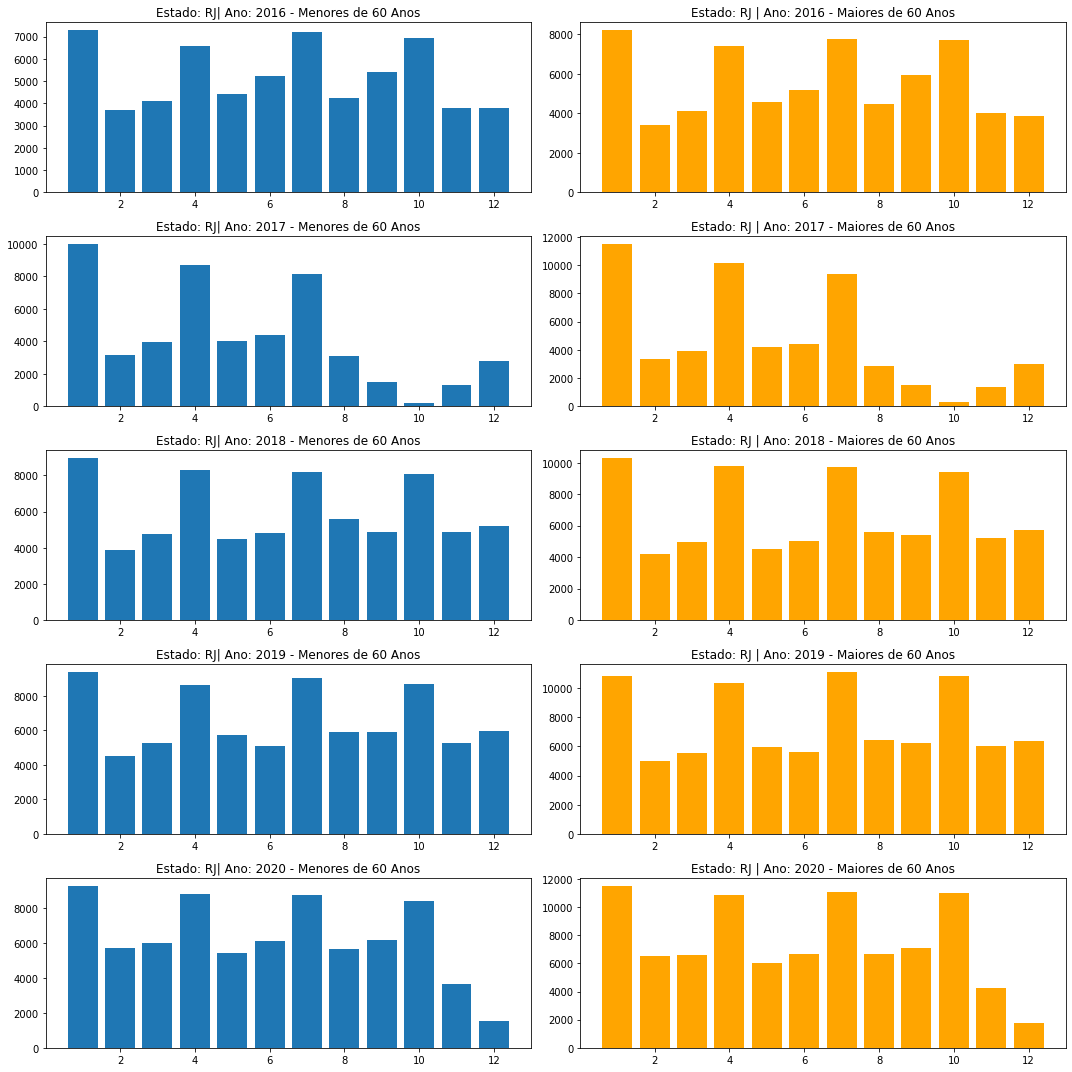

In [ ]:
graficoEstadoPorData(df_2, 'RJ') 

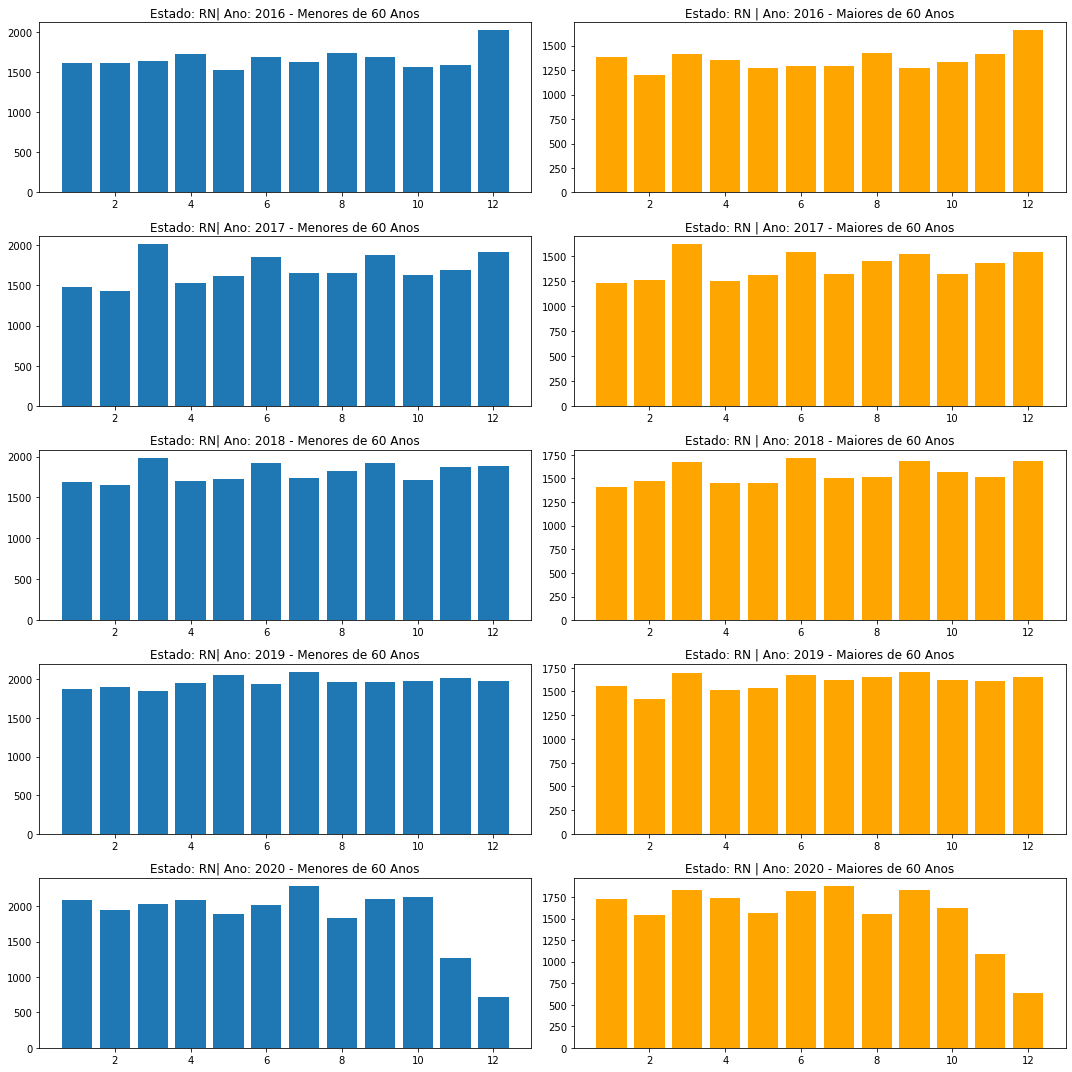

In [ ]:
graficoEstadoPorData(df_2, 'RN') 

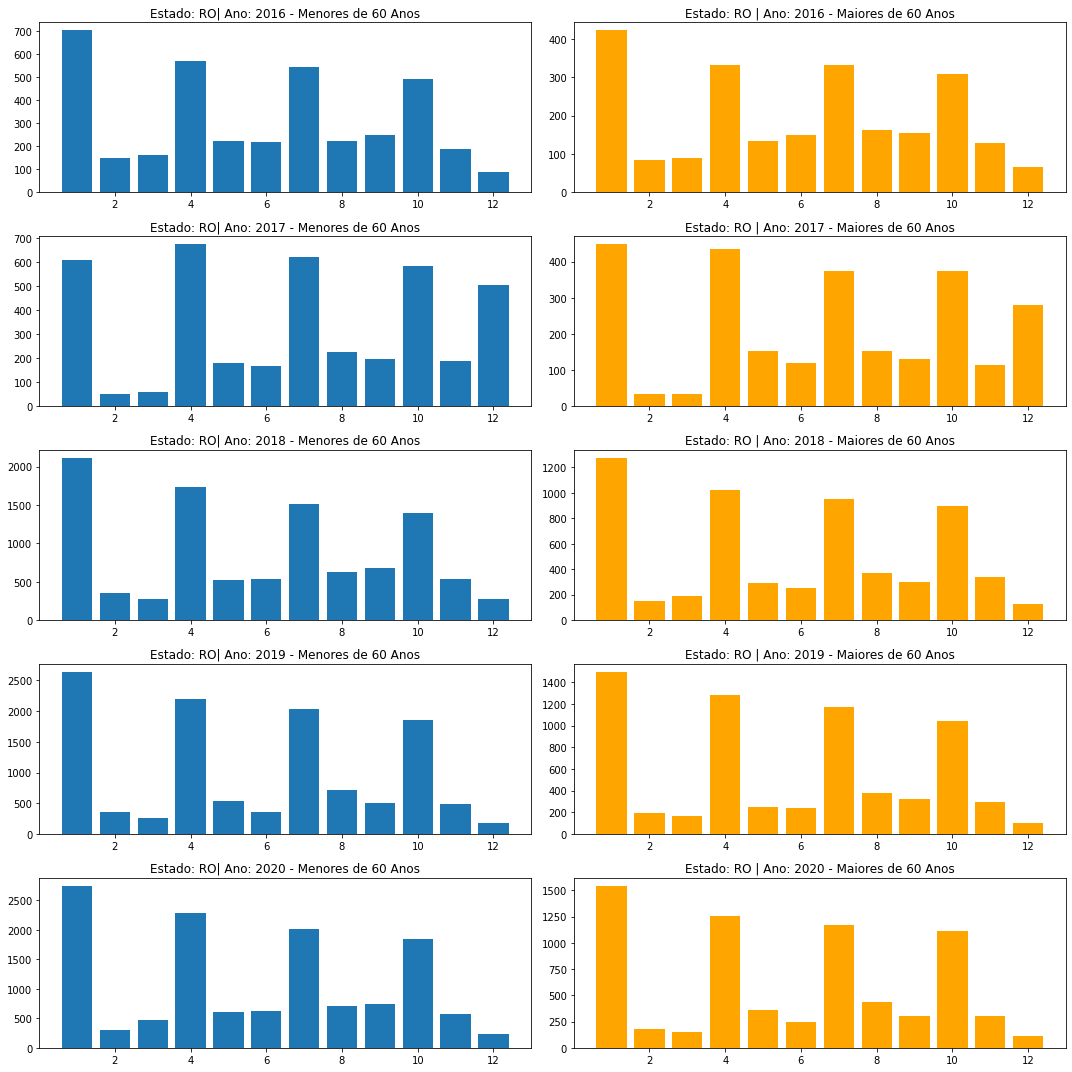

In [ ]:
graficoEstadoPorData(df_2, 'RO') 

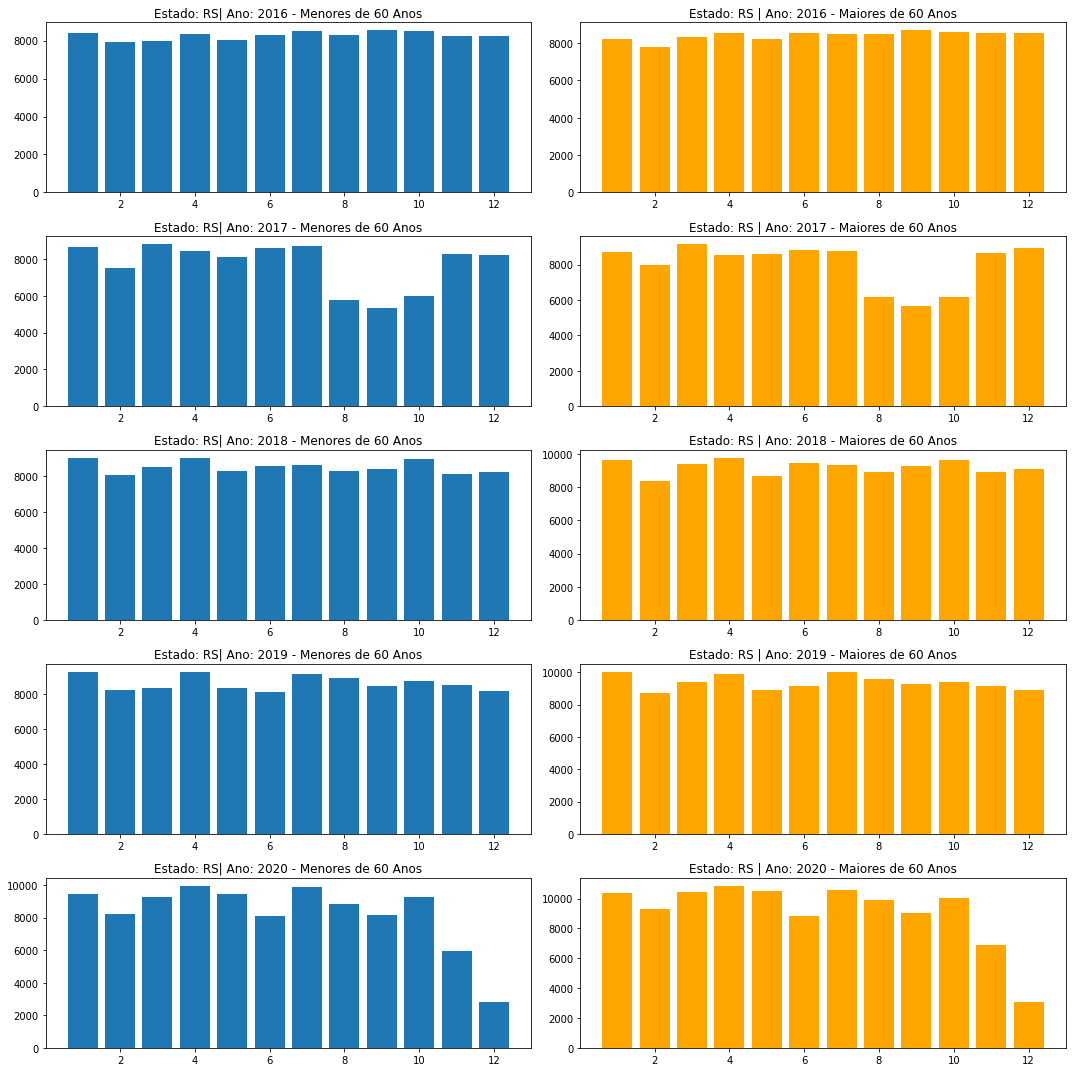

In [ ]:
graficoEstadoPorData(df_2, 'RS') 

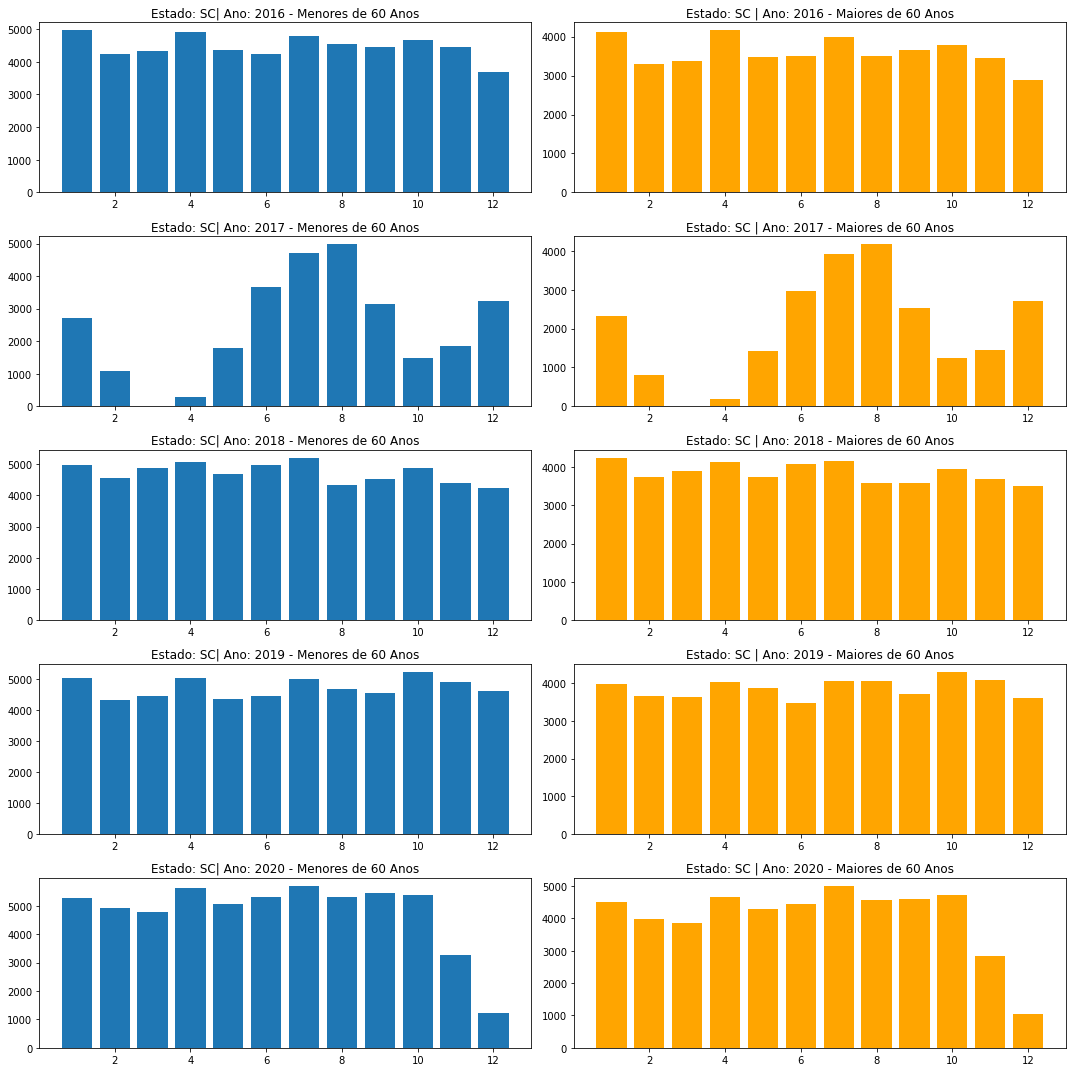

In [ ]:
graficoEstadoPorData(df_2, 'SC')	   


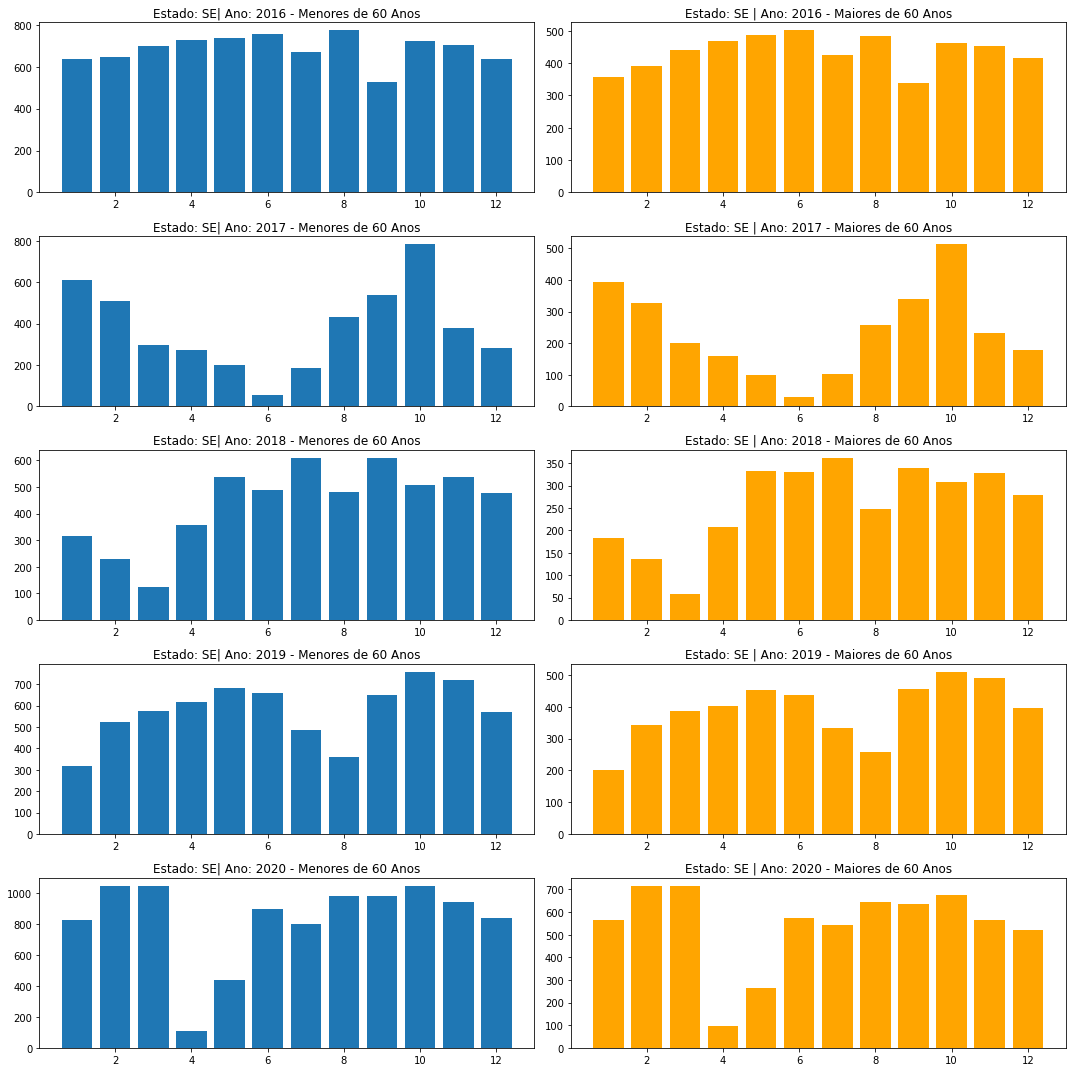

In [ ]:
graficoEstadoPorData(df_2, 'SE') 

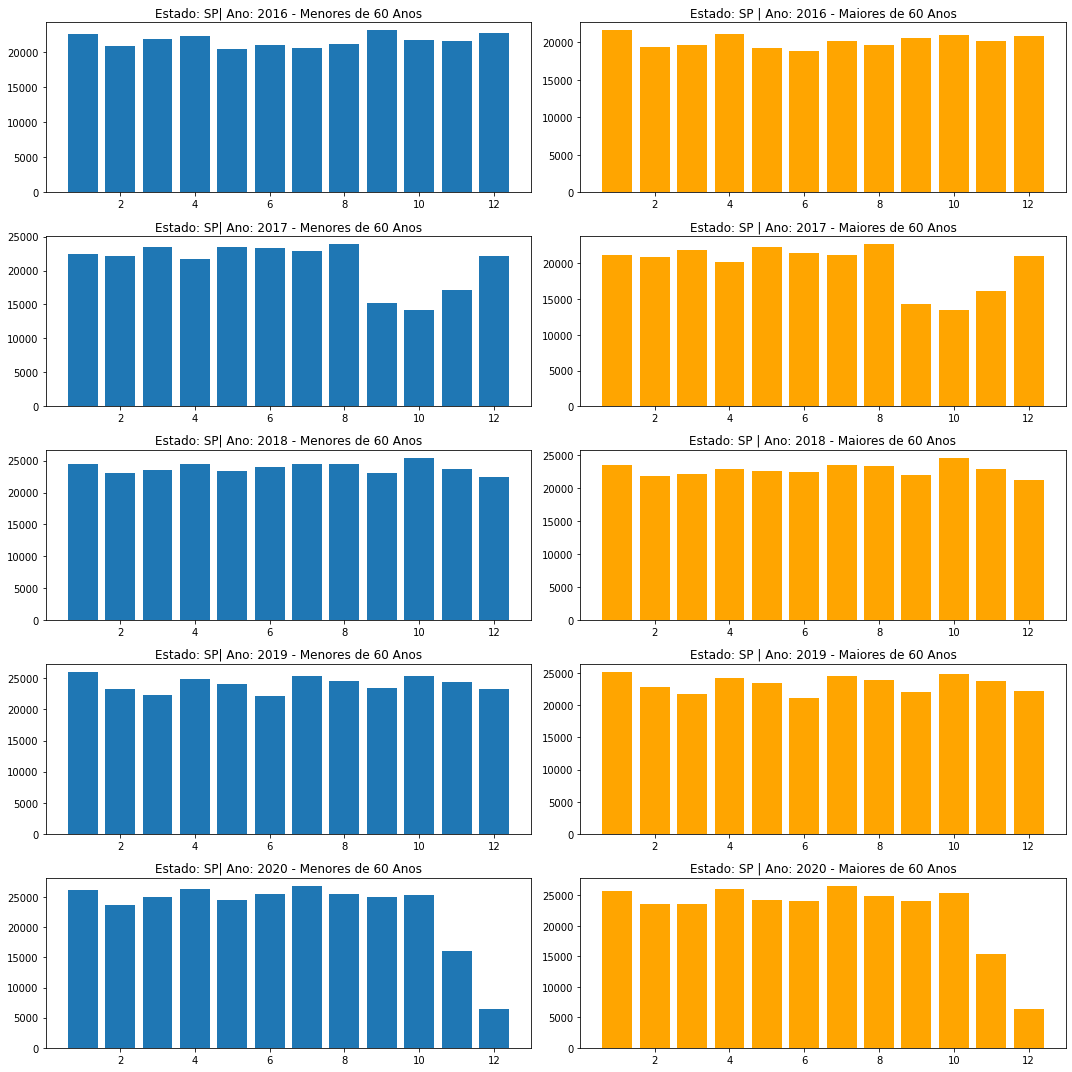

In [ ]:
graficoEstadoPorData(df_2, 'SP') 

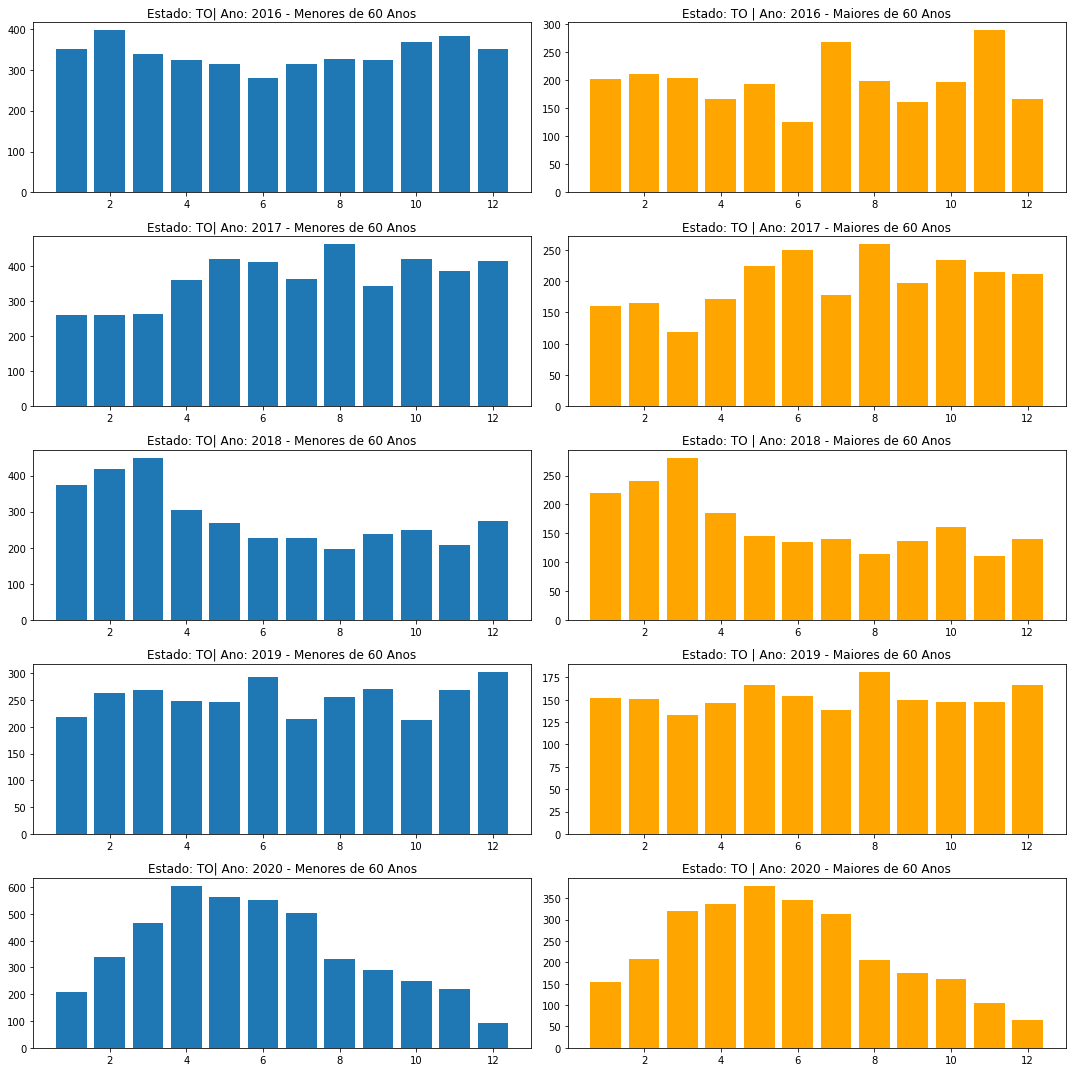

In [ ]:
graficoEstadoPorData(df_2, 'TO')

----
